In [1]:
from HighLevelFeatures import HighLevelFeatures as HLF
from CaloChallengeDataset import CaloChallengeDataset as cld
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
# creating instance of HighLevelFeatures class to handle geometry based on binning file
HLF_1_photons = HLF('photon', filename='../datasets/binning_dataset_1_photons.xml')
HLF_1_pions = HLF('pion', filename='../datasets/binning_dataset_1_pions.xml')

In [2]:
# loading the .hdf5 datasets
photon_file = h5py.File('../datasets/dataset_1_photons_1.hdf5', 'r')
pion_file = h5py.File('../datasets/dataset_1_pions_1.hdf5', 'r')

In [12]:
# each file contains one dataset for the incident energy and one for the showers.
for dataset in photon_file:
    # name of the datasets:
    print('Photon file:')
    print("dataset name: ", dataset)
    print("dataset shape:", photon_file[dataset][:].shape)
print('\n')
for dataset in pion_file:
    # name of the datasets:
    print('Pion file:')
    print("dataset name: ", dataset)
    print("dataset shape:", pion_file[dataset][:].shape)

Photon file:
dataset name:  incident_energies
dataset shape: (121000, 1)
Photon file:
dataset name:  showers
dataset shape: (121000, 368)


Pion file:
dataset name:  incident_energies
dataset shape: (120230, 1)
Pion file:
dataset name:  showers
dataset shape: (120230, 533)


In [2]:
cl = cld()

Data shape:  torch.Size([121000, 368, 4])
Max features:  [12.0, 2.827433388230814, 1500.0, 811024.0]
Min features:  [0.0, -2.827433388230814, 1.0, 0.0]
After normalization: 

Data shape:  torch.Size([121000, 368, 4])
Max features:  [0.5, 0.5, 0.5, 0.5]
Min features:  [-0.5, -0.5, -0.49933333333333335, -0.5]

Data shape:  torch.Size([30145125, 4])
Max features:  [12.0, 2.827433388230814, 1500.0, 5.90903370613883]
Min features:  [0.0, -2.827433388230814, 1.0, -15.980418494867742]
After normalization: 

Data shape:  torch.Size([30145125, 4])
Max features:  [0.5, 0.5, 0.5, 0.5]
Min features:  [-0.5, -0.5, -0.49933333333333335, -0.5]


In [58]:
num_thresholded = 30
pc,_ = cl.format_data()[:]
pc = np.array(list(map(lambda x: x[x[:, 3].argsort()][-num_thresholded:], pc)))
#pc = np.array(list(map(lambda x: x[x[:, 3].argsort()][-num_thresholded], pc)))
pc.shape

(121000, 30, 4)

In [56]:
pc[15011,:,0]

NameError: name 'pc' is not defined

In [17]:
data,_ = cl.format_data()[:]
data_inc = cl.photon_file['incident_energies'][:]

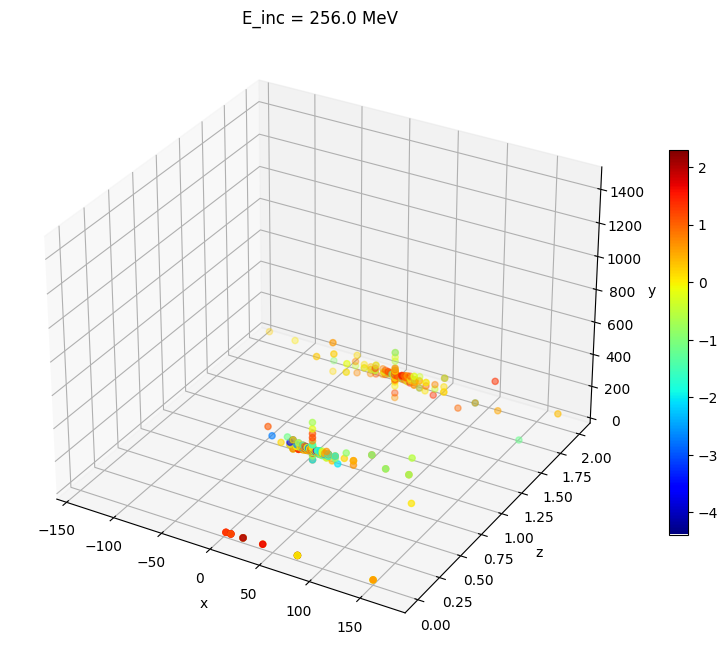

In [18]:
data_inc_sorted = np.sort(data_inc, axis=0).flatten()
E0 = data_inc_sorted[1]
data_inc = data_inc.flatten()
i0 = np.where(data_inc == E0)
i = np.random.choice(i0[0], 10)
data = data[i].reshape(-1, 4)
mask = data[:,3] > 0
data = data[mask]
z = data[:,0]
r = data[:,2]
alpha = data[:,1]
E = np.log10(data[:,3])
x, y = r*np.cos(alpha), r*np.sin(alpha)
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
s = ax.scatter(x, z, y, c=E, cmap='jet')
fig.colorbar(s, ax=ax, shrink=0.5)
ax.set_xlabel('x')
ax.set_ylabel('z')
ax.set_zlabel('y')
ax.set_zlim(-1,1500)
ax.set_title(r'E_inc = {} MeV'.format(E0))
plt.show()

In [7]:
print(i)

[101481  15900  24103  19438  41021  83682  37288  50935  11265  72288]


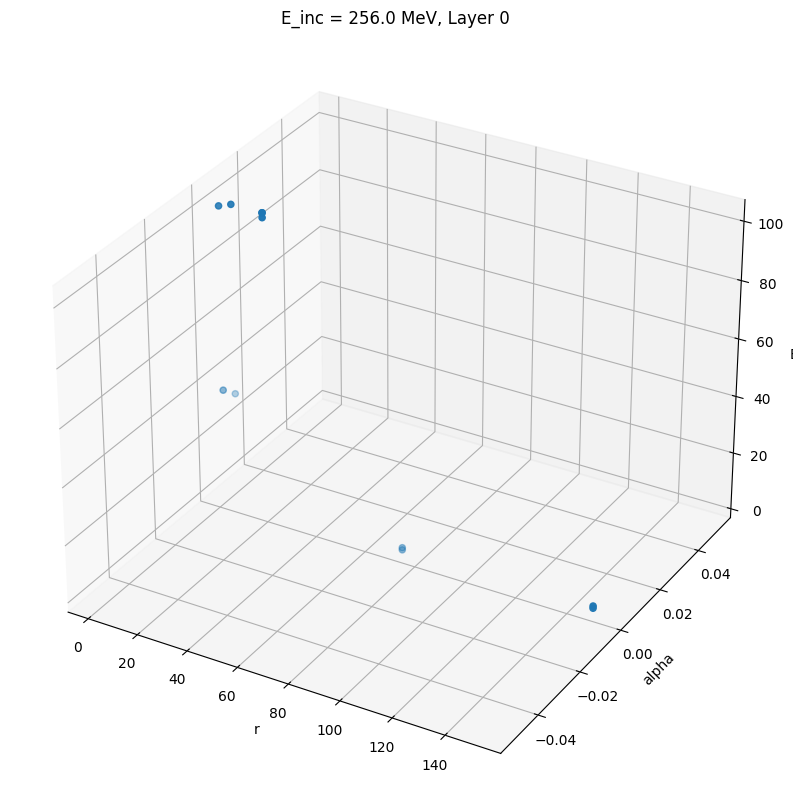

In [4]:
from evaluate_plotting_helper import plot_3d_Einc_layer
plot_3d_Einc_layer(data, data_inc)

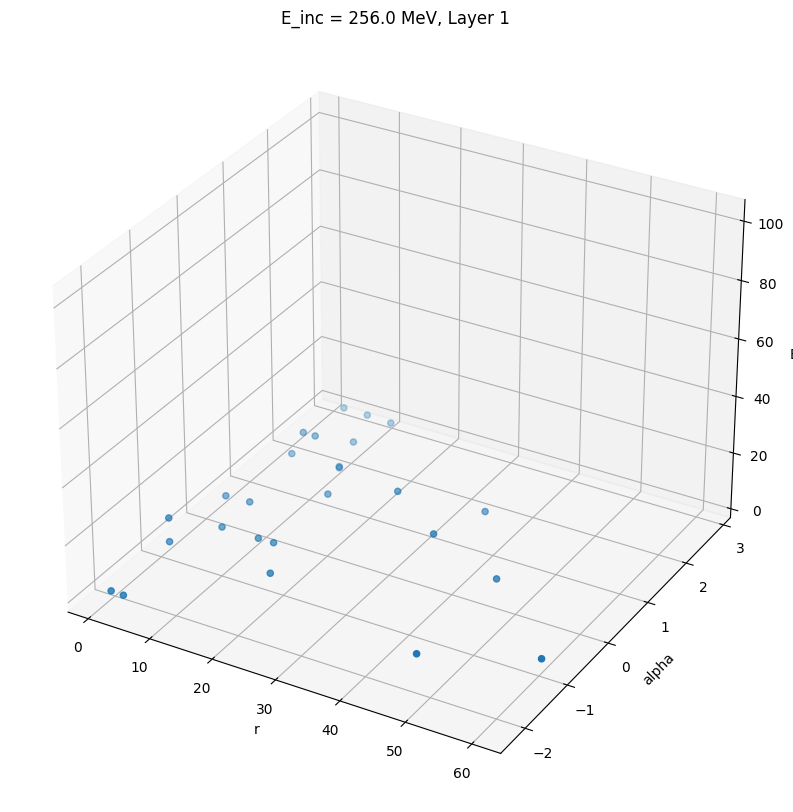

In [5]:
from evaluate_plotting_helper import plot_3d_Einc_layer
plot_3d_Einc_layer(data, data_inc, layer_num=1)

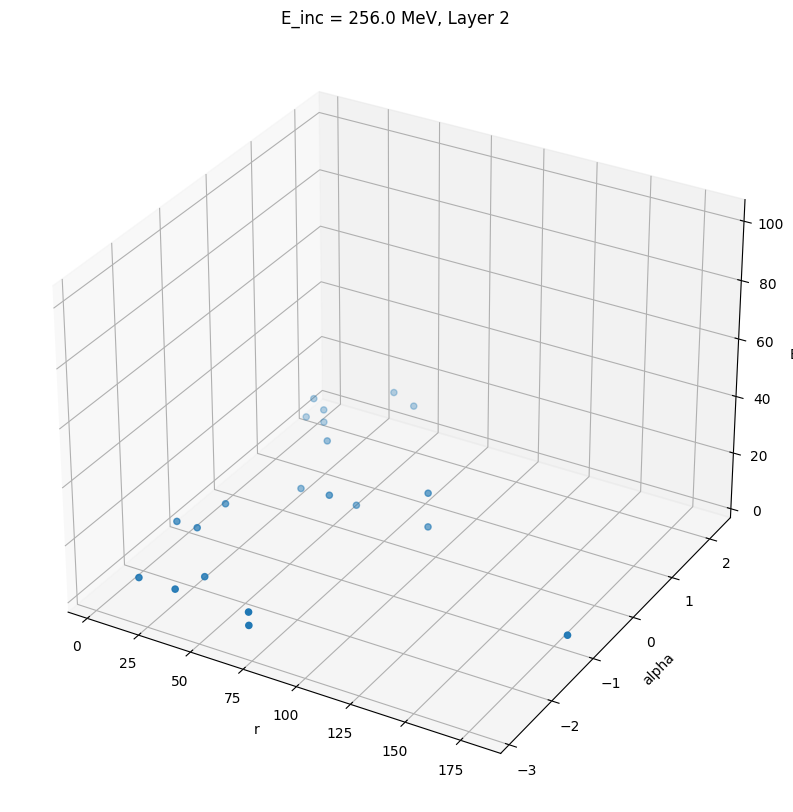

In [11]:
from evaluate_plotting_helper import plot_3d_Einc_layer
plot_3d_Einc_layer(data, data_inc, layer_num=2)

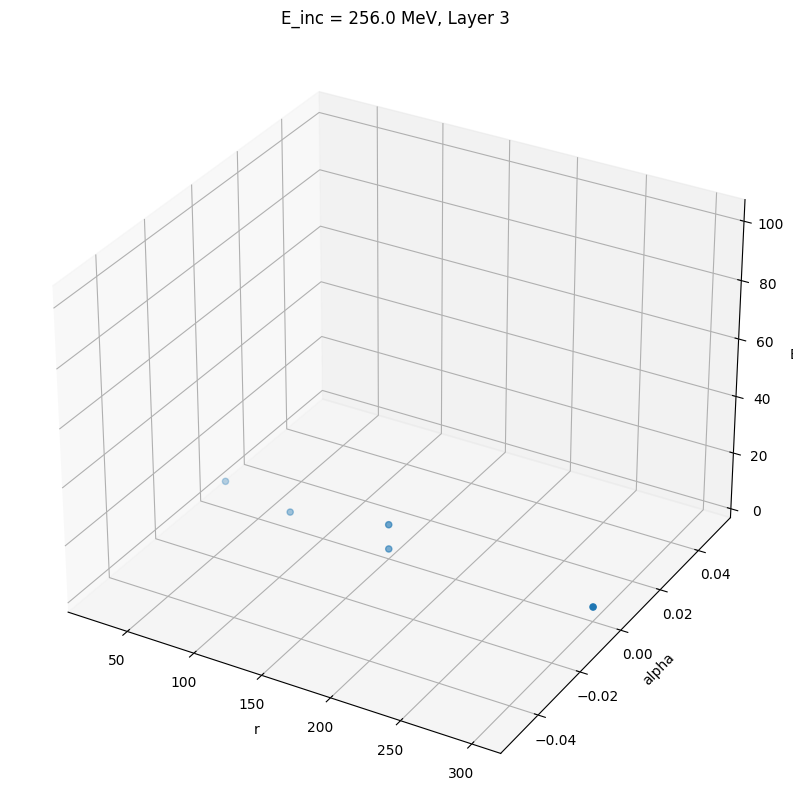

In [12]:
from evaluate_plotting_helper import plot_3d_Einc_layer
plot_3d_Einc_layer(data, data_inc, layer_num=3)

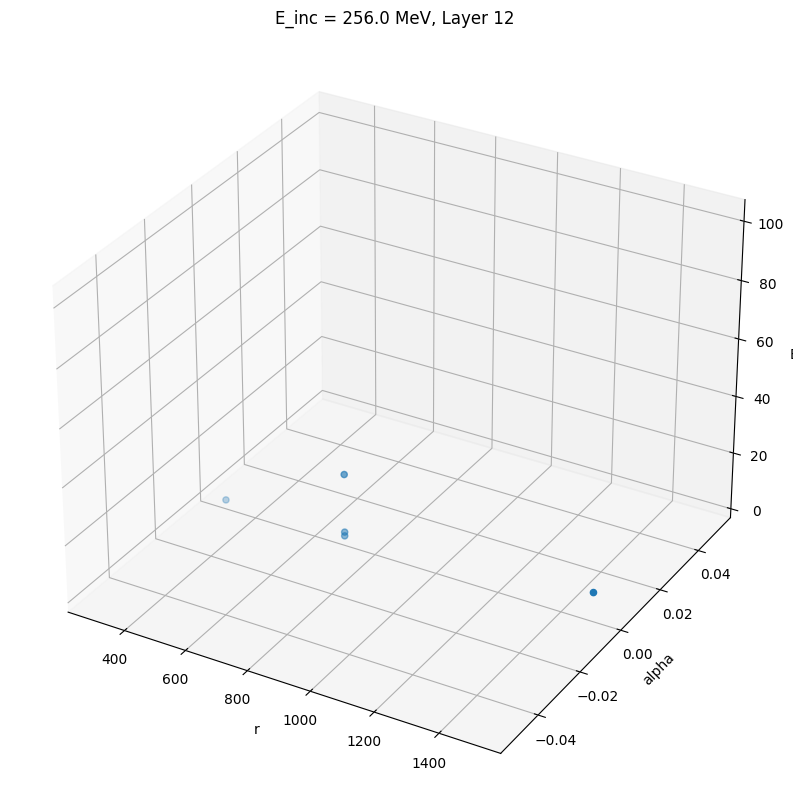

In [13]:
from evaluate_plotting_helper import plot_3d_Einc_layer
plot_3d_Einc_layer(data, data_inc, layer_num=12)

In [24]:
data,_ = cl.format_data()[:]
data_inc = cl.photon_file['incident_energies'][:]

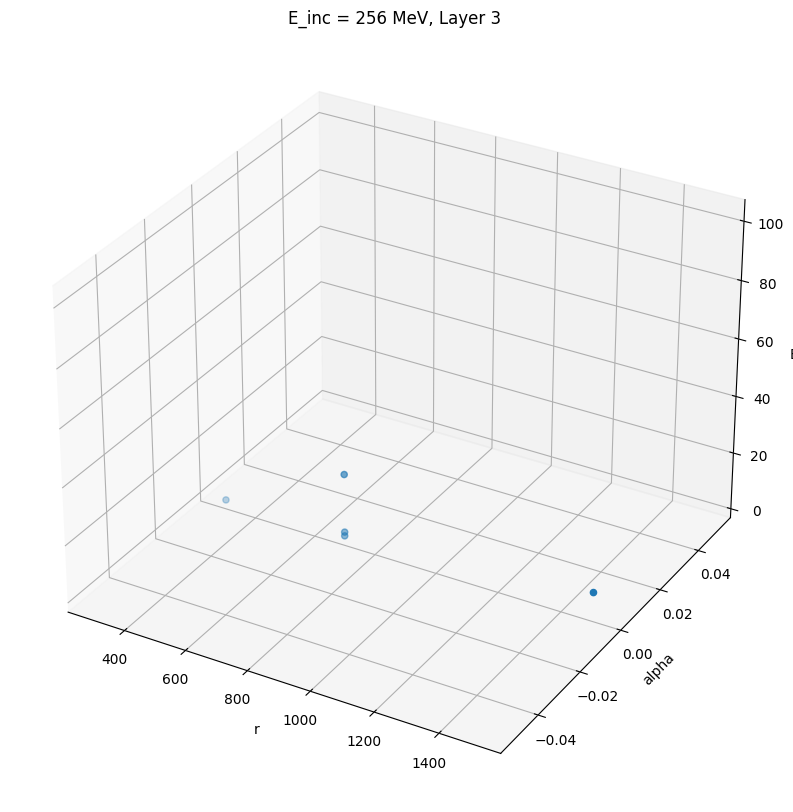

In [25]:
from collections import Counter
data_inc_sorted = np.sort(data_inc, axis=0).flatten()
E0 = data_inc_sorted[1]
data_inc = data_inc.flatten()
i0 = np.where(data_inc == E0)
data = data[i0].reshape(-1, 4)
data = data[data[:,0] == 12]
value_counts = Counter(data[:, 3])
most_frequent_values = [value for value, count in value_counts.most_common(6)]
data = data[np.isin(data[:, 3], most_frequent_values[1:])]
r = data[:,2]
alpha = data[:,1]
#E = np.log10(data[data[:,0] == 0][:,3] + 1e-18)
E = data[:,3]
_ = plt.figure(figsize=(10,10))
ax = plt.axes(projection ='3d')
#ax.set_xscale('log', base = 10)
ax.scatter(r, alpha, E)
ax.set_xlabel('r')
ax.set_ylabel('alpha')
ax.set_zlabel('E')
ax.set_zlim(-1,105)
ax.set_title('E_inc = 256 MeV, Layer 3')
plt.show()

In [54]:
print(r.shape)
print(alpha.shape)
print(E.shape)
print(data.shape)

(12,)
(12,)
(12,)
(12, 4)


In [26]:
print(value_counts.most_common(6))

[(0.0, 49970), (22.0519, 1), (0.209162, 1), (7.01725, 1), (1.55618, 1), (0.0466189, 1)]


In [12]:
print(alpha.shape)

(219,)


In [17]:
x = np.array([[[1,2,3],[2,3,4],[0,0,0]],[[3,4,5],[4,5,6],[0,0,0]],[[5,6,7],[6,7,8],[0,0,0]]])
print(x.shape)
x = np.array(list(map(lambda x: x[x[:,2].argsort()][-1:], x)))


(3, 3, 3)


In [19]:
x.shape

(3, 1, 3)

ValueError: Argument Z must be 2-dimensional.

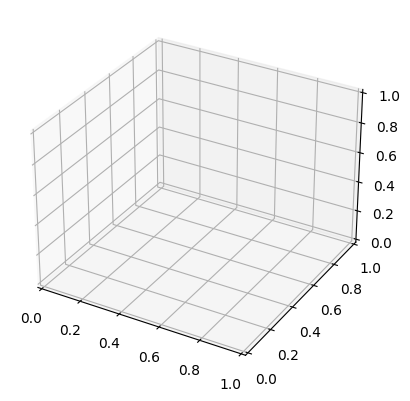

In [4]:
from evaluate_plotting_helper import plot_3d_Einc_layer
plot_3d_Einc_layer(data, data_inc)

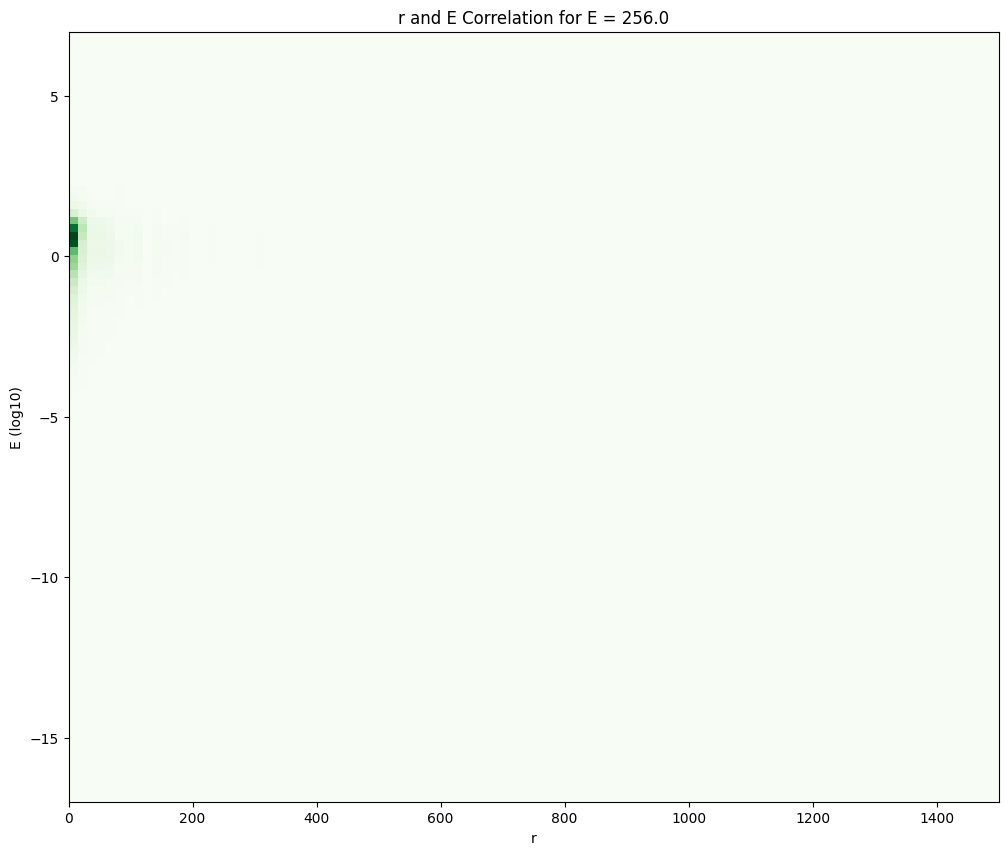

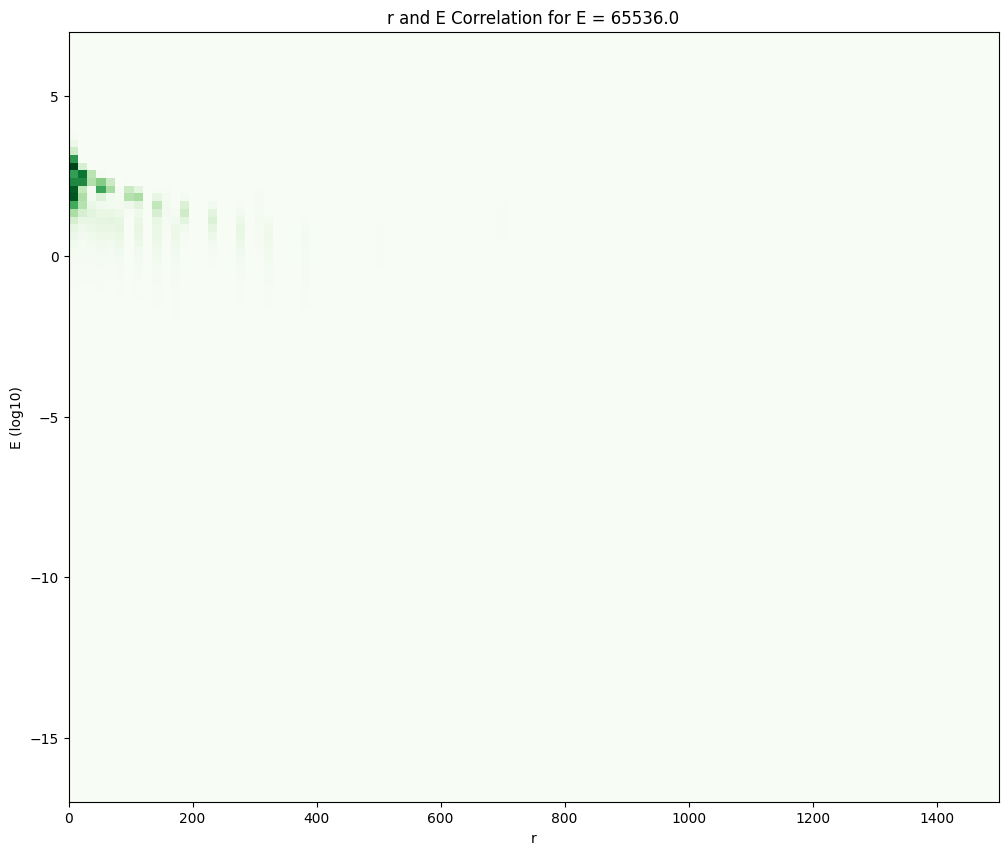

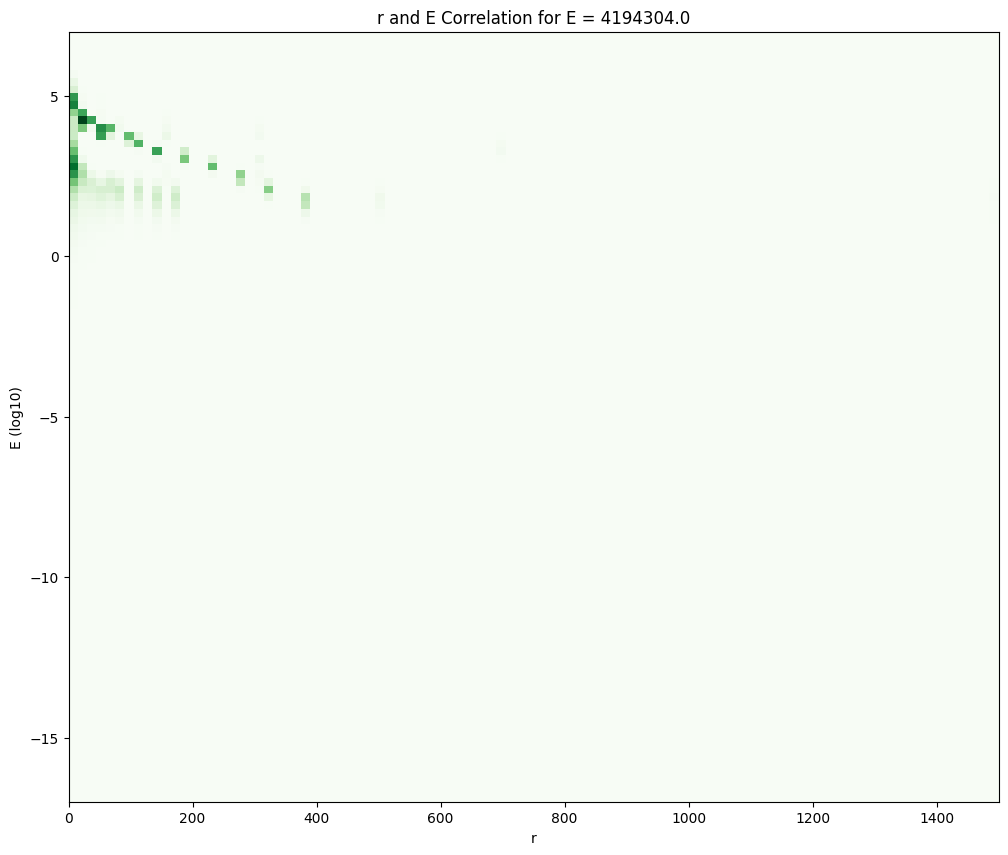

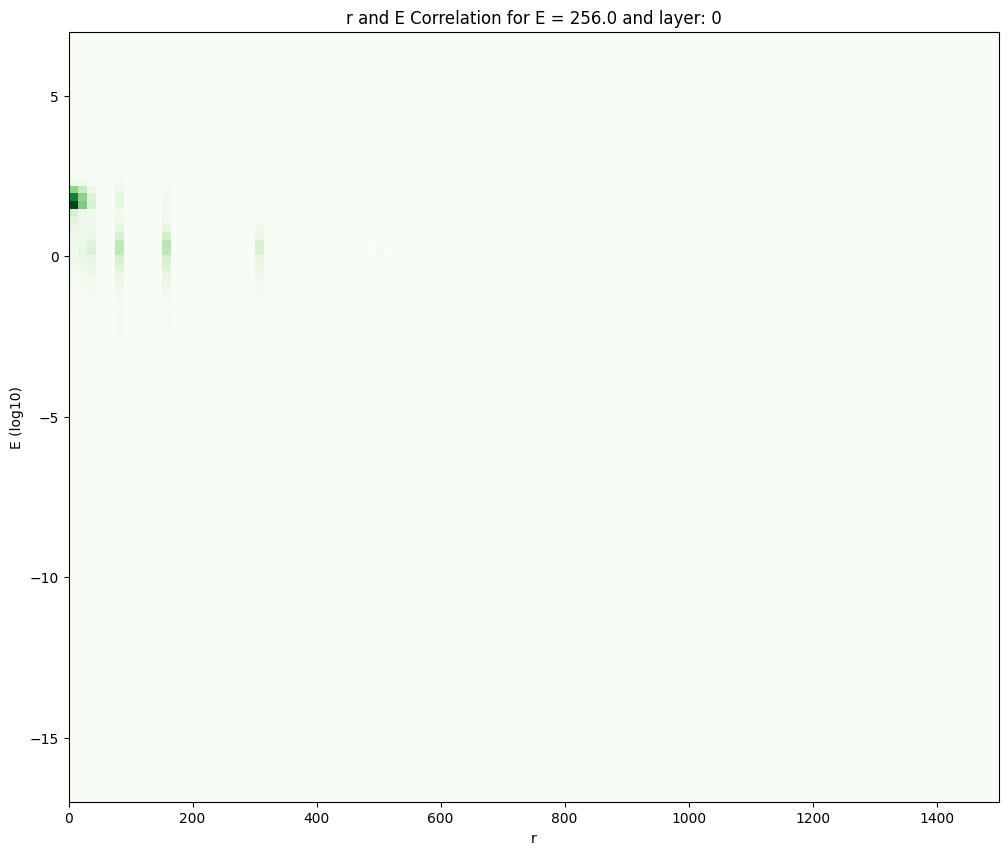

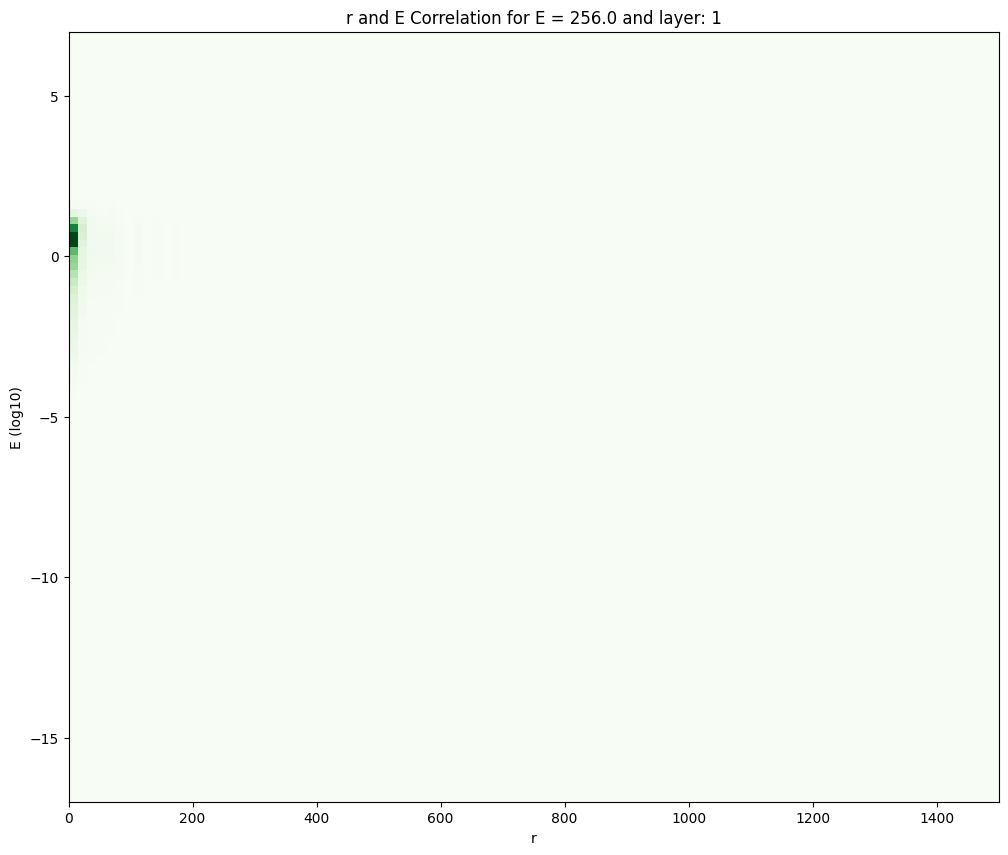

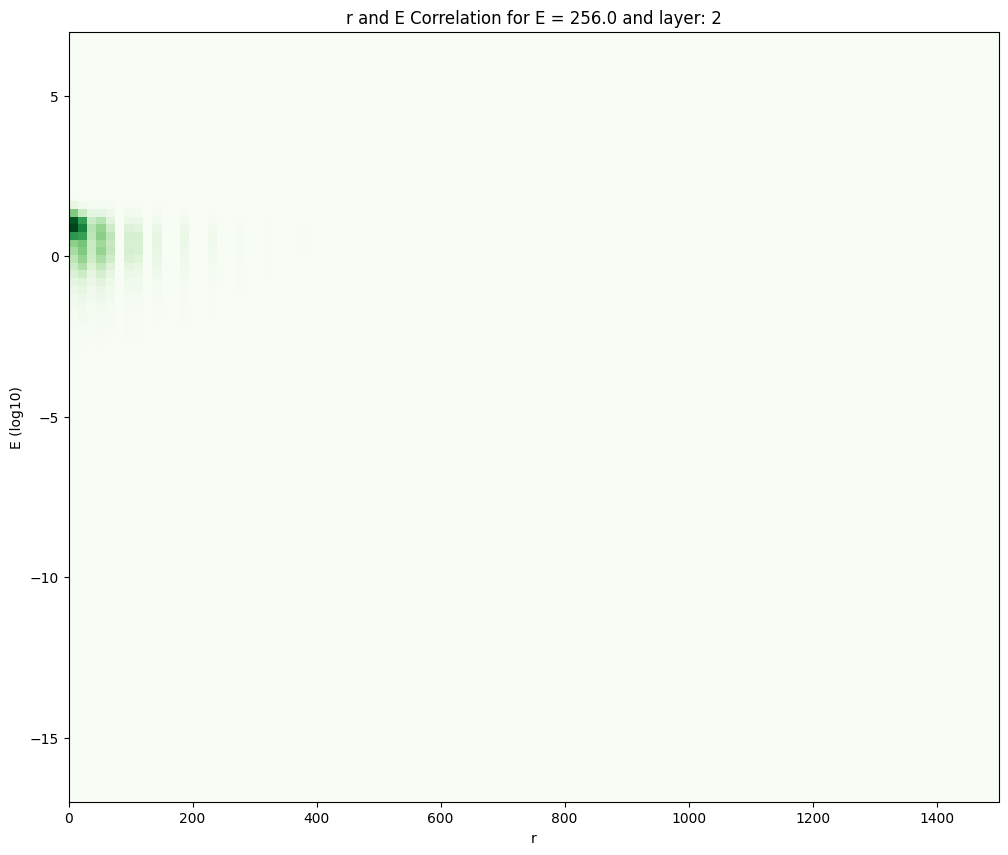

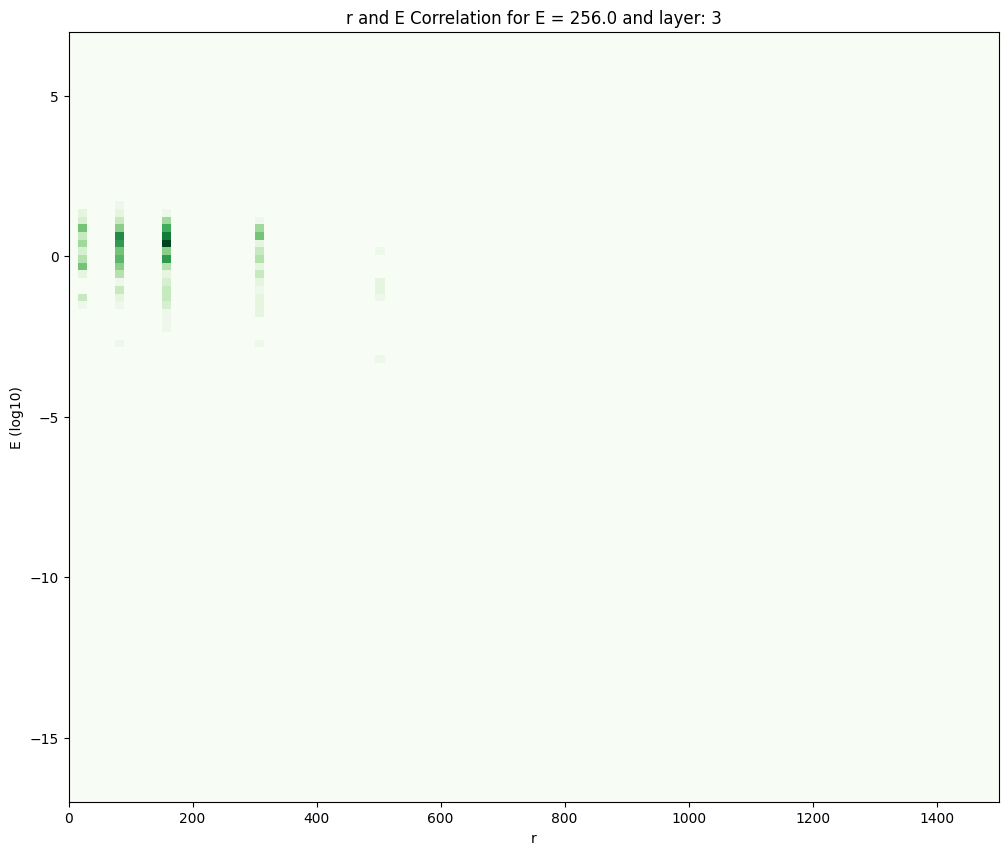

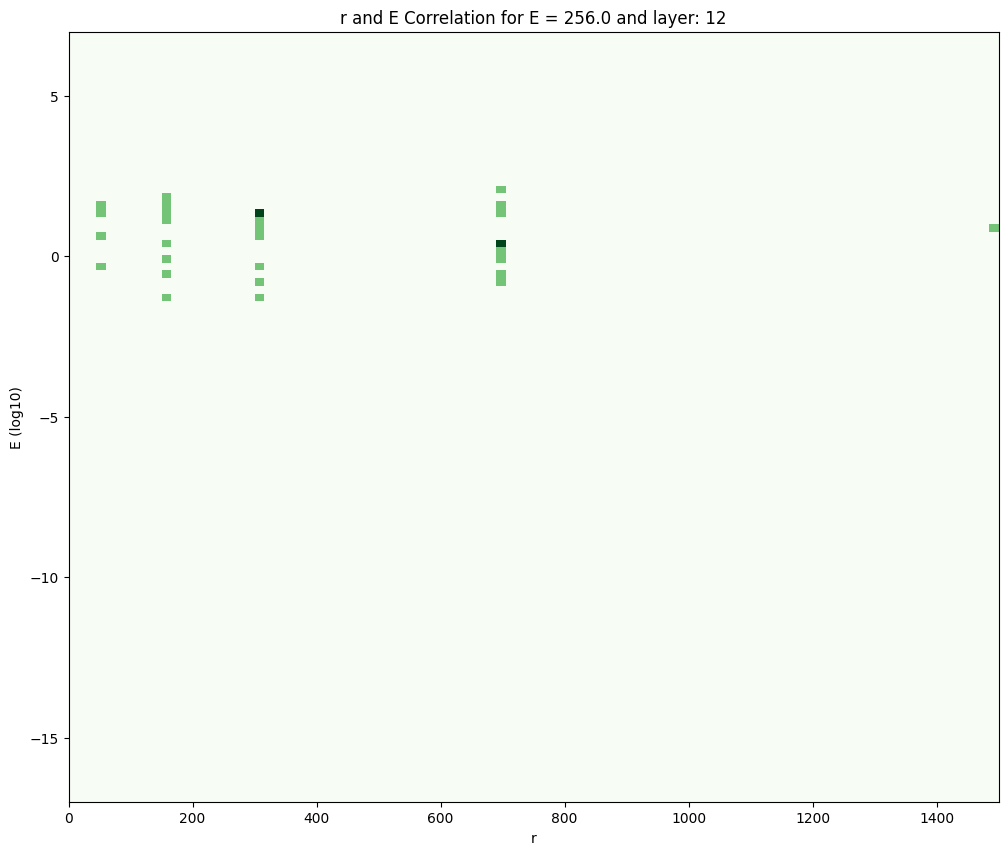

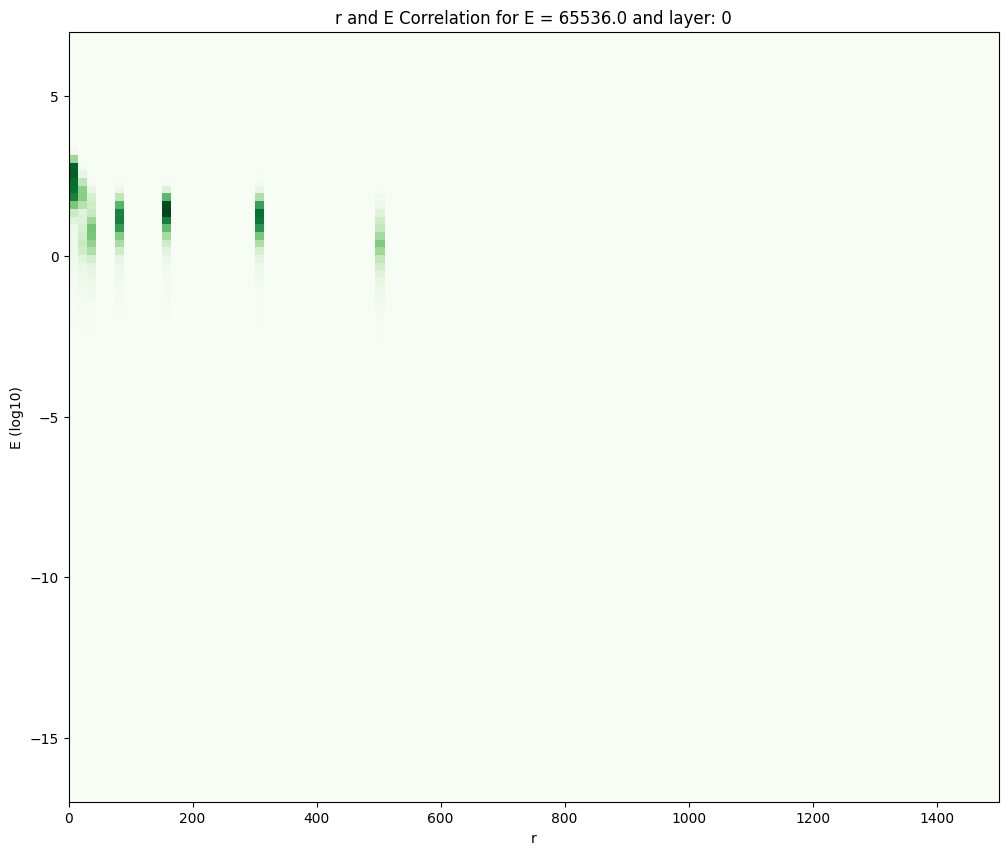

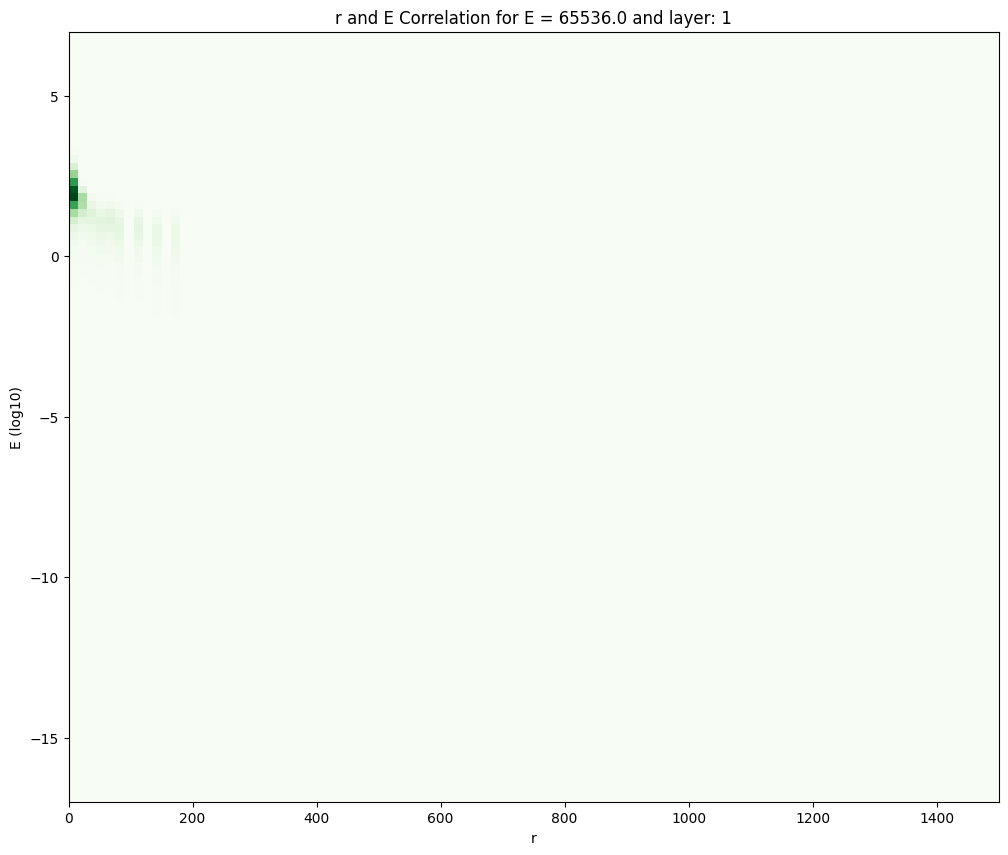

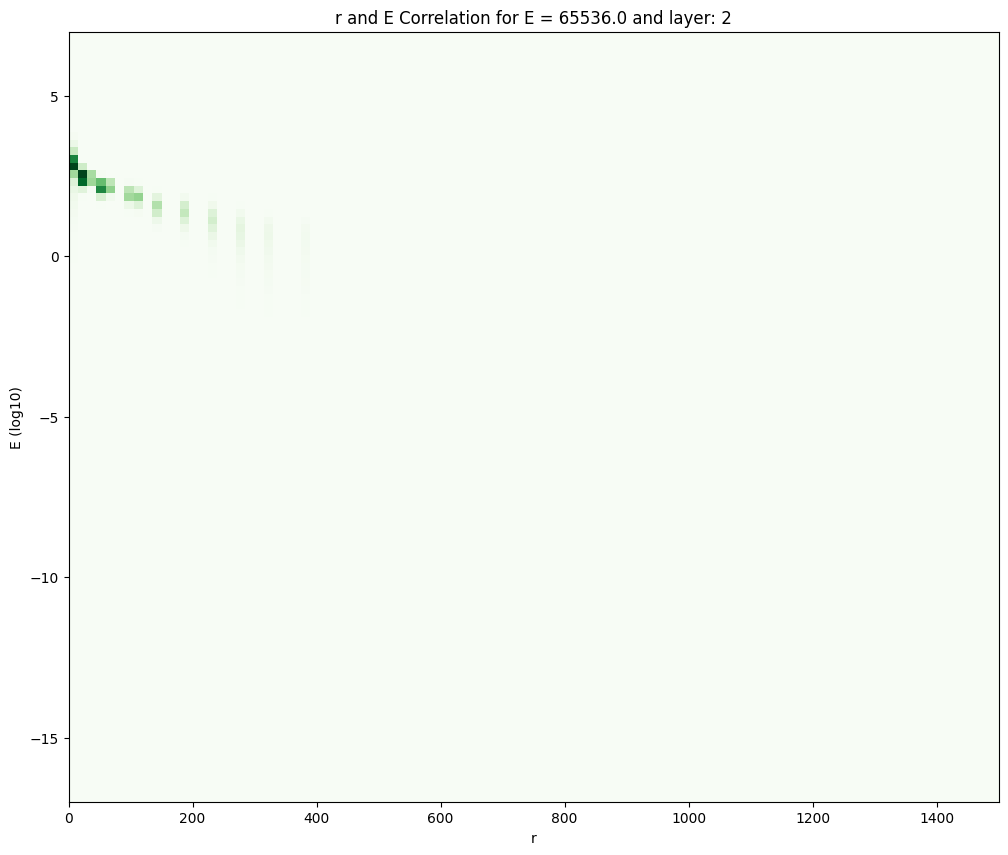

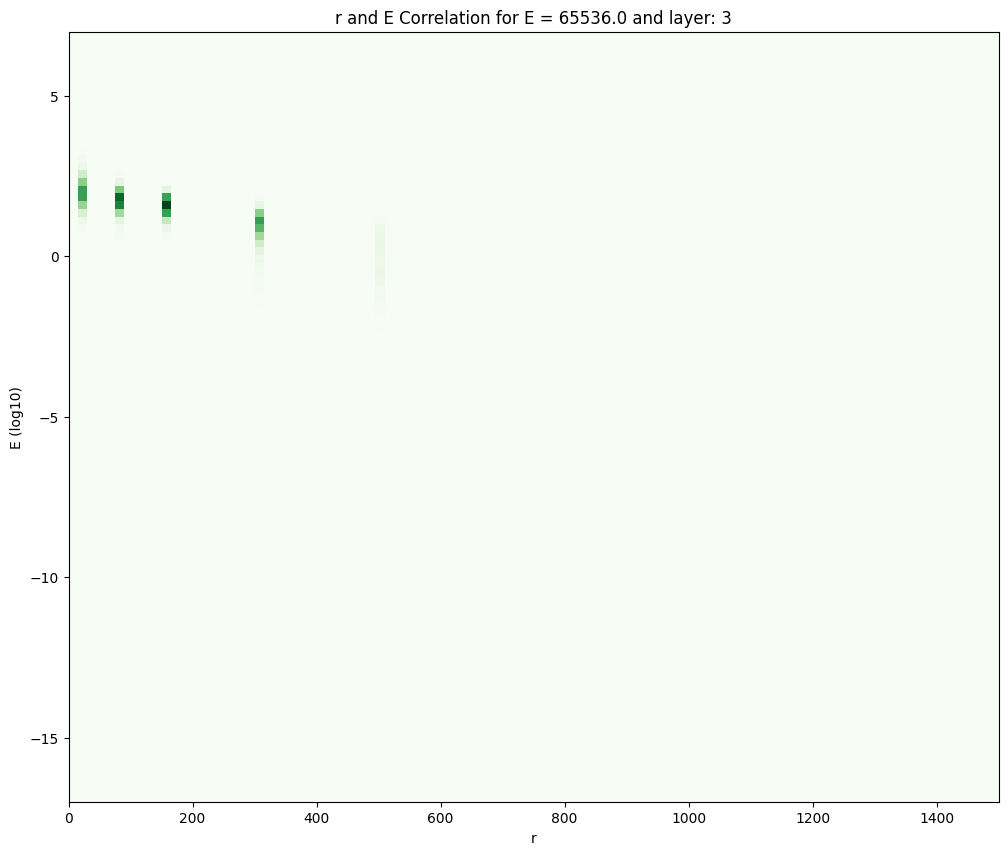

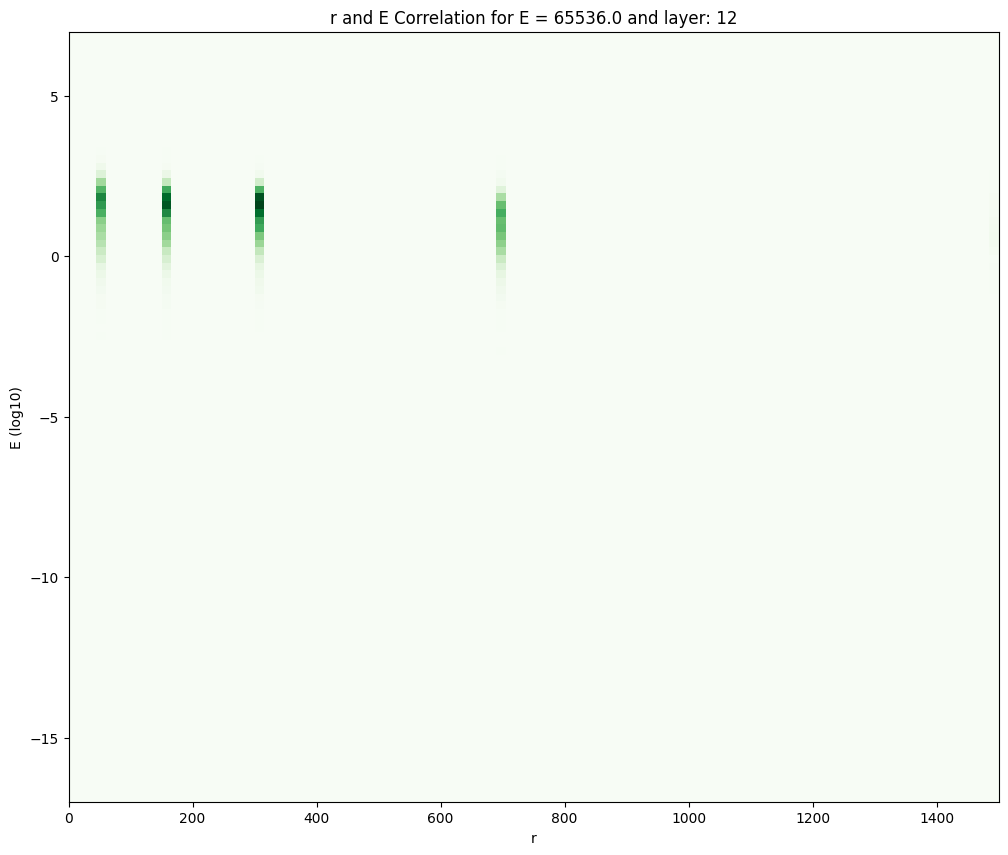

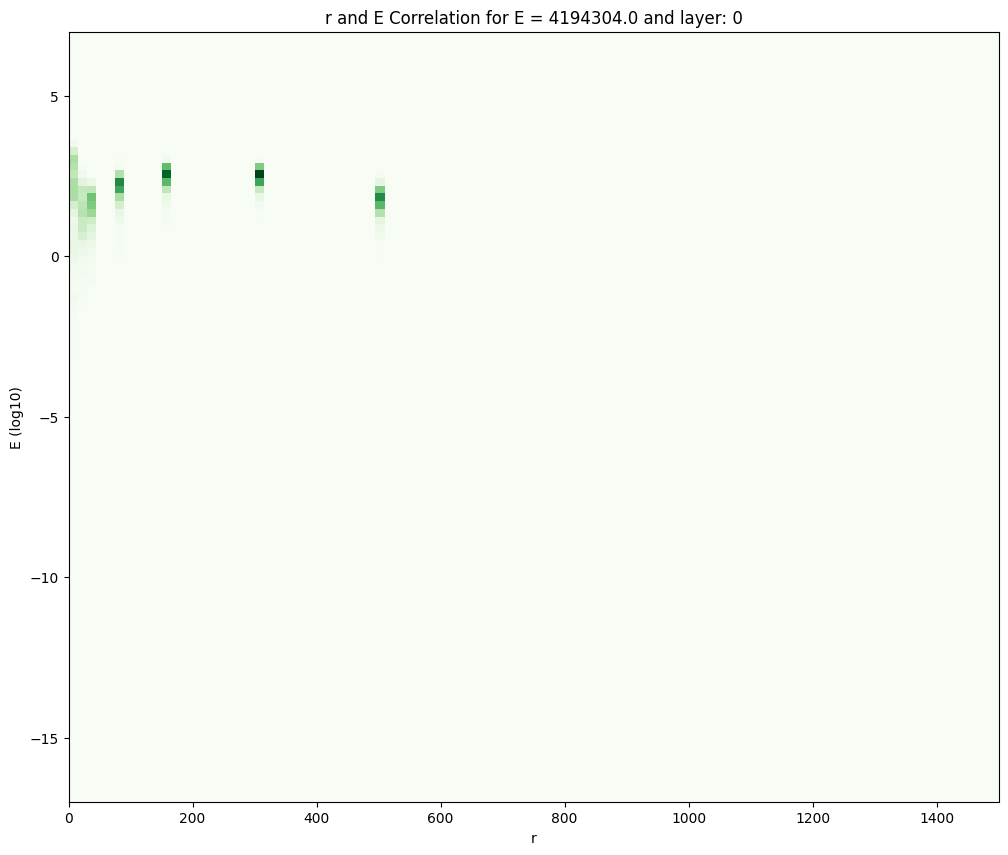

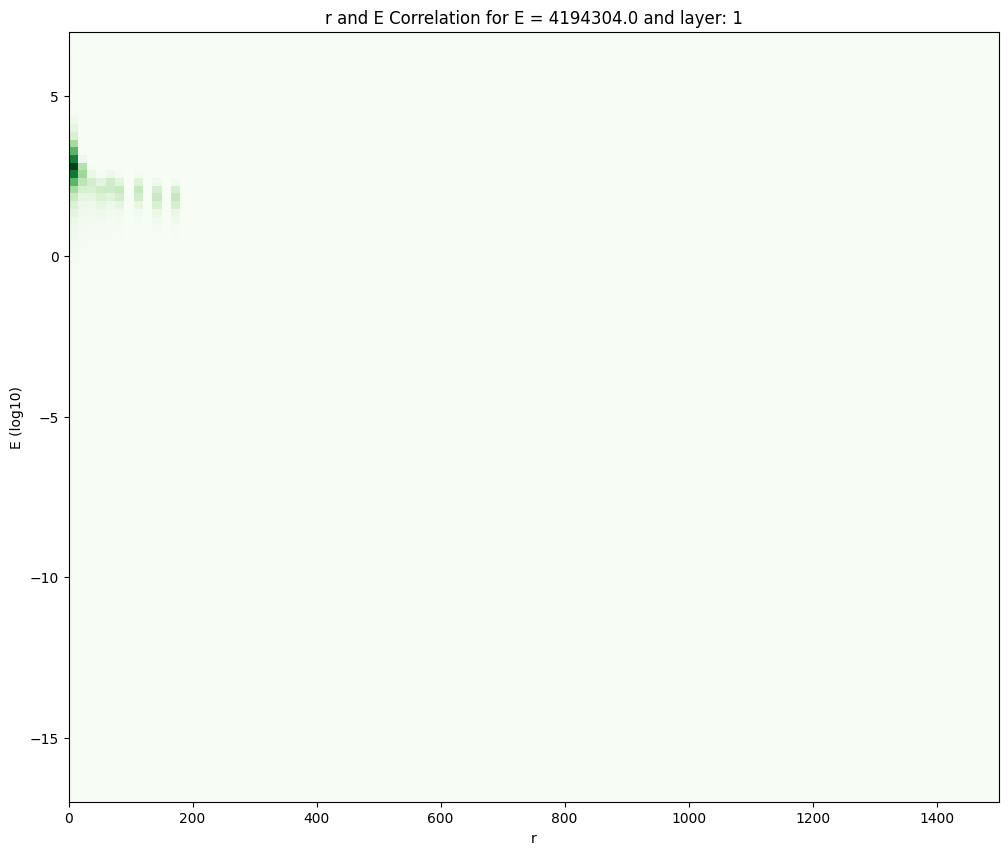

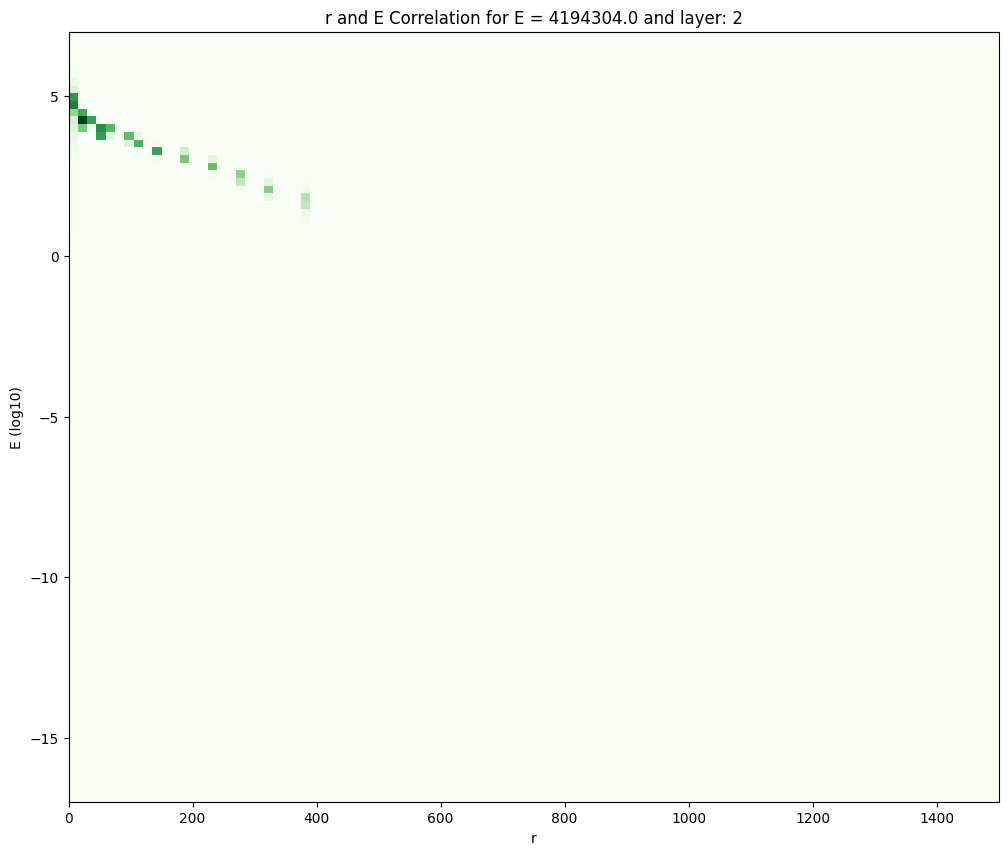

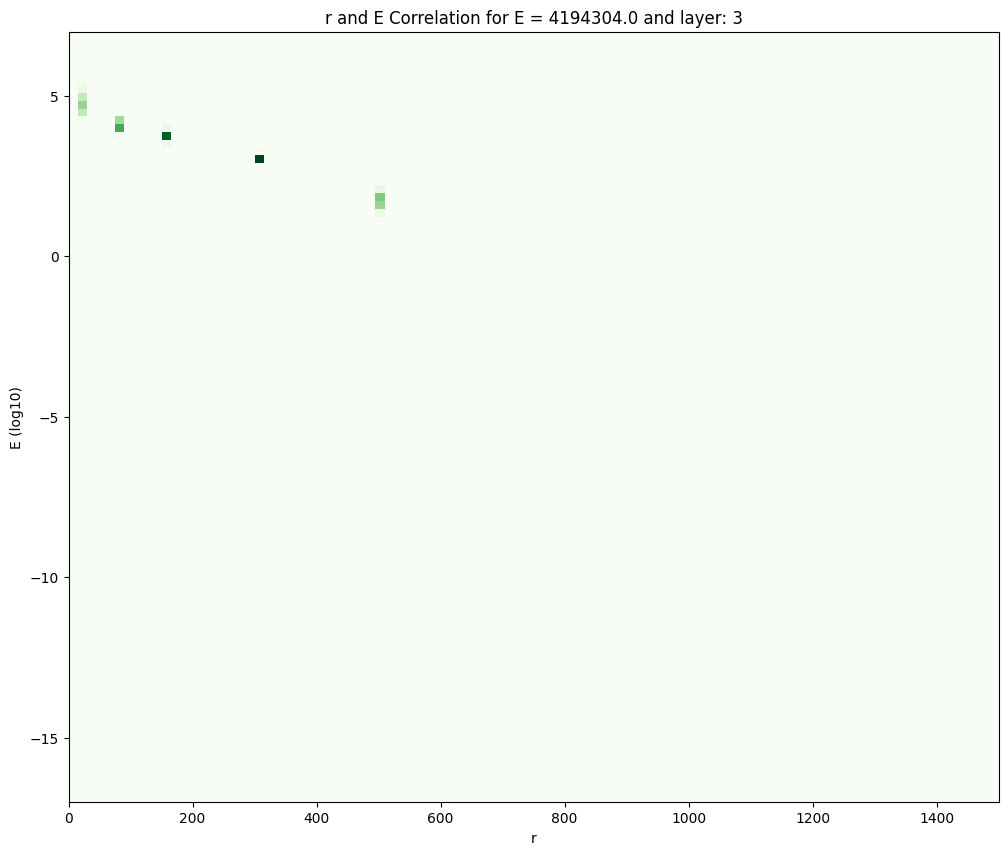

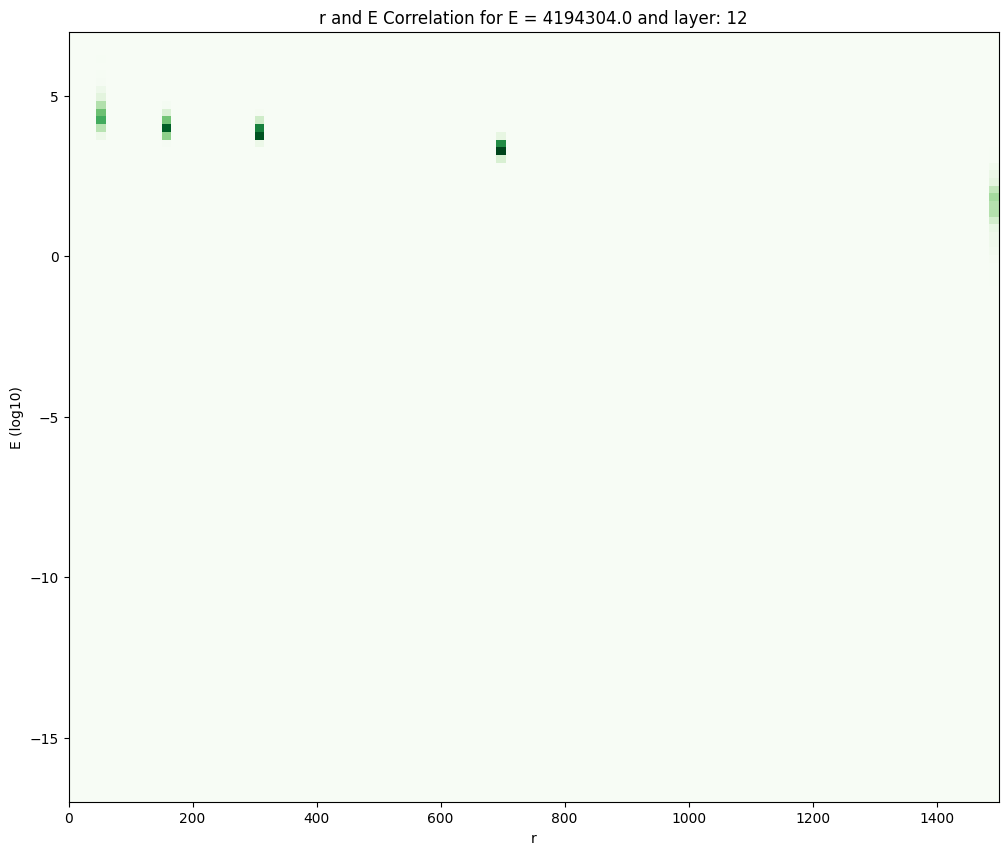

In [4]:
from evaluate_plotting_helper import plot_r_E_hits_Einc
plot_r_E_hits_Einc(data, data_inc)

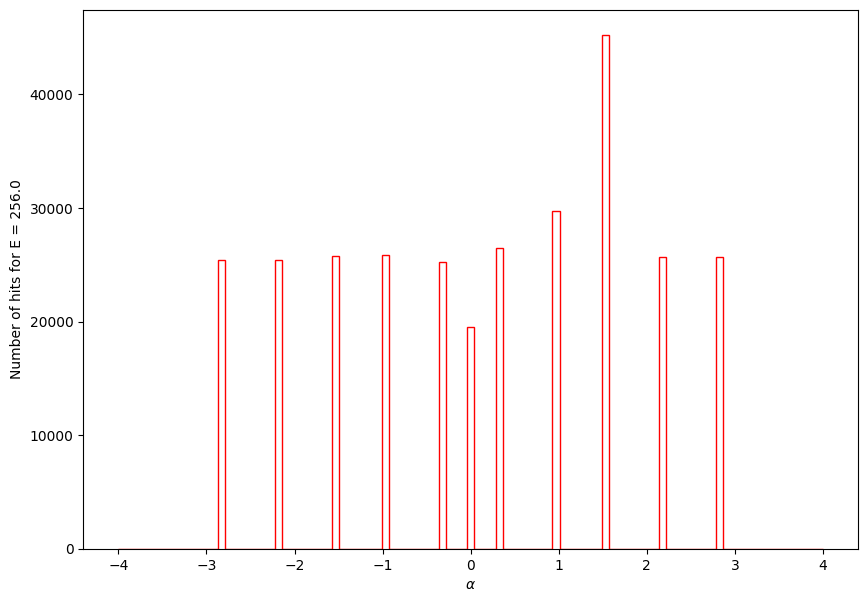

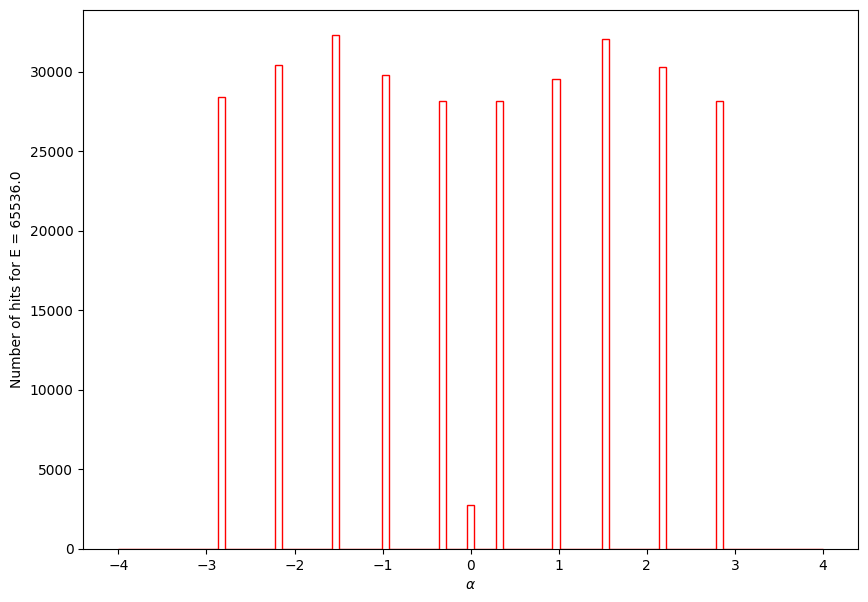

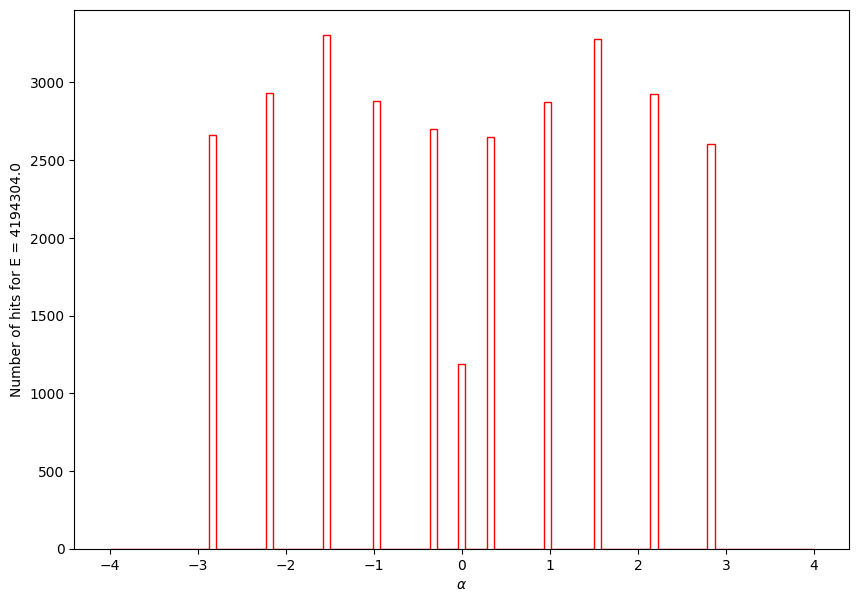

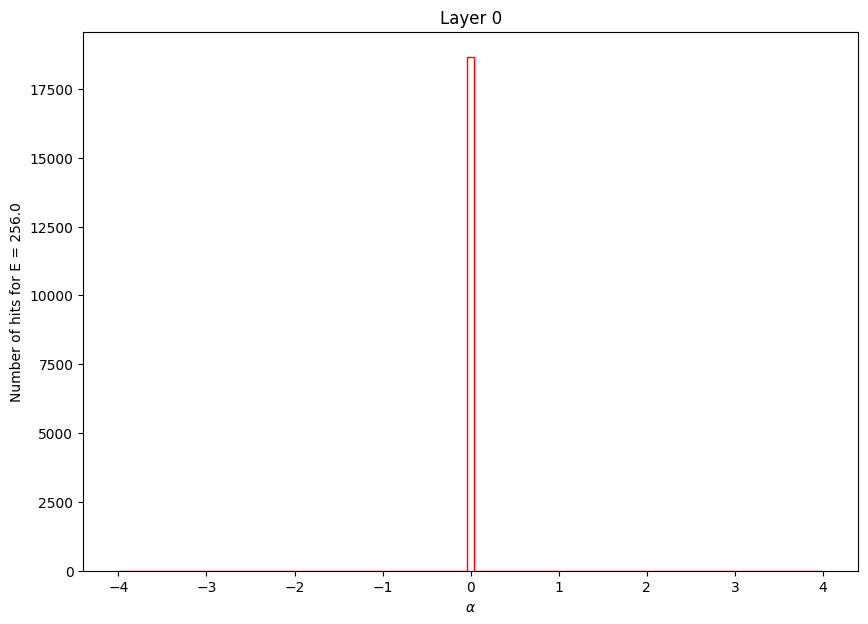

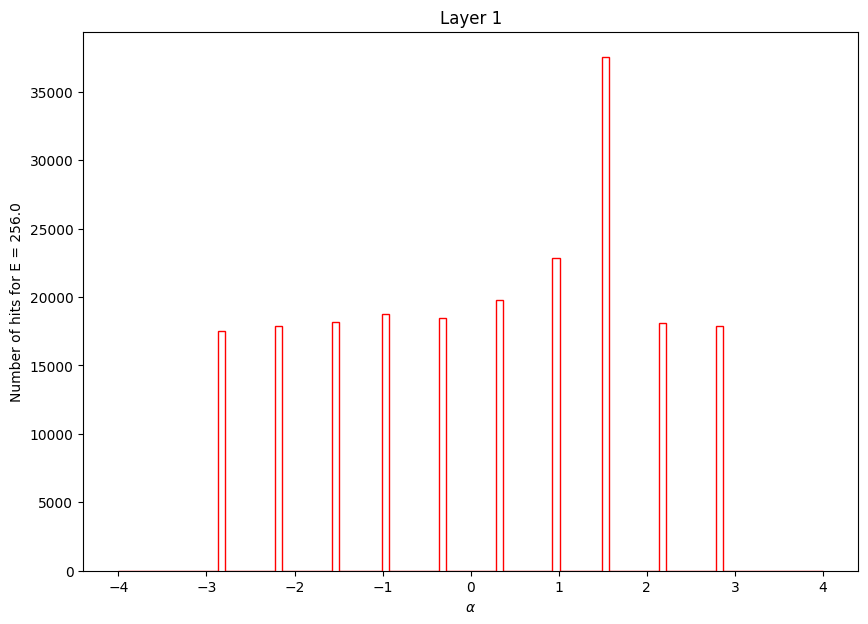

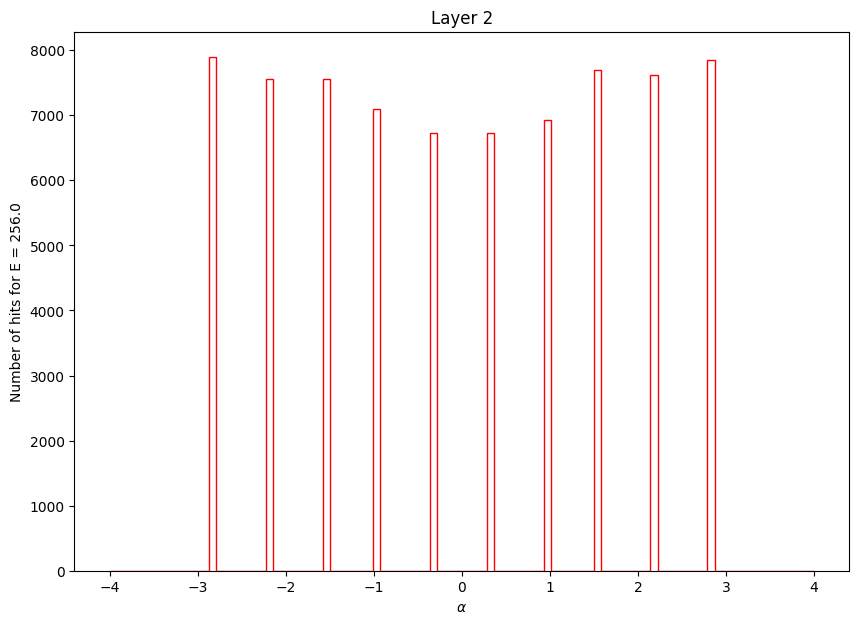

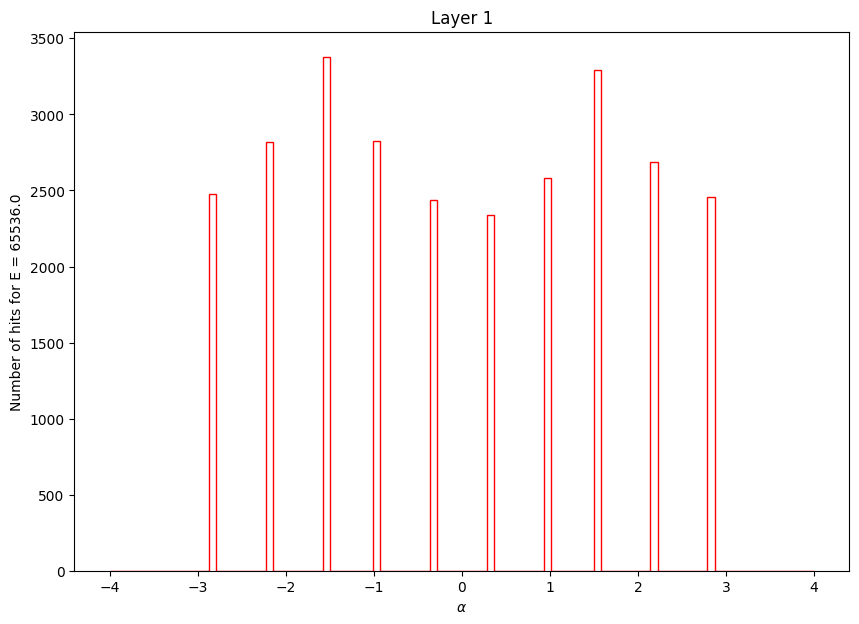

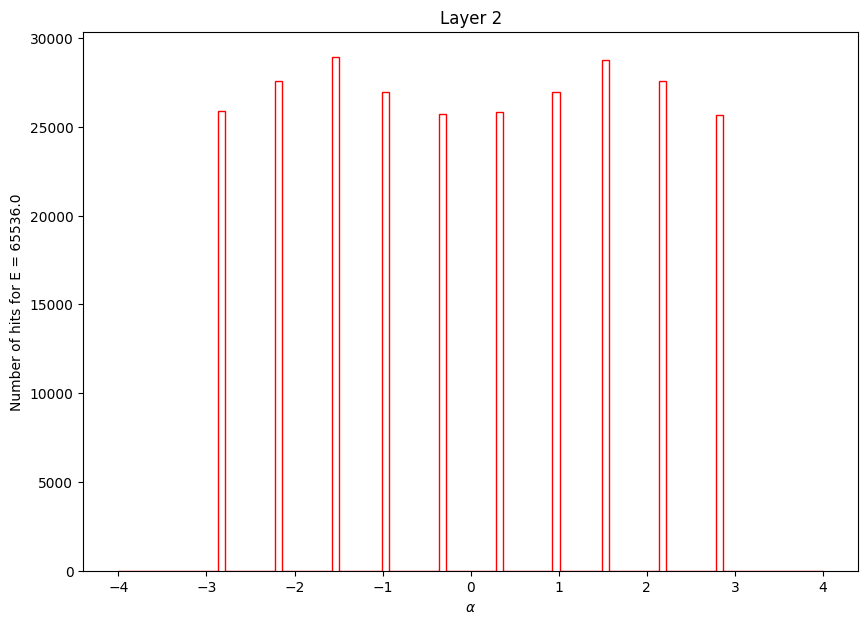

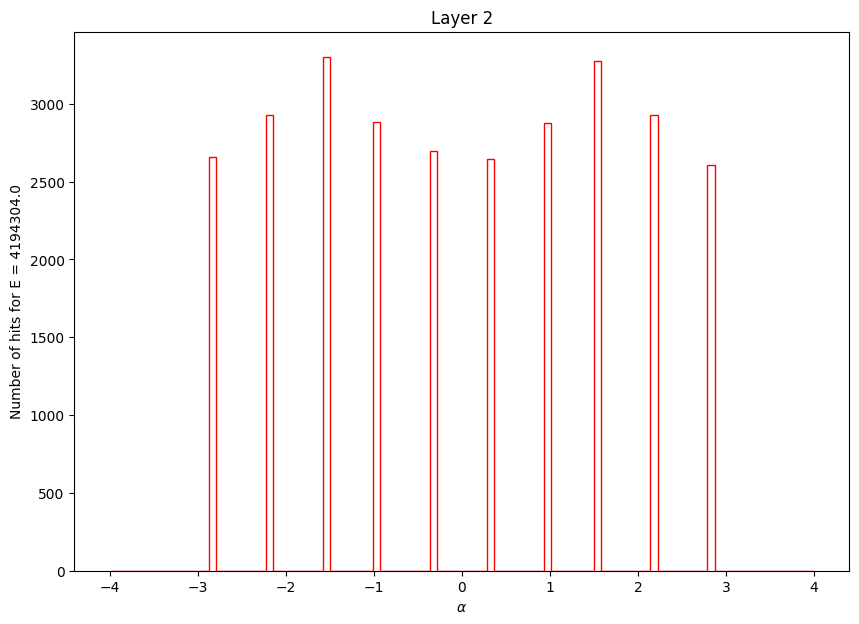

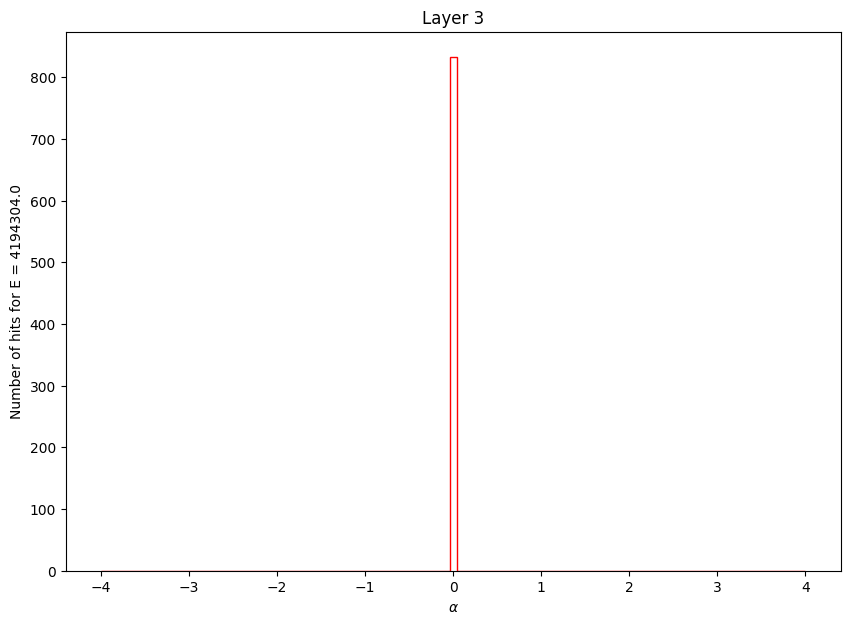

In [11]:
from evaluate_plotting_helper import plot_alpha_Einc_top30
plot_alpha_Einc_top30(data, data_inc)

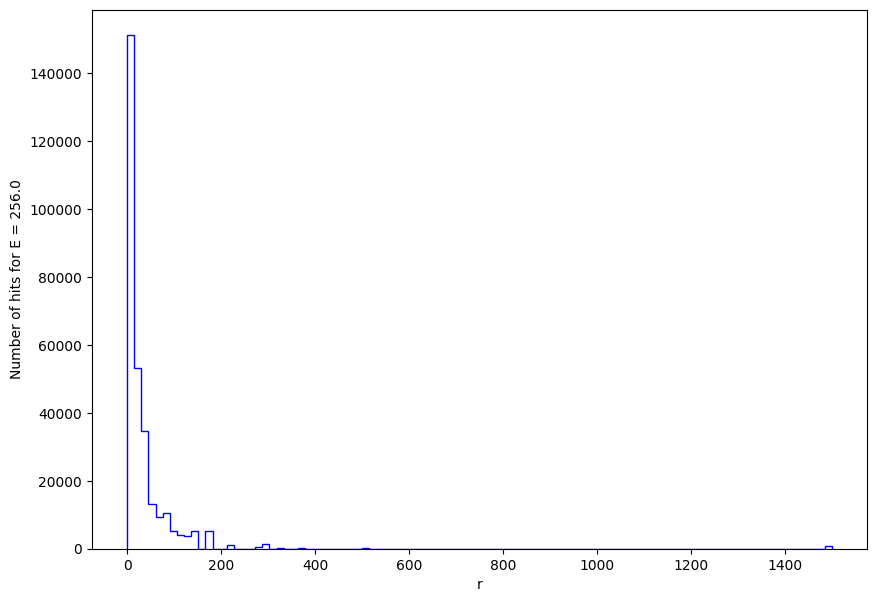

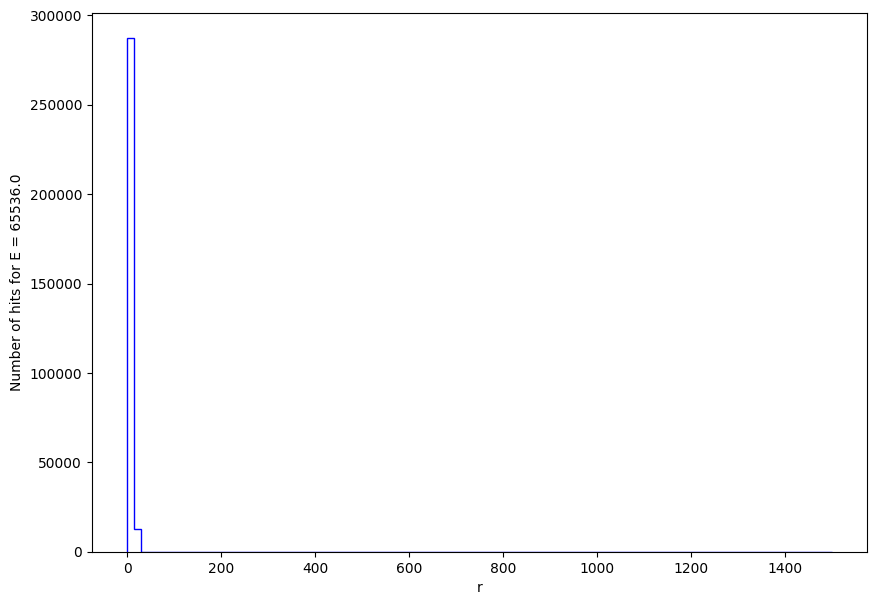

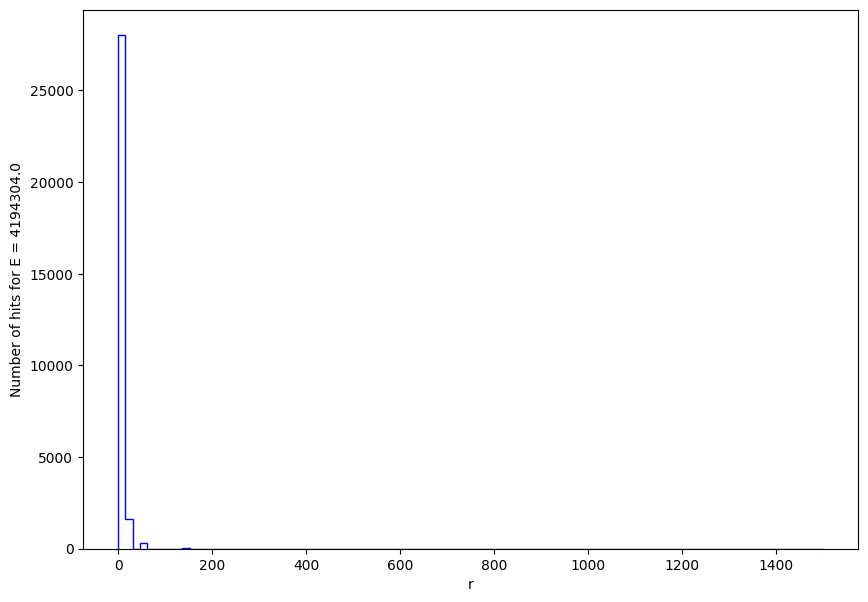

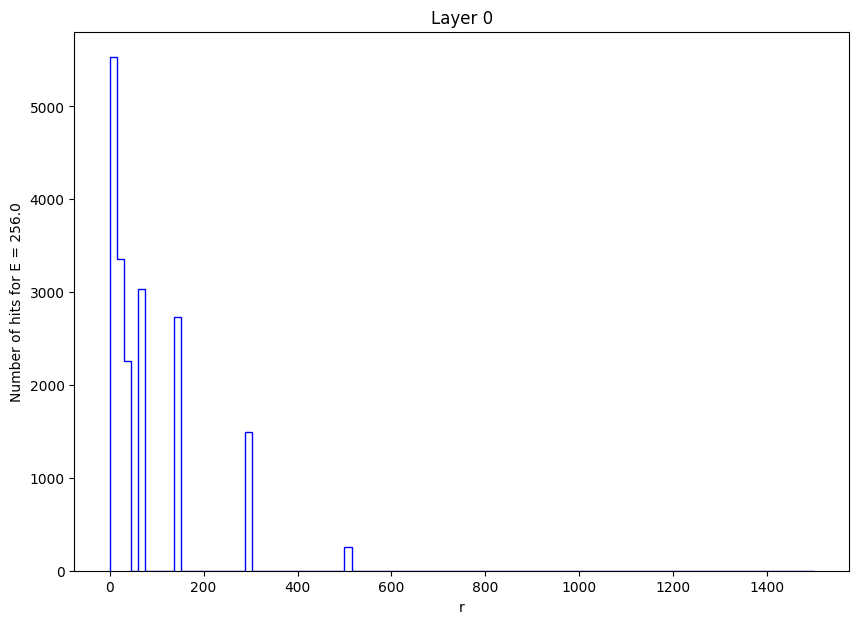

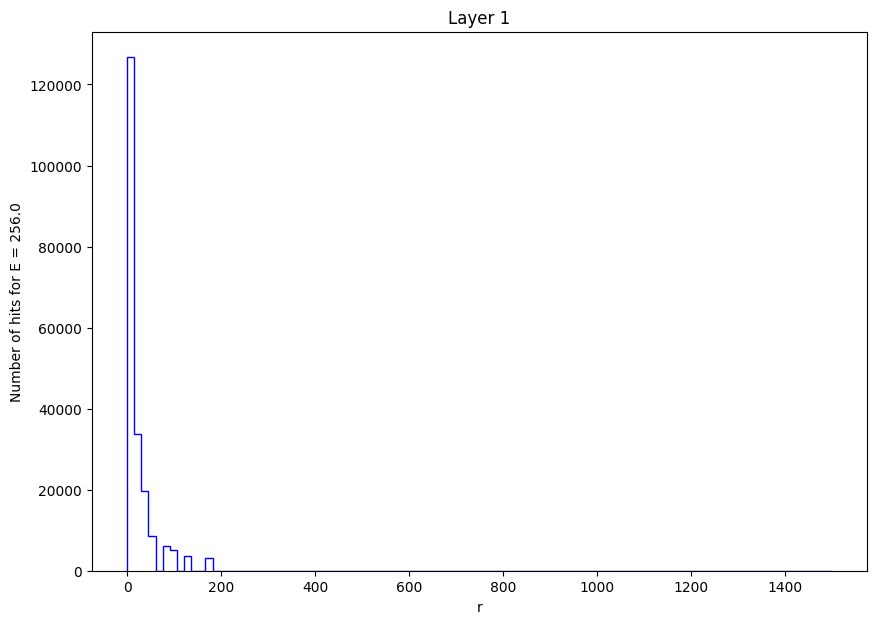

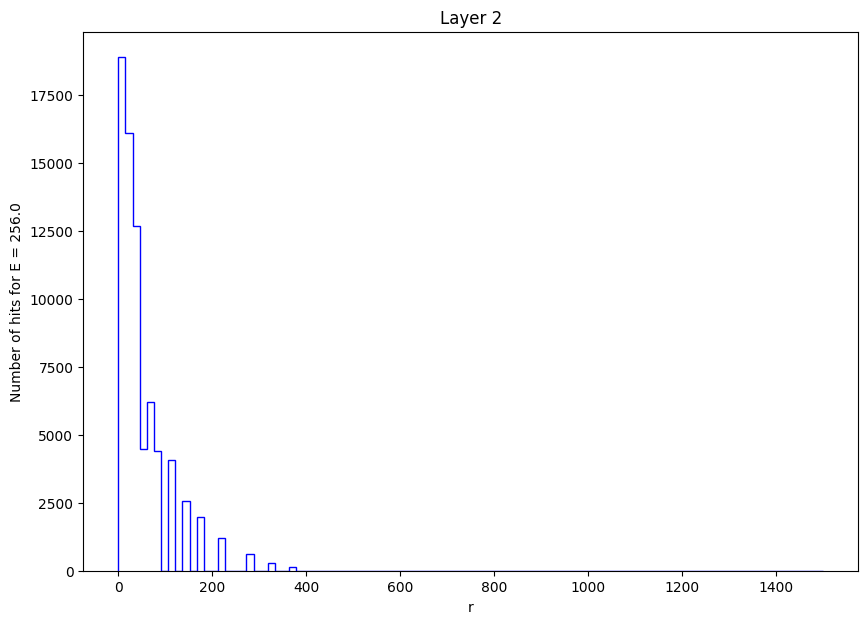

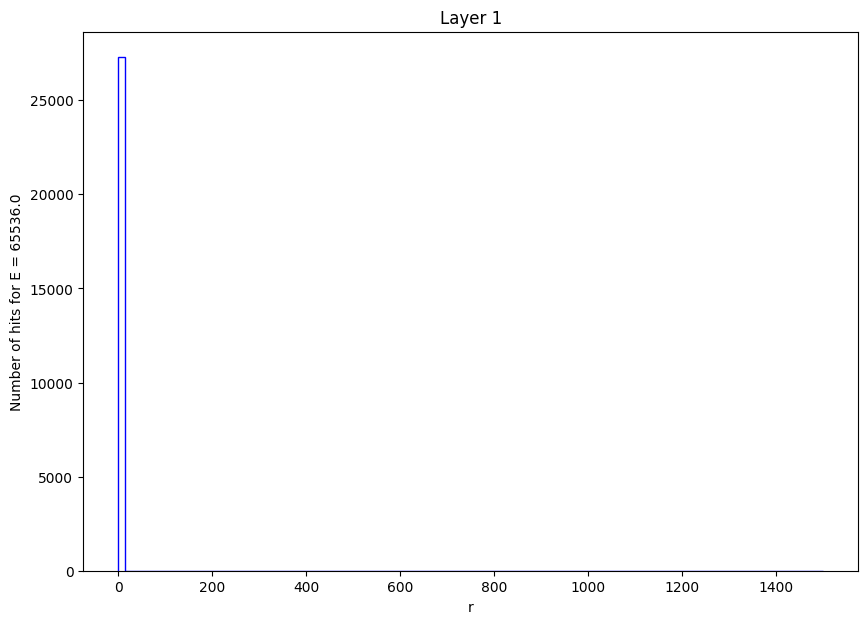

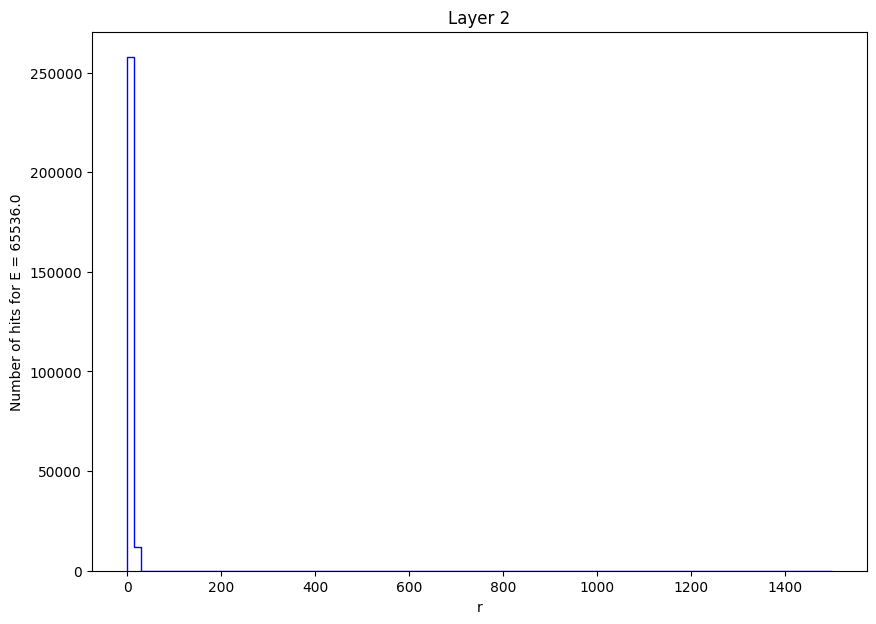

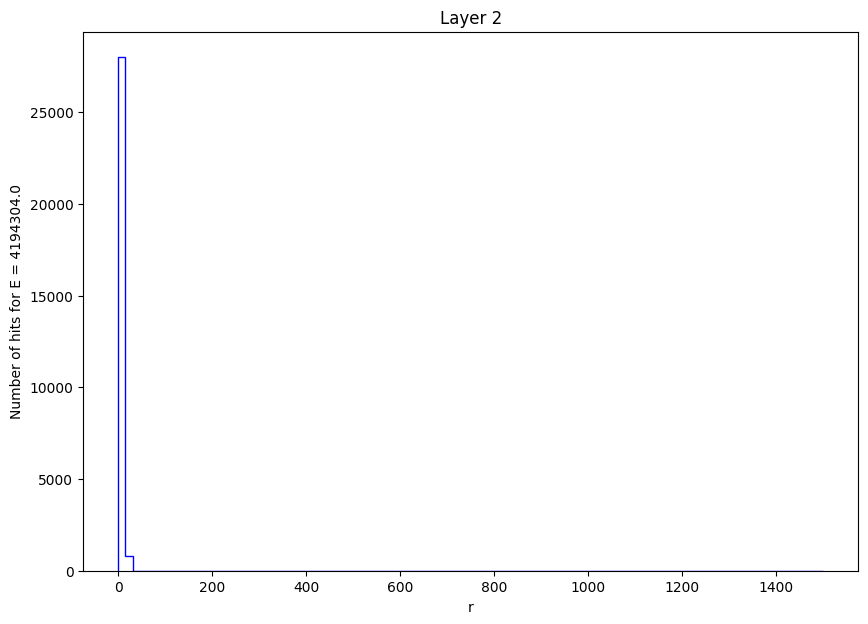

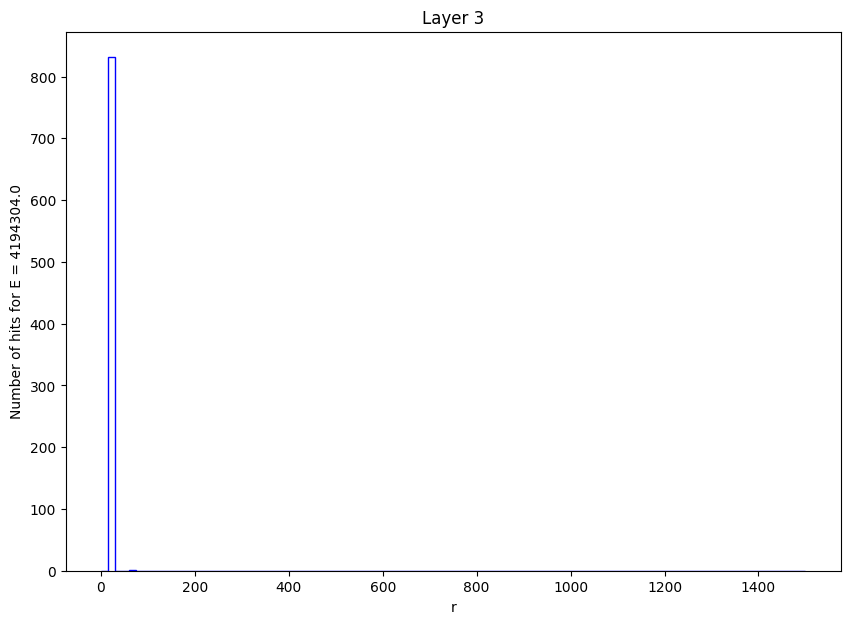

In [5]:
from evaluate_plotting_helper import plot_r_Einc_top30
plot_r_Einc_top30(data, data_inc)

In [18]:
from evaluate_plotting_helper import plot_E_Einc_per_layer
data,_ = cl.format_data()[:]
data_inc = cl.photon_file['incident_energies'][:]
data_inc_sorted = np.sort(data_inc, axis=0).flatten()
E = data_inc_sorted[1]

In [20]:
x = np.array([1,1,1,2,3])
np.bincount(x)

array([0, 3, 1, 1])

In [25]:
def find_top_5_indexes(arr):
    unique_values, counts = np.unique(arr, return_counts=True)
    sorted_indexes = np.argsort(-counts)  # Sort indexes in descending order of frequency

    top_5_indexes = sorted_indexes[:2]
    top_5_values = unique_values[top_5_indexes]
    return top_5_indexes, top_5_values

# Example usage:
H, W, B = 4, 4, 4
X = np.random.randint(0, 4, (H, W, B))  # Generate random array
arr = X[:, :, 3]  # Extract the 4th channel (index 3)

top_5_indexes, top_5_values = find_top_5_indexes(arr)
print('X:',X)
print("Top 5 Indexes:", top_5_indexes)
print("Top 5 Values:", top_5_values)

X: [[[1 1 0 0]
  [3 0 0 2]
  [3 1 1 2]
  [0 3 0 3]]

 [[0 0 1 0]
  [0 2 3 2]
  [0 1 2 0]
  [1 0 2 1]]

 [[2 1 3 2]
  [2 1 0 0]
  [2 3 3 0]
  [1 2 0 0]]

 [[0 2 2 3]
  [1 0 0 0]
  [1 2 3 2]
  [0 0 2 3]]]
Top 5 Indexes: [0 2]
Top 5 Values: [0 2]


(1.696969696969699, 1.9494949494949516)


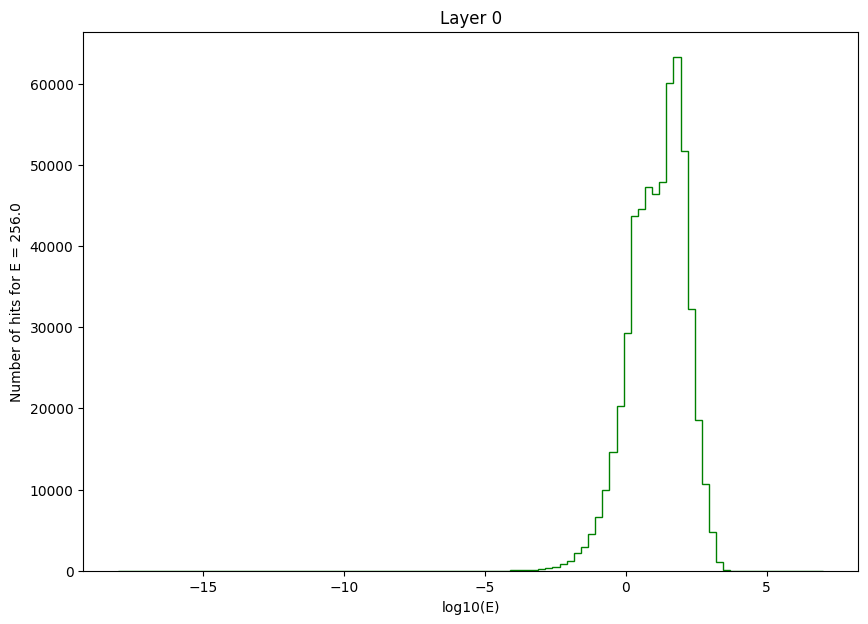

(1.1919191919191938, 1.4444444444444464)


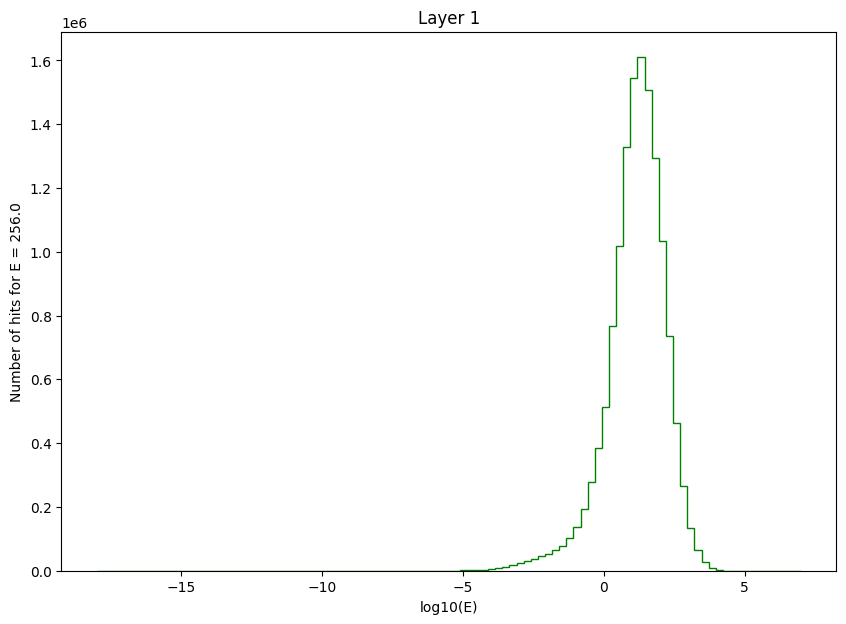

(1.4444444444444464, 1.696969696969699)


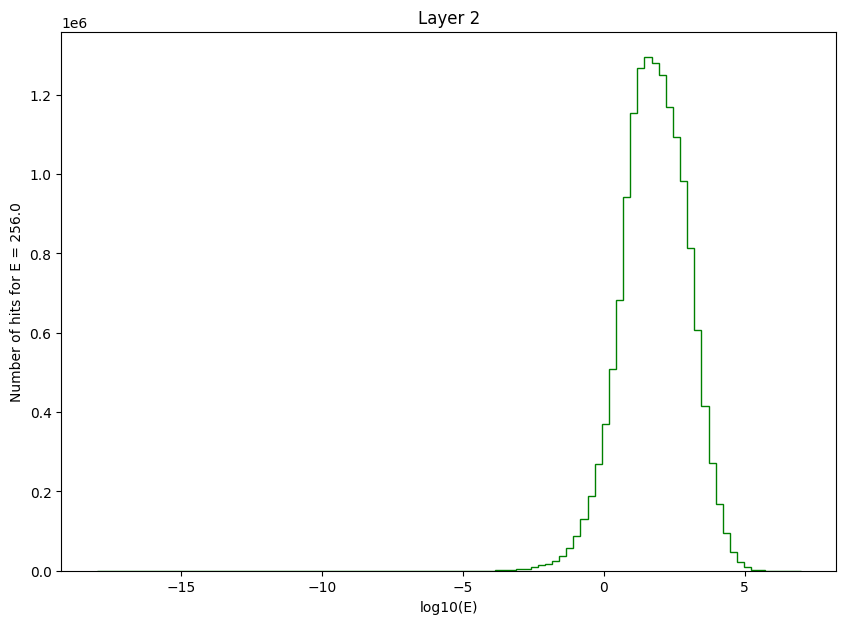

(1.1919191919191938, 1.4444444444444464)


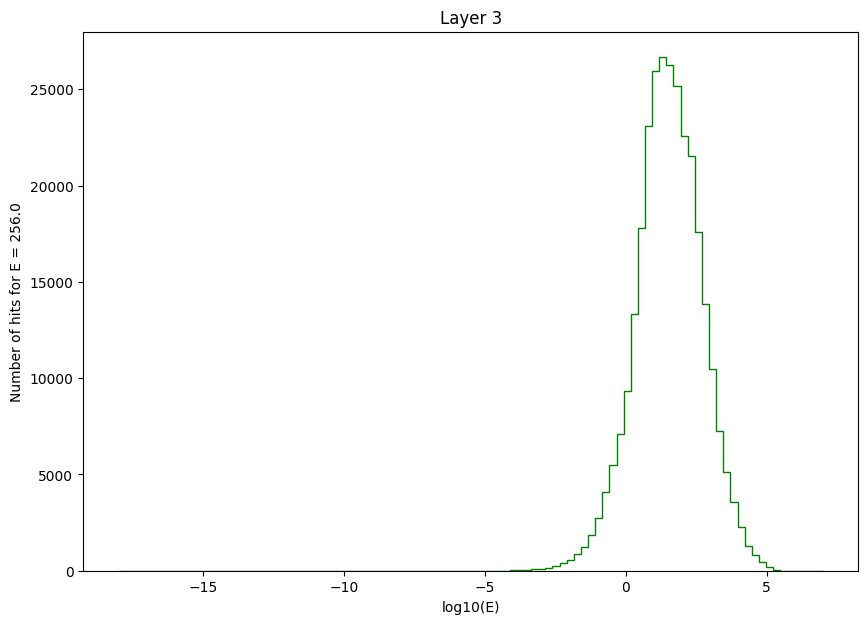

(1.9494949494949516, 2.202020202020204)


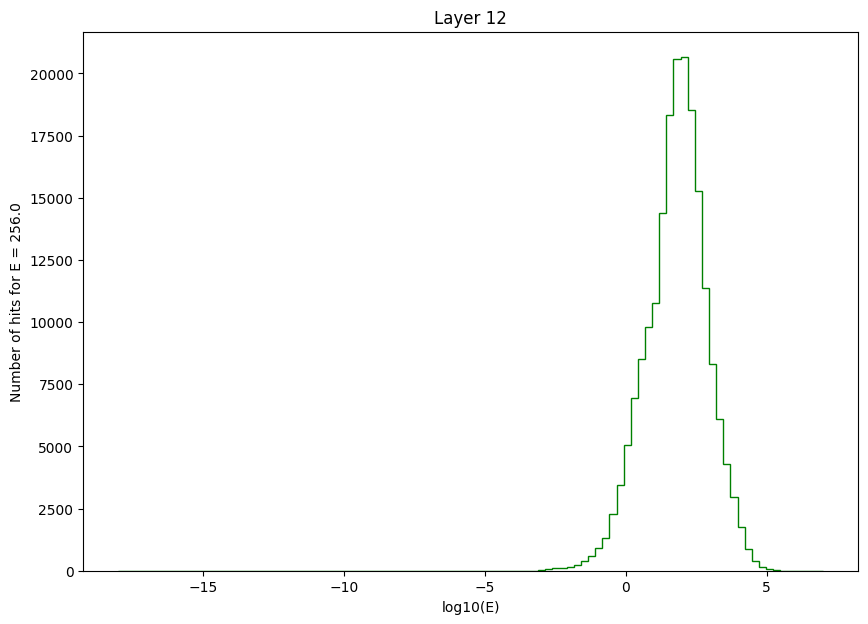

In [19]:
layers = set(data[0,:,0])
data = data.reshape(-1, 4)
for layer in sorted(list(layers)):
    E_hist = data[data[:,0] == layer][:,3]
    E_hist = np.log10(E_hist[E_hist > 0])
    _, ax = plt.subplots(figsize =(10, 7))
    #ax.set_xscale('log', base = 10)
    h = ax.hist(E_hist, bins = np.linspace(-18,7, num=100), density=False, histtype='step', color = 'g')
    args = np.argsort(h[0])
    max_five = args[-1]
    l, r = h[1][max_five], h[1][max_five+1]
    print((l,r))
    maxE = 10 ** (E_hist[E]
    ax.set_xlabel('log10(E)')
    ax.set_ylabel(r'Number of hits for E = {}'.format(E))
    ax.set_title(r'Layer {}'.format(int(layer)))
    plt.show()

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00, 1.0000e+00,
       2.0000e+00, 1.0000e+00, 1.2000e+01, 1.2000e+01, 2.1000e+01,
       3.3000e+01, 4.8000e+01, 7.7000e+01, 1.3000e+02, 1.9900e+02,
       3.3700e+02, 4.9500e+02, 7.7300e+02, 1.1850e+03, 2.1710e+03,
       2.9360e+03, 4.5510e+03, 6.5750e+03, 9.9780e+03, 1.4563e+04,
       2.0308e+04, 2.9286e+04, 4.3719e+04, 4.4595e+04, 4.7205

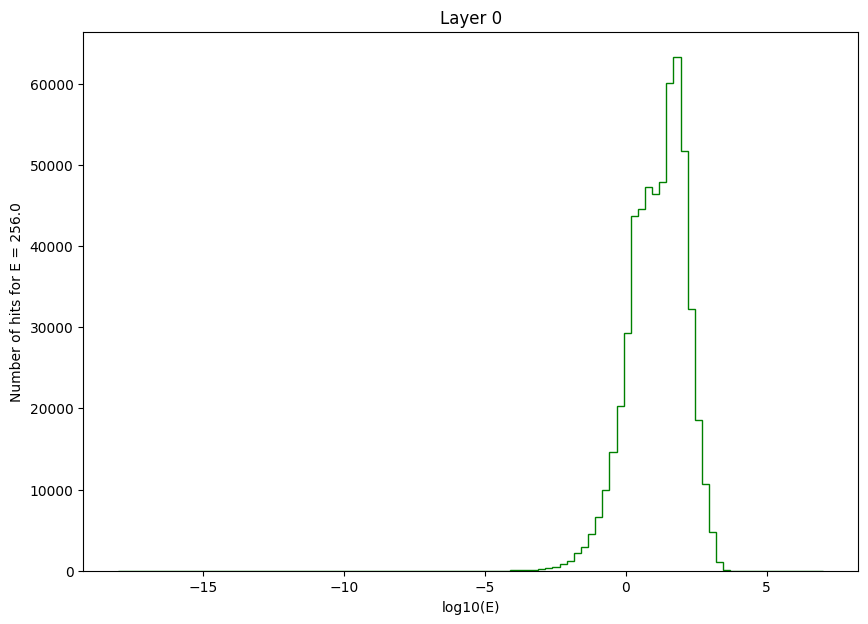

(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
       0.000000e+00, 1.300000e+01, 1.800000e+01, 1.600000e+01,
       2.100000e+01, 2.300000e+01, 3.500000e+01, 1.700000e+01,
       1.800000e+01, 1.500000e+01, 1.100000e+01, 5.000000e+00,
       8.000000e+00, 2.000000e+00, 4.000000e+00, 4.000000e+00,
       1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 1.000000e+00, 1.000000e+00, 0.000000e+00,
       1.000000e+00, 4.000000e+00, 3.000000e+00, 1.000000e+00,
       5.000000e+00, 7.000000e+00, 1.000000e+01, 2.300000e+01,
       4.100000e+01, 6.800000e+01, 1.150000e+02, 1.590000e+02,
       2.820000e+02, 4.160000e+02, 6.890000e+02, 1.036000e+03,
       1.639000e+03, 2.428000e+03, 3.731000e+03, 5.573000e+03,
       8.195000e+03, 1.209900e+04, 1.778700e+04, 2.425500e+04,
       3.044700e+04, 3.772600e+04, 4.545200e+04, 5.290

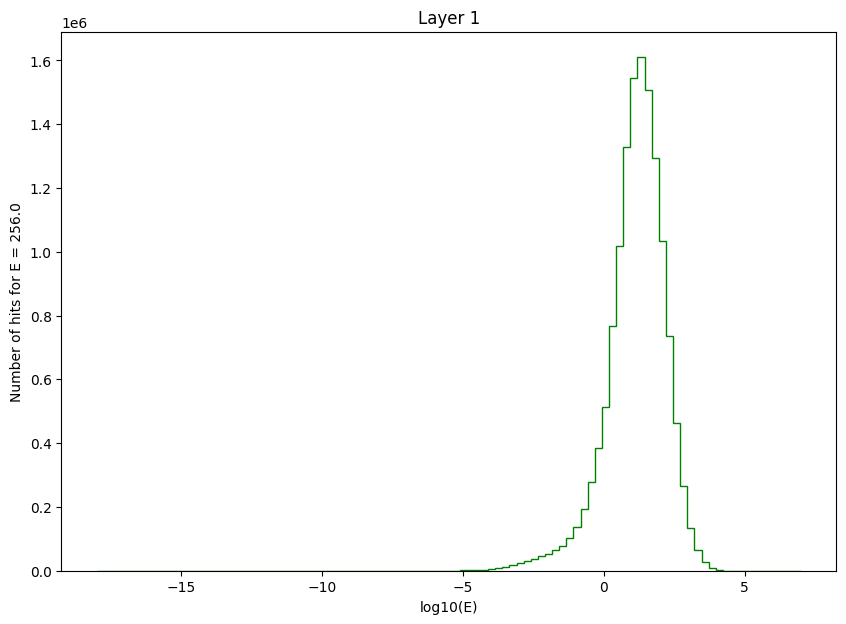

(array([0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 2.000000e+00,
       2.000000e+00, 1.200000e+01, 2.400000e+01, 4.400000e+01,
       2.700000e+01, 3.300000e+01, 3.500000e+01, 3.400000e+01,
       2.300000e+01, 2.000000e+01, 1.500000e+01, 1.200000e+01,
       8.000000e+00, 8.000000e+00, 5.000000e+00, 1.000000e+00,
       3.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 1.000000e+00, 1.000000e+00,
       1.000000e+00, 5.000000e+00, 5.000000e+00, 9.000000e+00,
       2.200000e+01, 4.500000e+01, 8.100000e+01, 9.200000e+01,
       1.120000e+02, 2.150000e+02, 3.300000e+02, 5.290000e+02,
       9.270000e+02, 1.365000e+03, 2.183000e+03, 3.480000e+03,
       5.335000e+03, 8.279000e+03, 1.342200e+04, 1.773

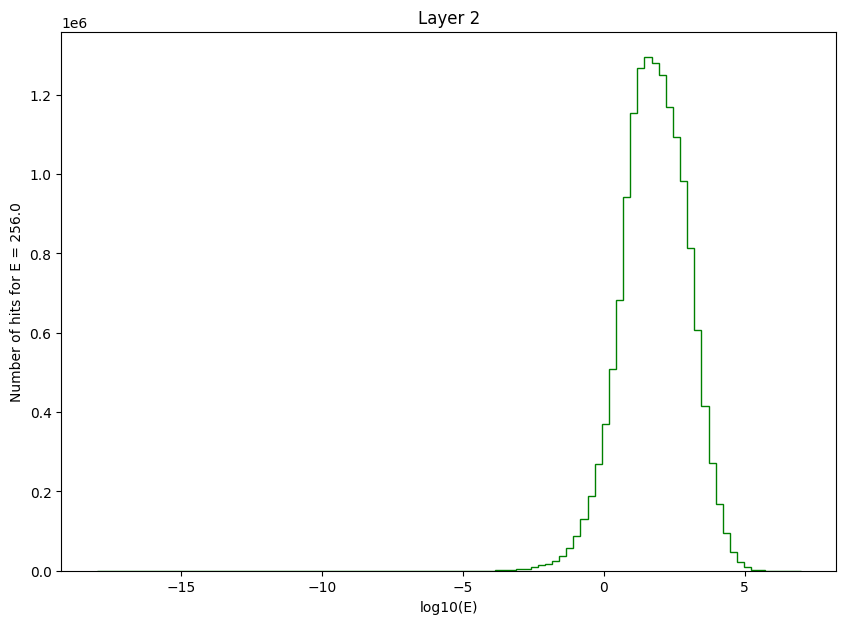

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00,
       2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
       4.0000e+00, 0.0000e+00, 7.0000e+00, 4.0000e+00, 9.0000e+00,
       1.7000e+01, 2.6000e+01, 5.0000e+01, 7.7000e+01, 1.0700e+02,
       1.5900e+02, 2.2400e+02, 4.0900e+02, 5.3600e+02, 8.4900e+02,
       1.2110e+03, 1.8720e+03, 2.7490e+03, 4.0770e+03, 5.4830e+03,
       7.0830e+03, 9.3290e+03, 1.3333e+04, 1.7812e+04, 2.3078

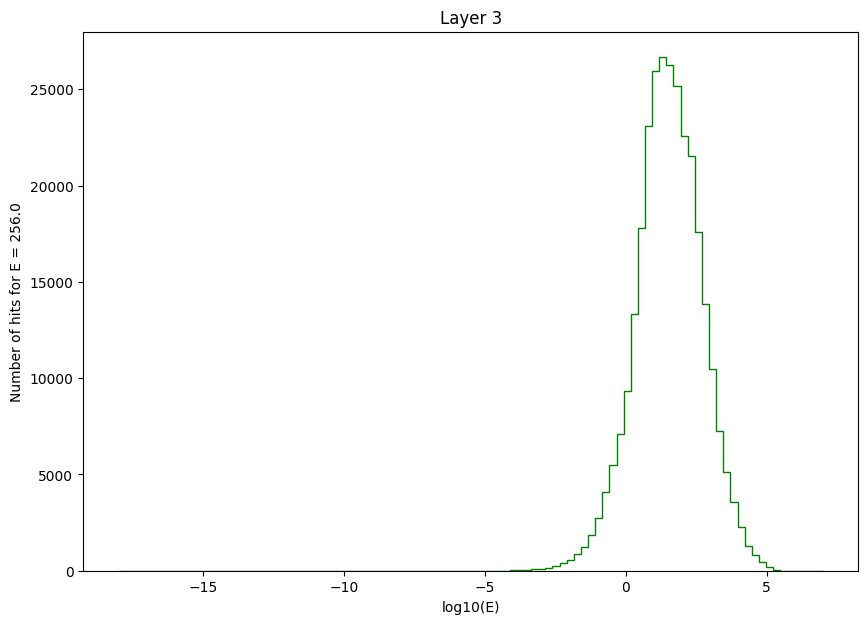

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       2.0000e+00, 2.0000e+00, 2.0000e+00, 5.0000e+00, 4.7000e+01,
       6.0000e+01, 9.2000e+01, 1.0500e+02, 1.3600e+02, 2.3900e+02,
       4.0800e+02, 6.0900e+02, 9.2400e+02, 1.3290e+03, 2.2710e+03,
       3.4480e+03, 5.0760e+03, 6.9520e+03, 8.5050e+03, 9.7910

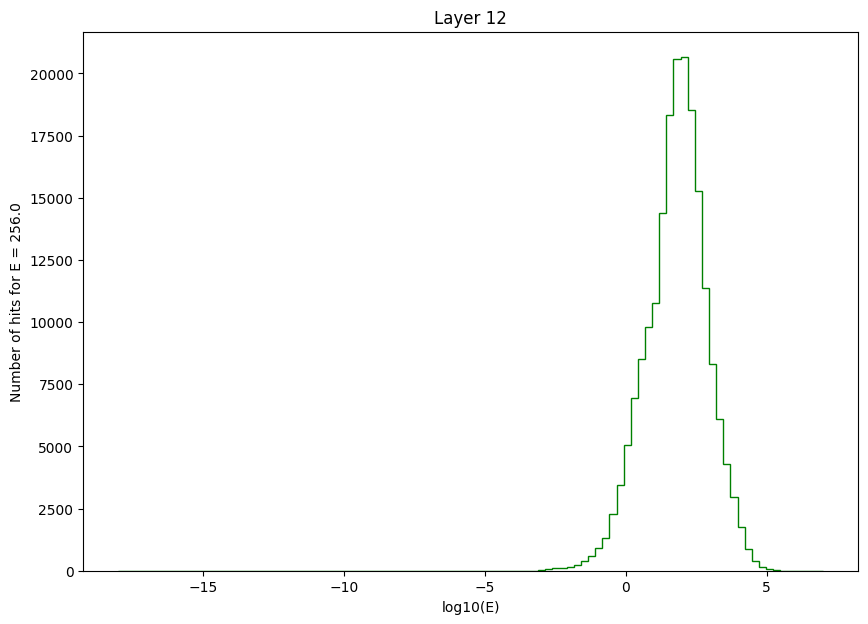

In [5]:
from evaluate_plotting_helper import plot_E_Einc_per_layer
data_inc_sorted = np.sort(data_inc, axis=0).flatten()
E = data_inc_sorted[1]
plot_E_Einc_per_layer(data, E)

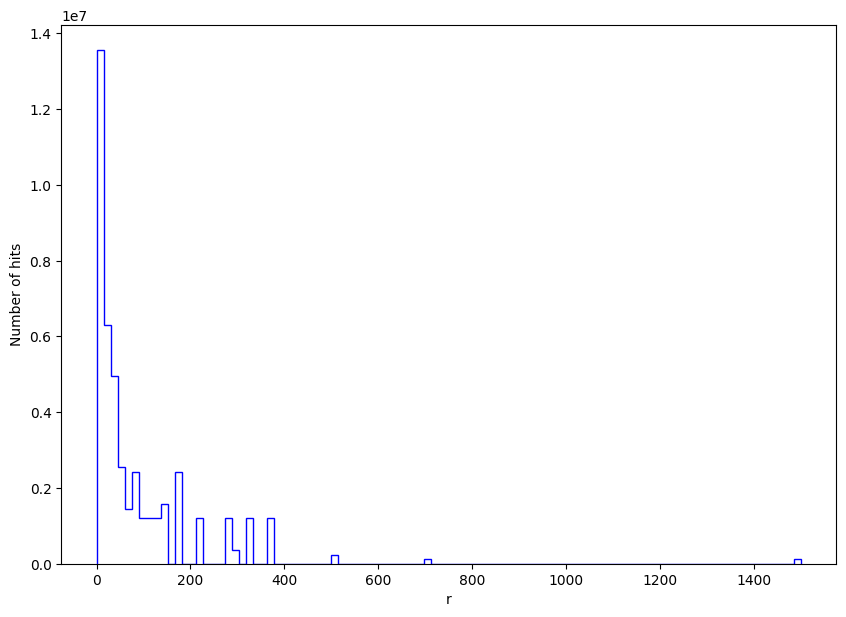

In [3]:
from evaluate_plotting_helper import plot_r_hits
data,_ = cl.format_data()
plot_r_hits(data[:])

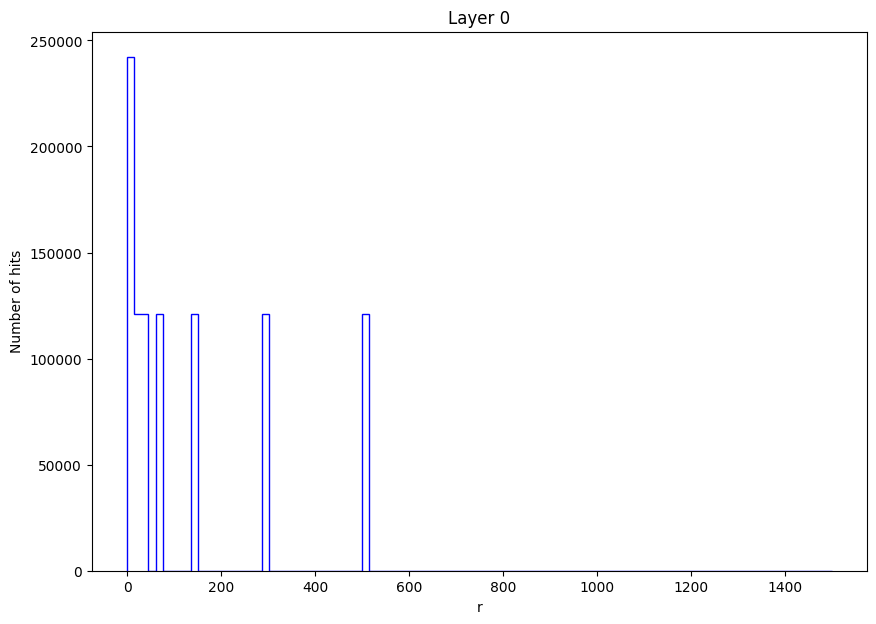

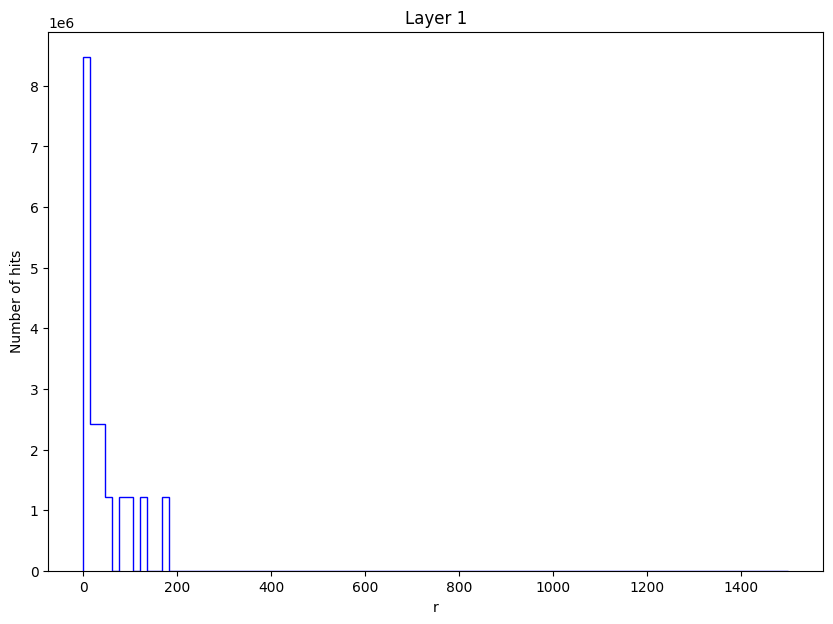

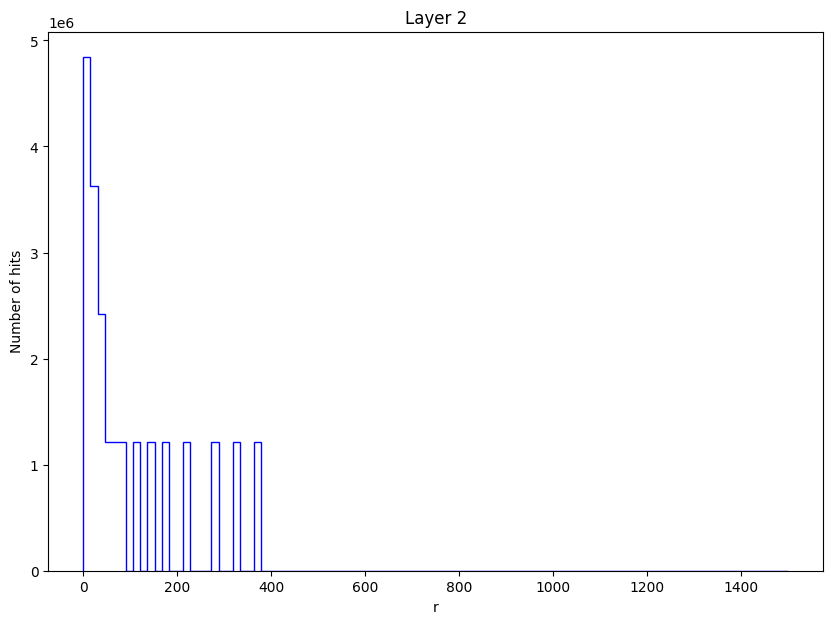

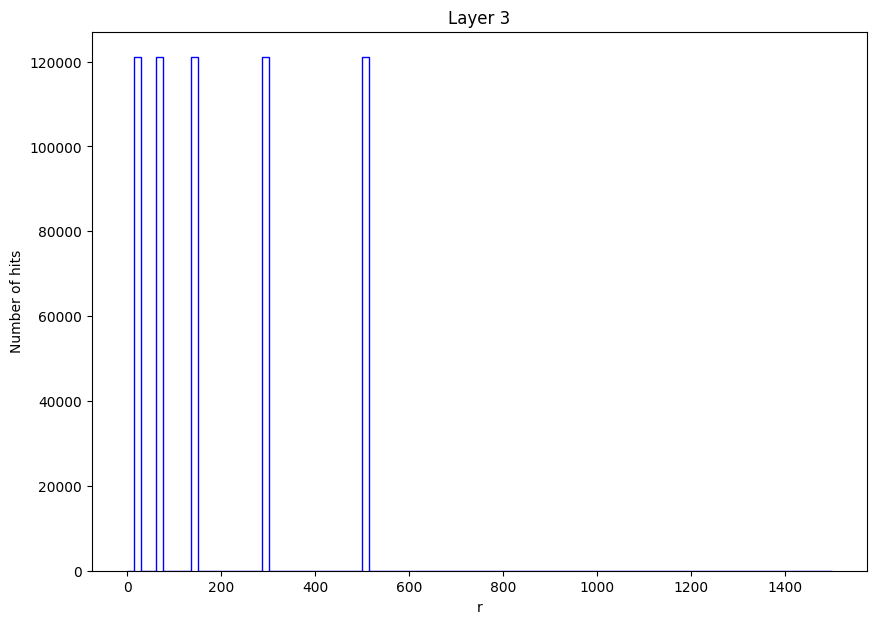

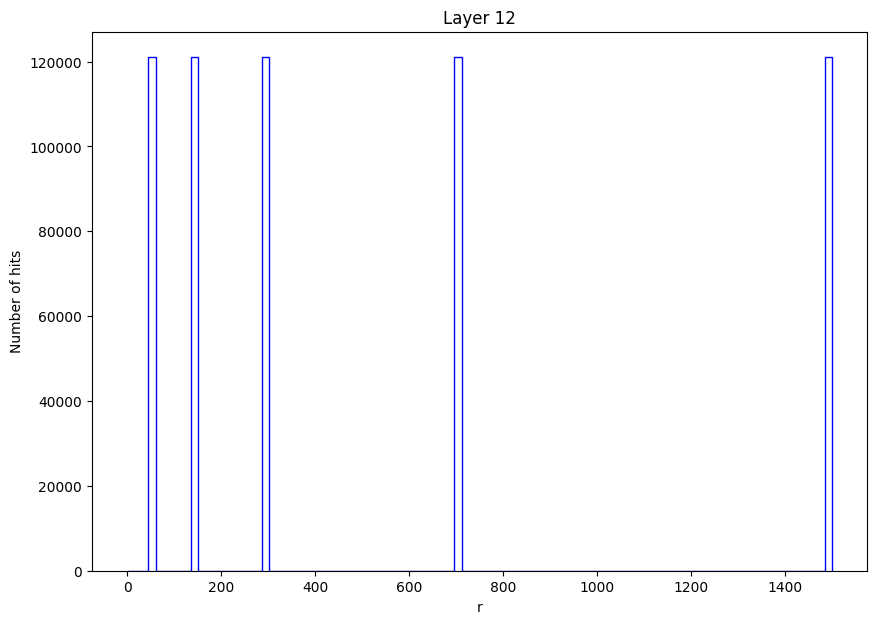

In [4]:
from evaluate_plotting_helper import plot_r_hits_per_layer
plot_r_hits_per_layer(data[:])

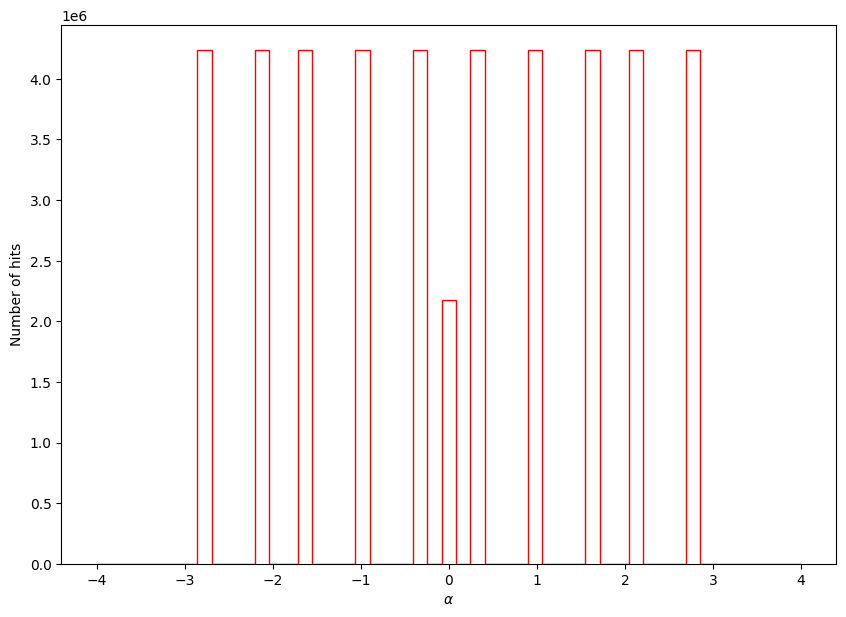

In [5]:
from evaluate_plotting_helper import plot_alpha_hits
plot_alpha_hits(data[:])

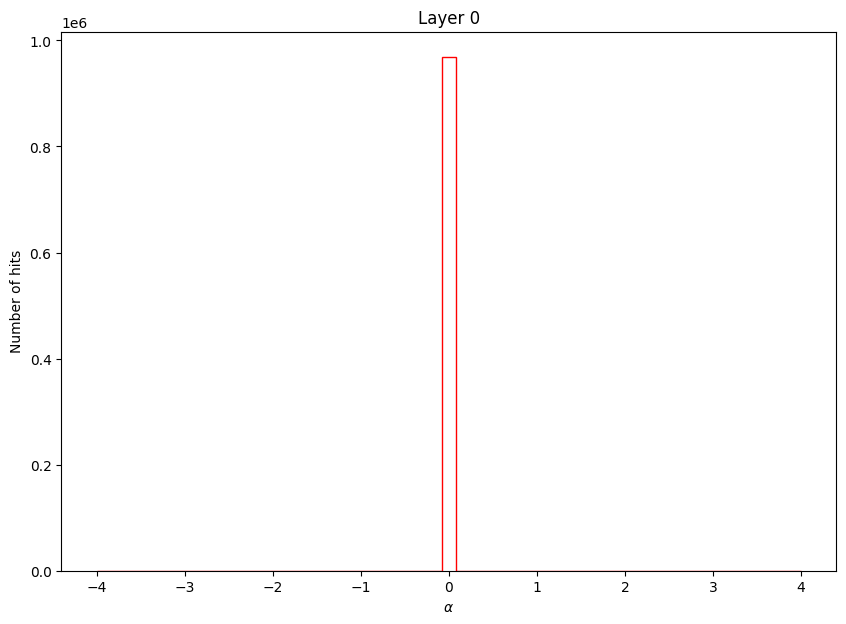

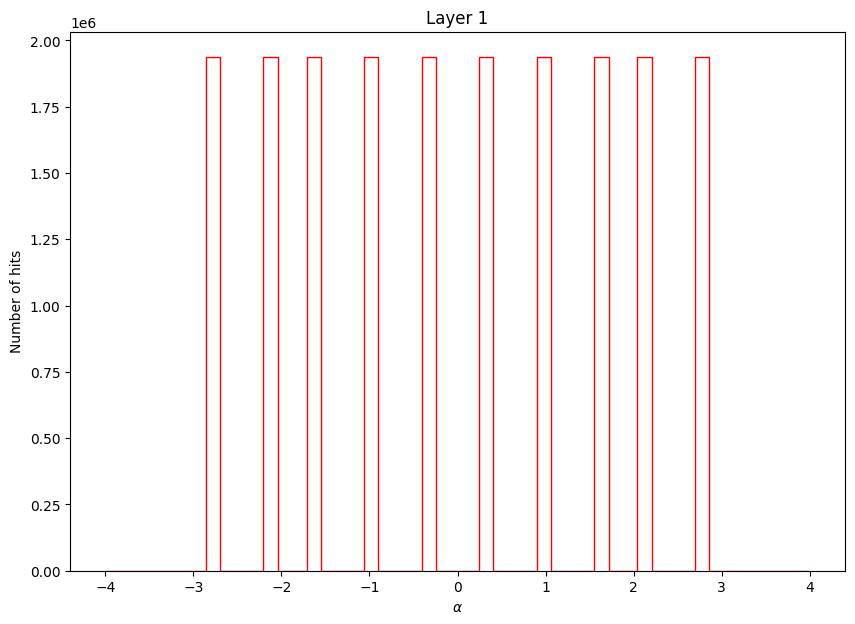

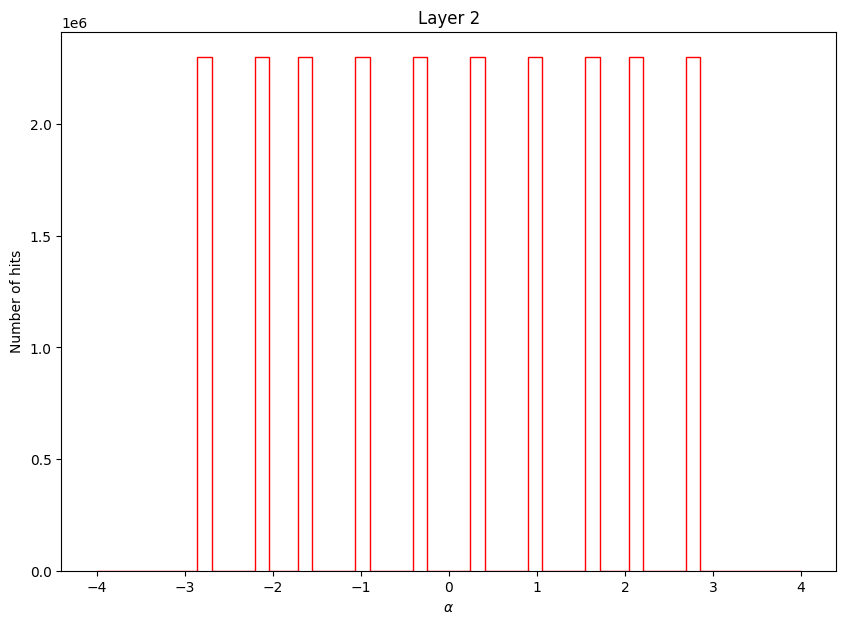

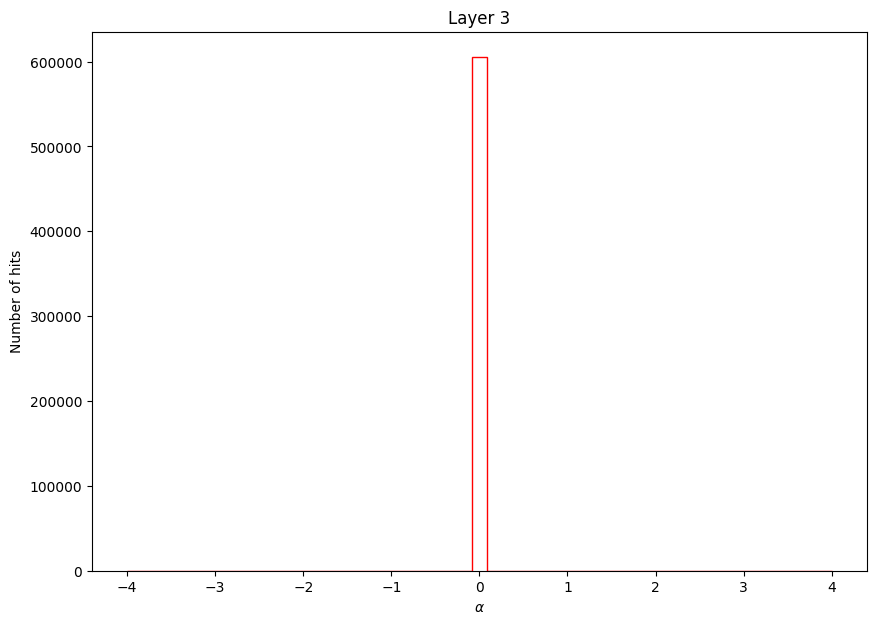

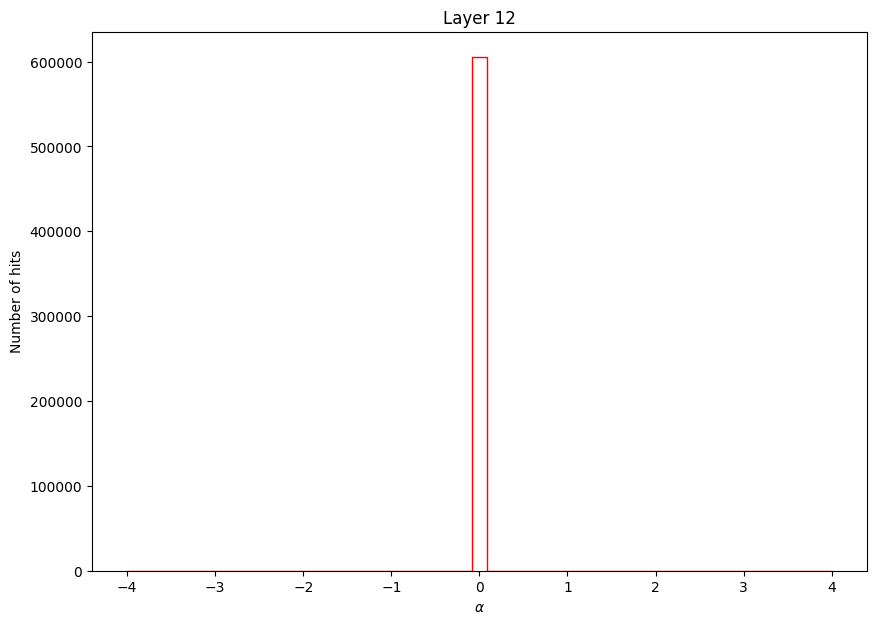

In [6]:
from evaluate_plotting_helper import plot_alpha_hits_per_layer
plot_alpha_hits_per_layer(data[:])

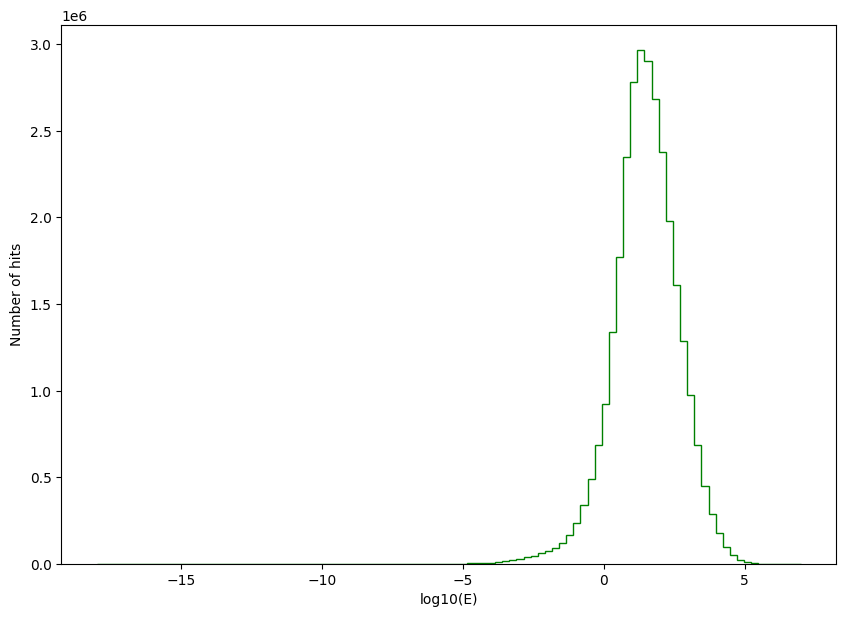

In [4]:
from evaluate_plotting_helper import plot_E_hits
plot_E_hits(data[:])

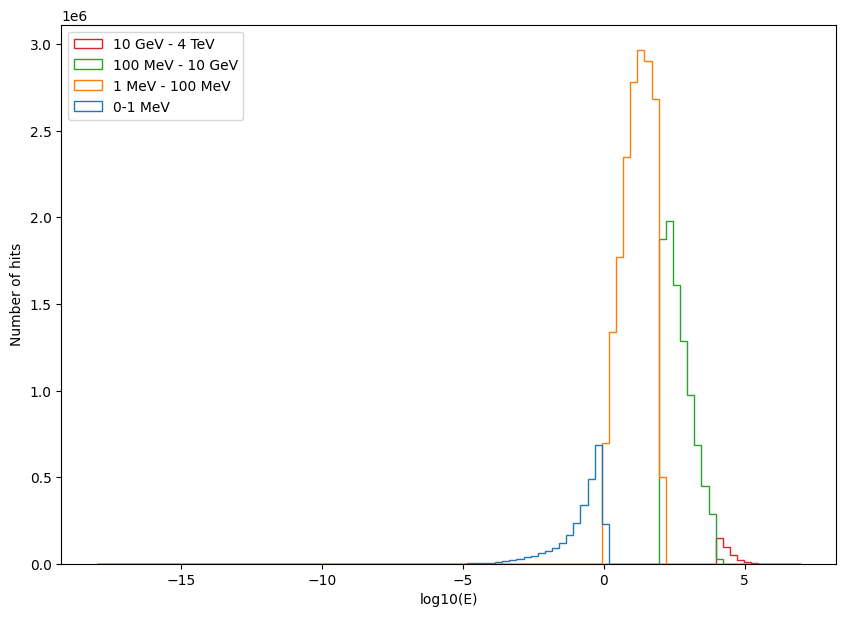

In [4]:
from evaluate_plotting_helper import plot_E_range_hits
plot_E_range_hits(data[:])

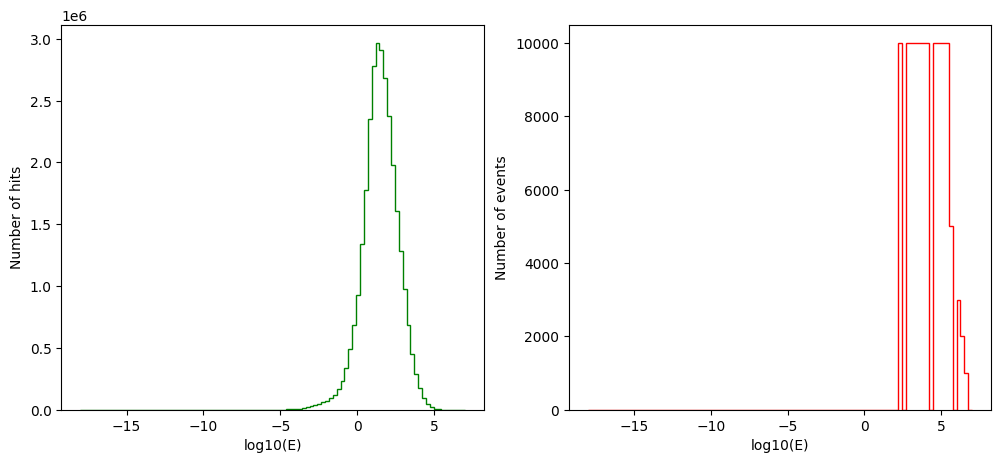

In [4]:
from evaluate_plotting_helper import plot_all_E_hits
data_inc = cl.photon_file['incident_energies']
plot_all_E_hits(data[:], data_inc[:])

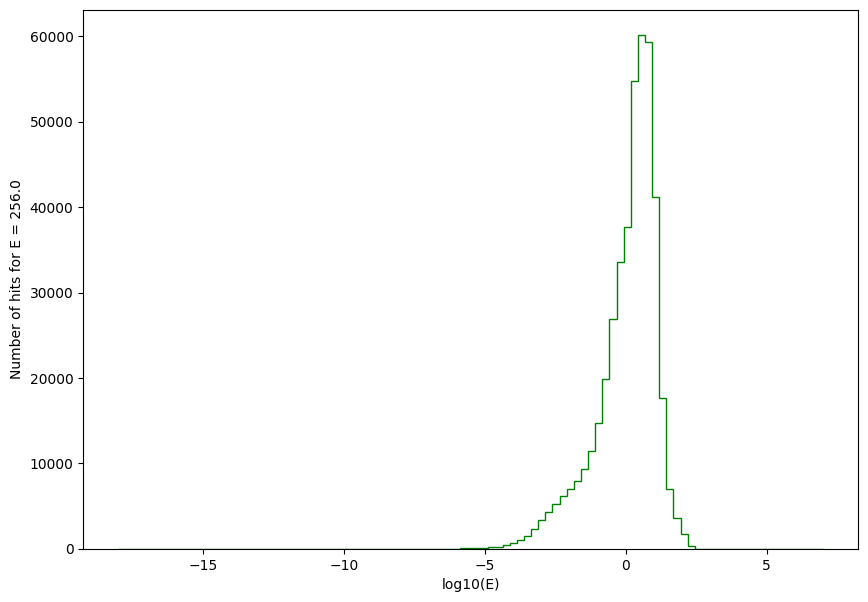

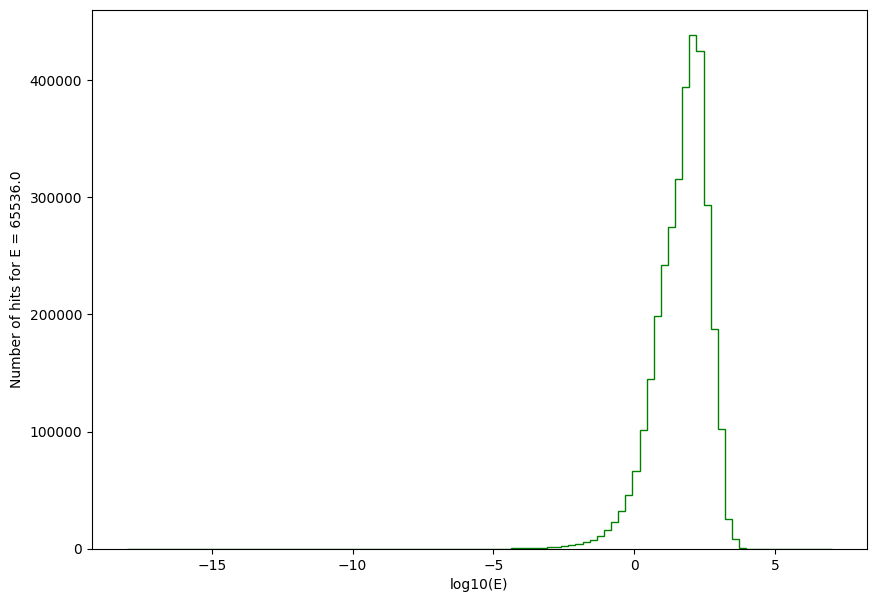

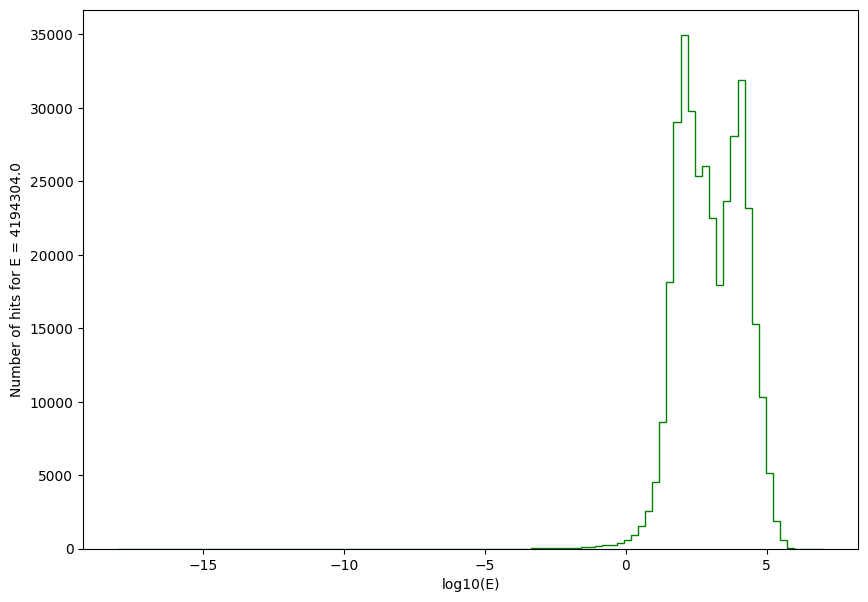

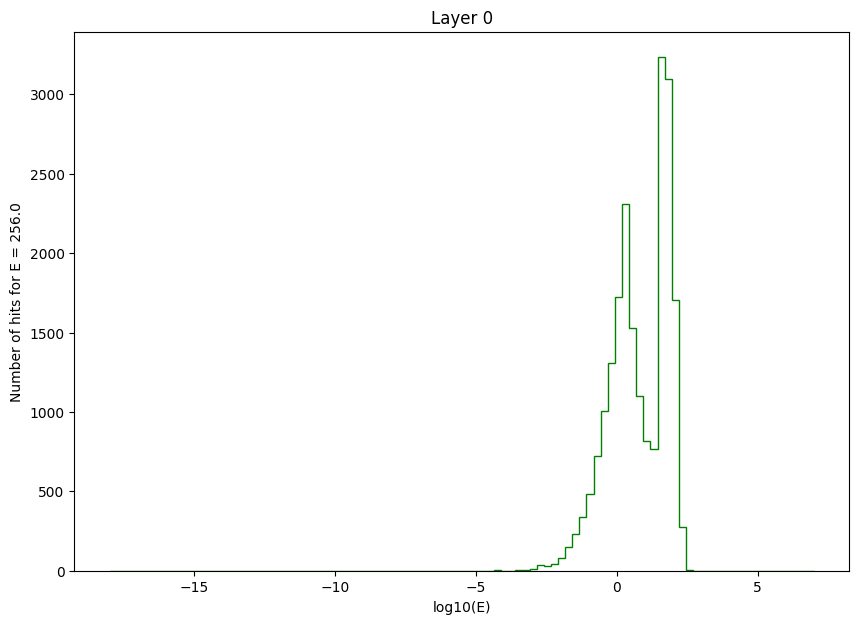

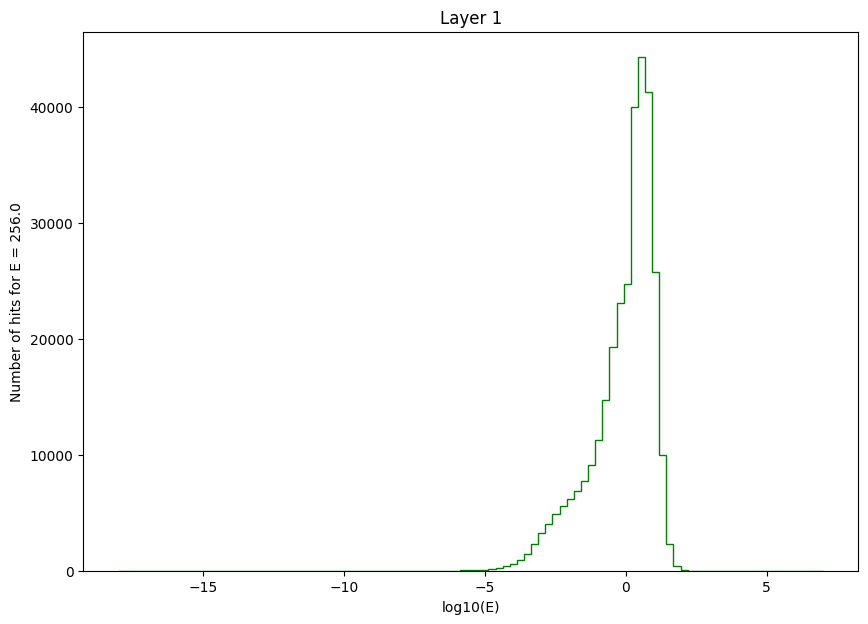

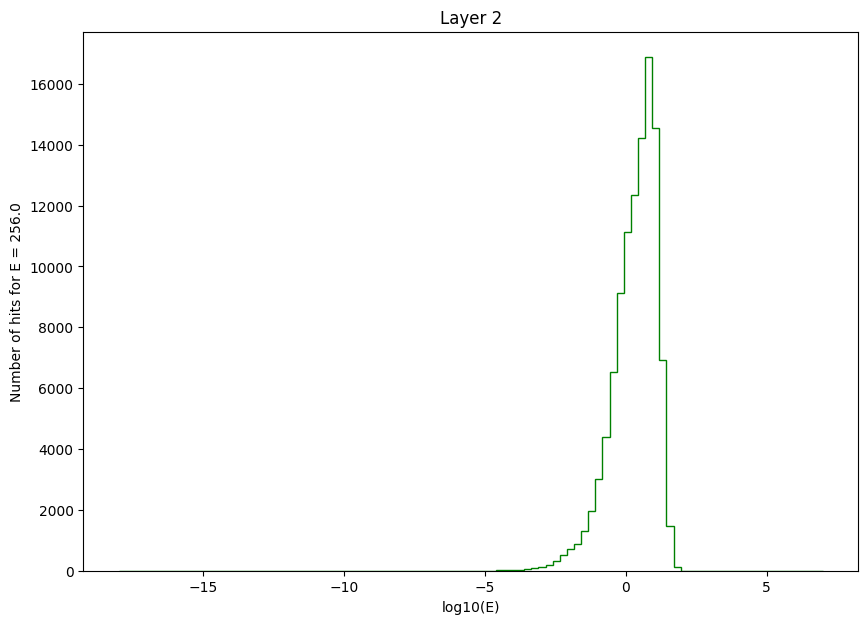

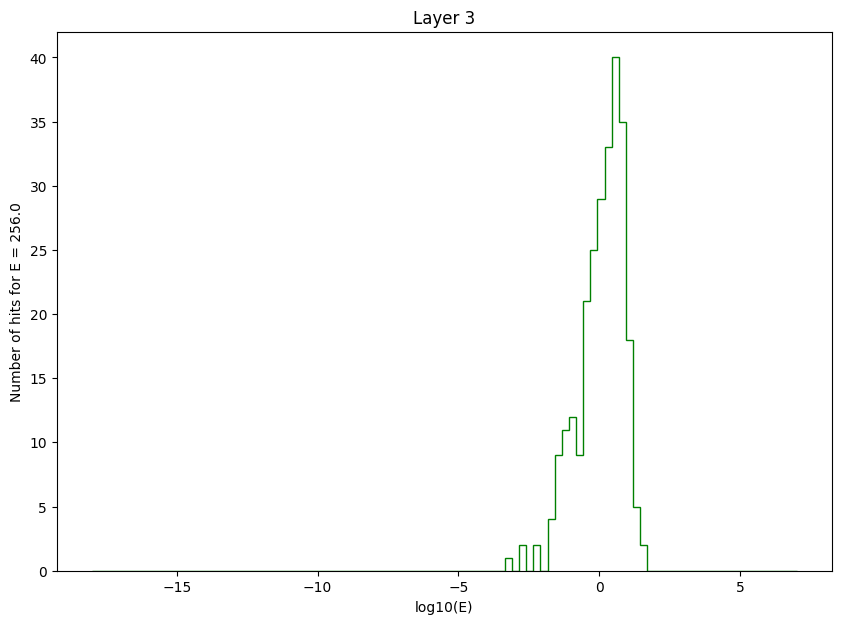

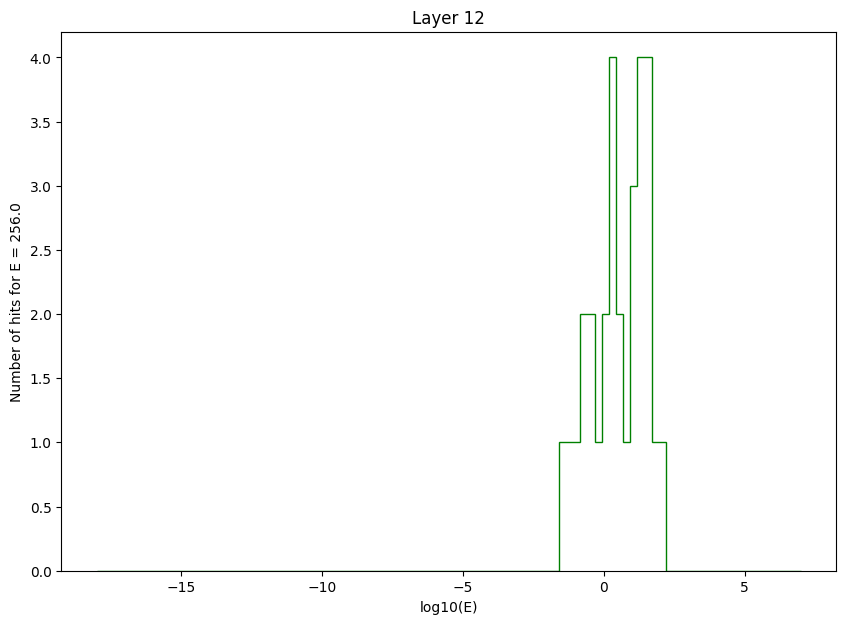

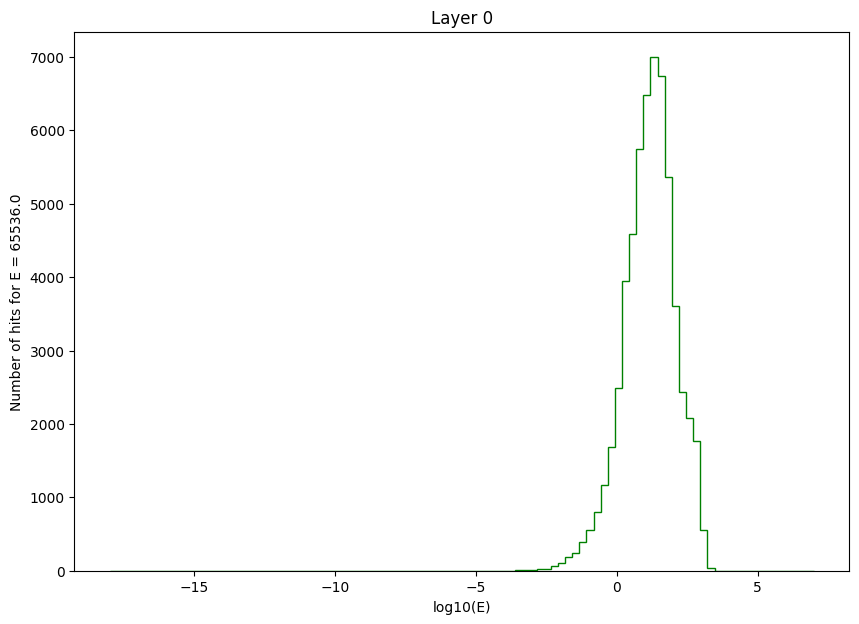

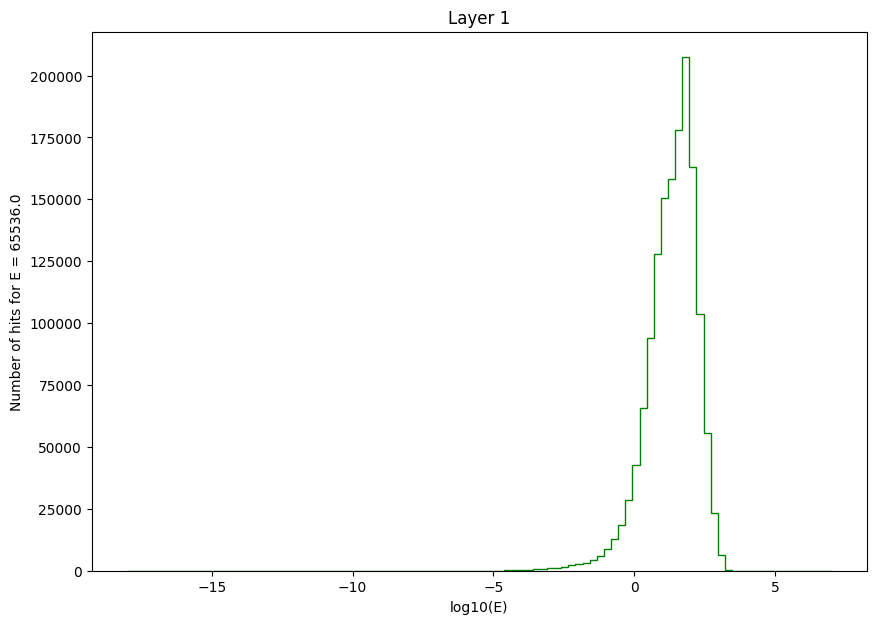

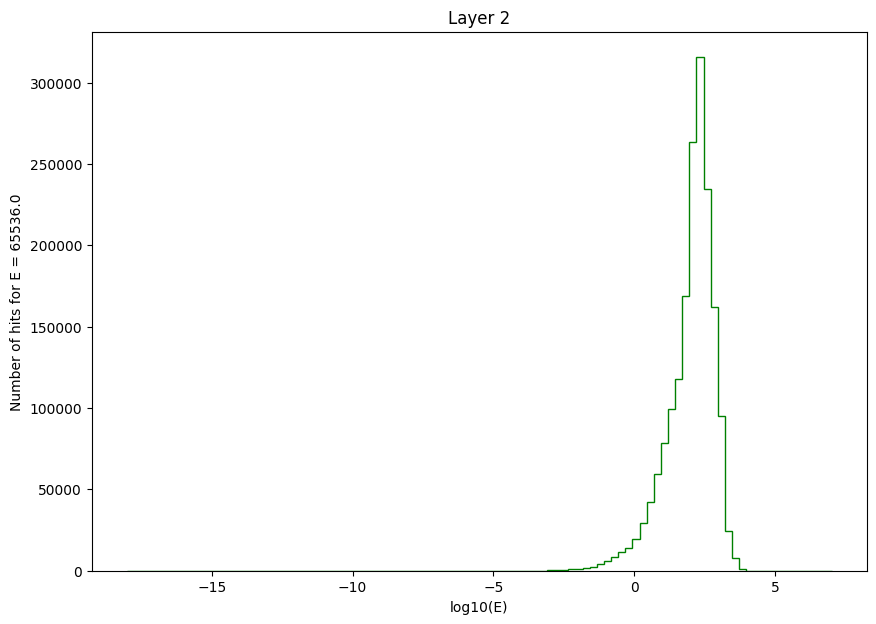

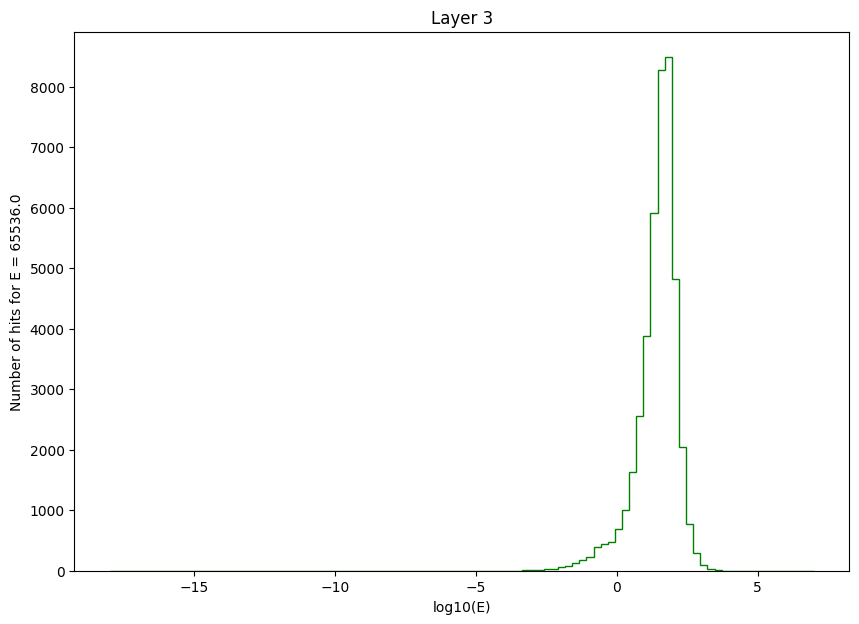

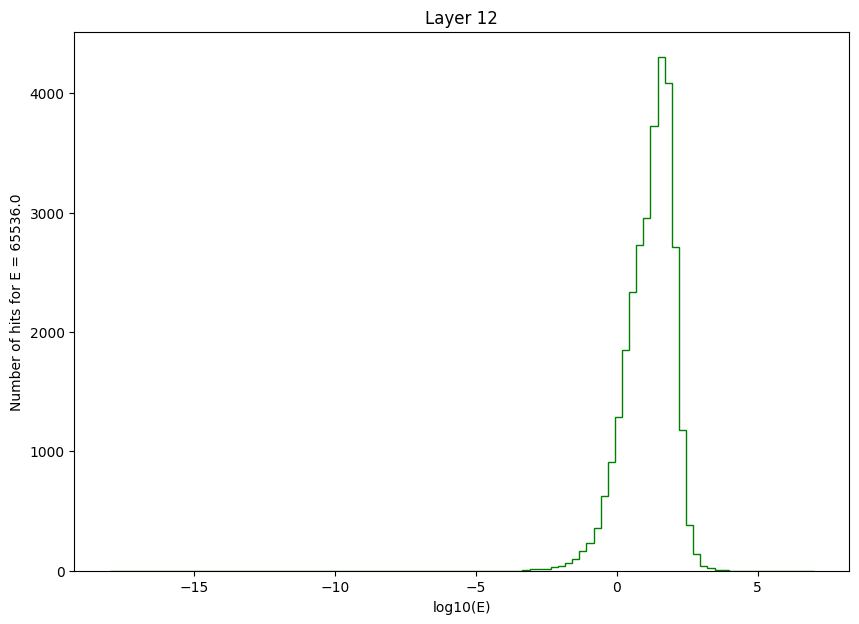

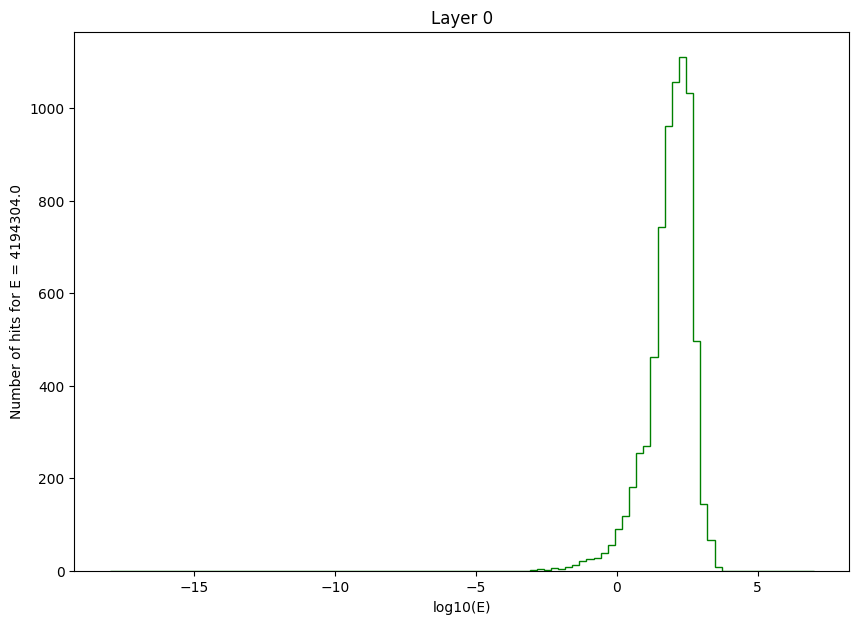

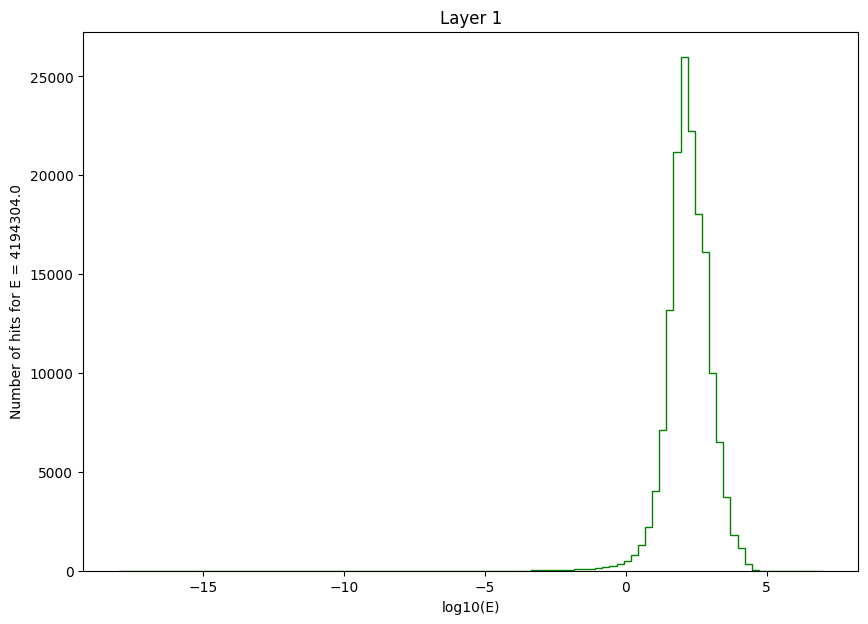

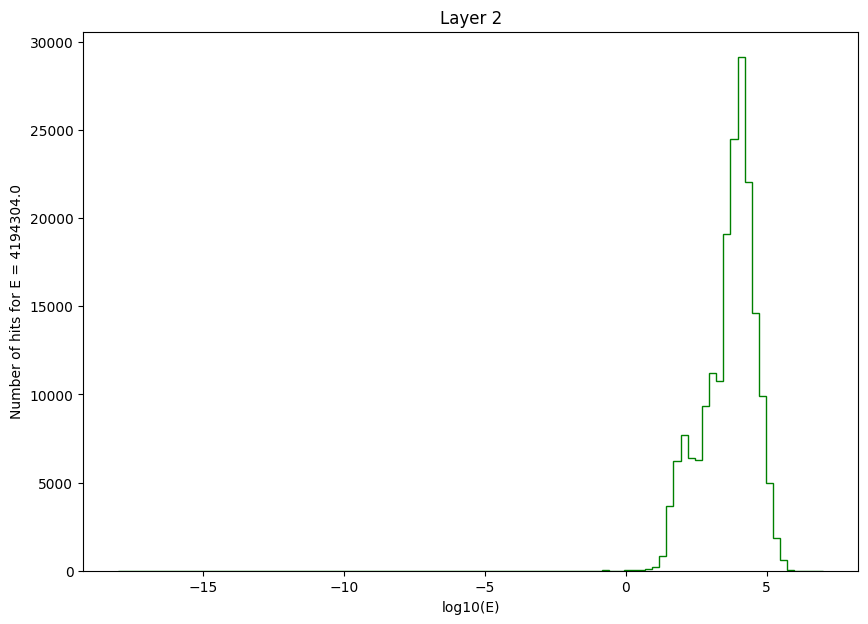

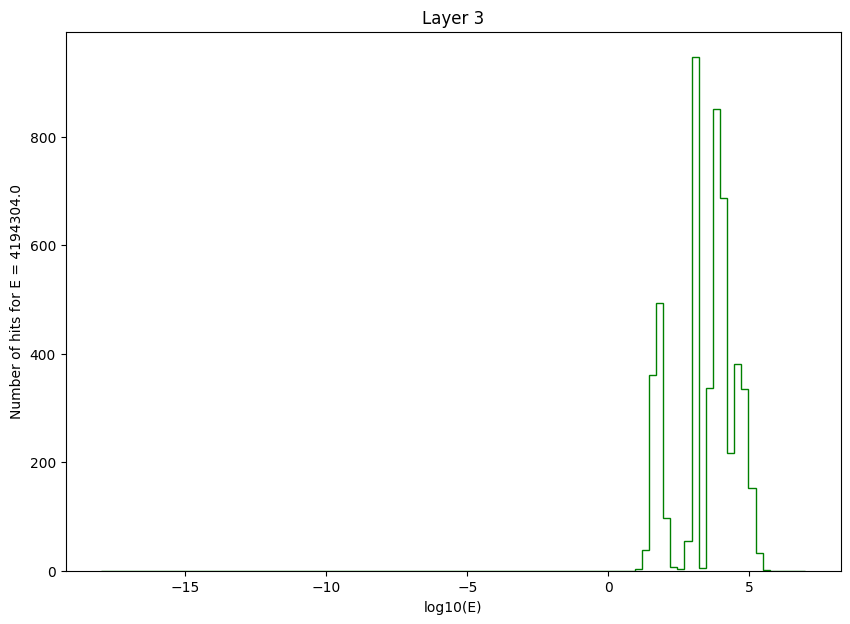

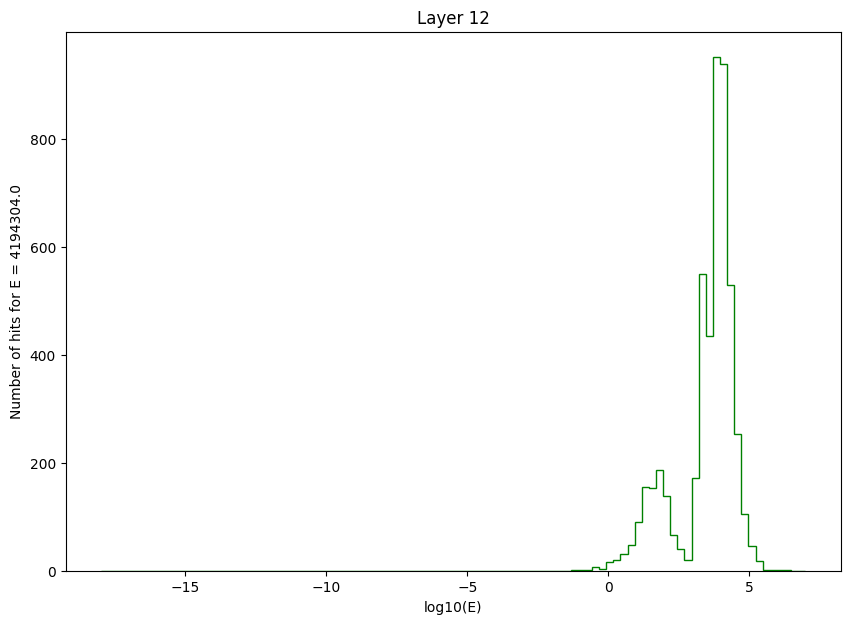

In [5]:
from evaluate_plotting_helper import plot_E_hits_for_Einc
data_inc = np.array(cl.photon_file['incident_energies'])
plot_E_hits_for_Einc(data, data_inc)

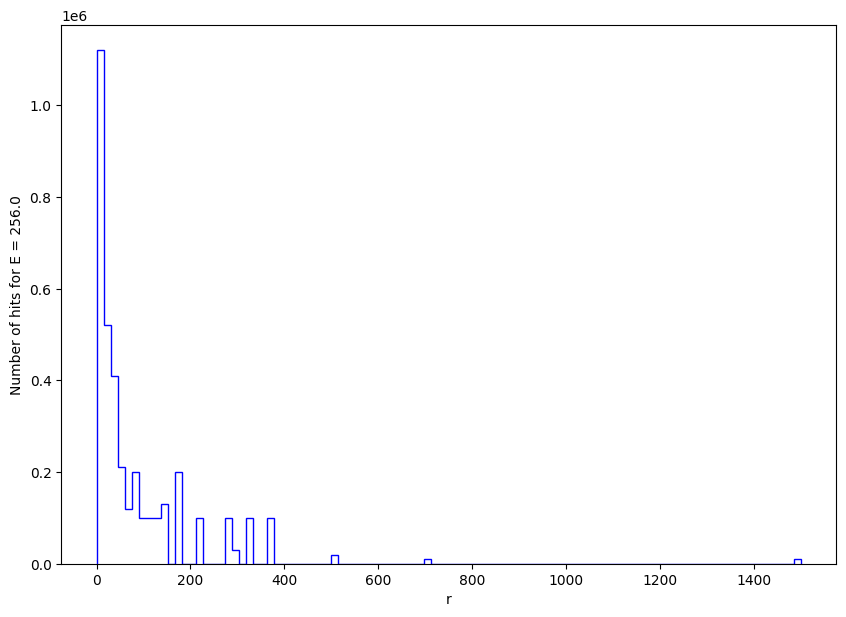

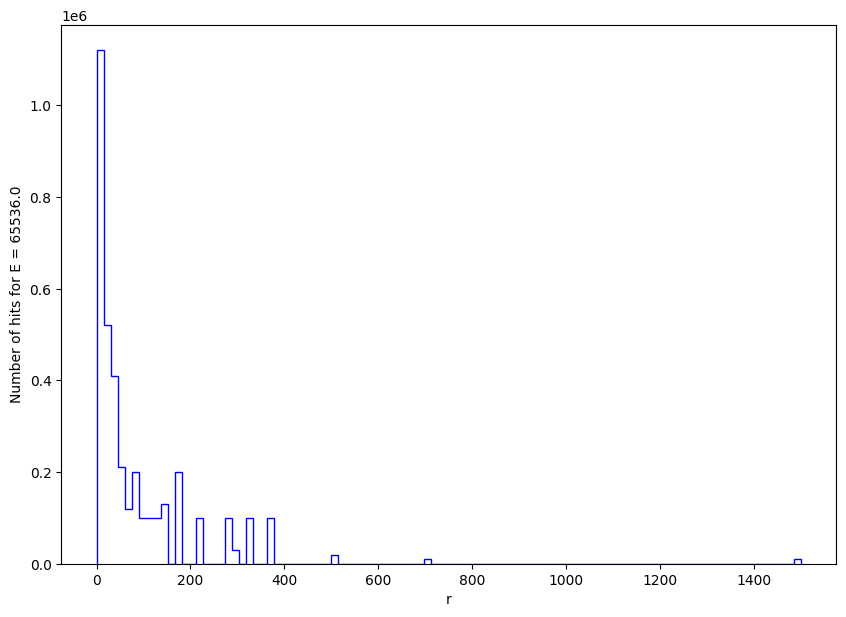

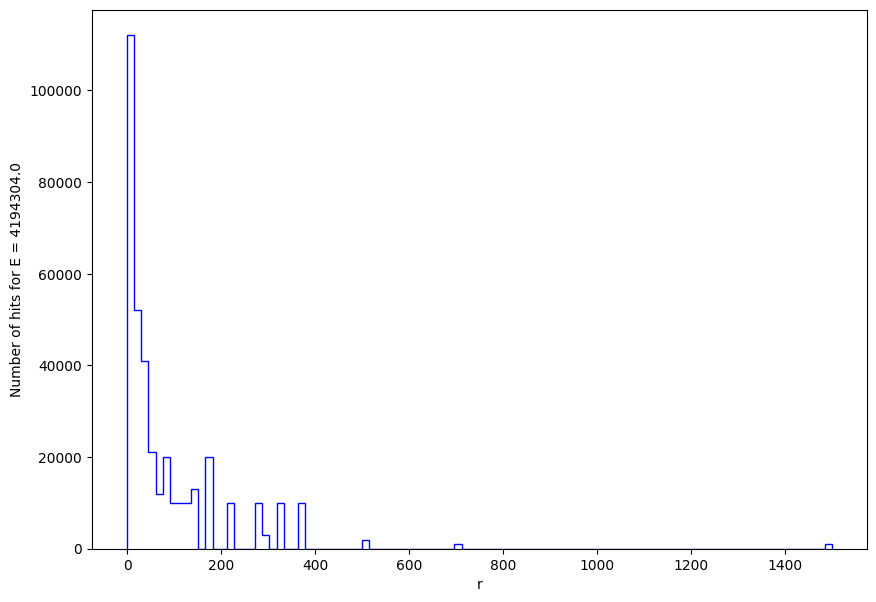

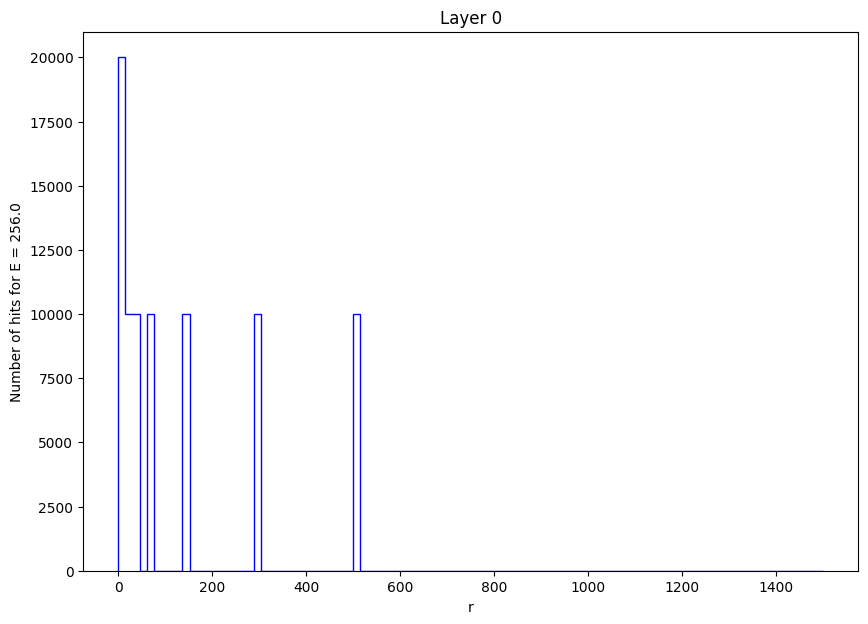

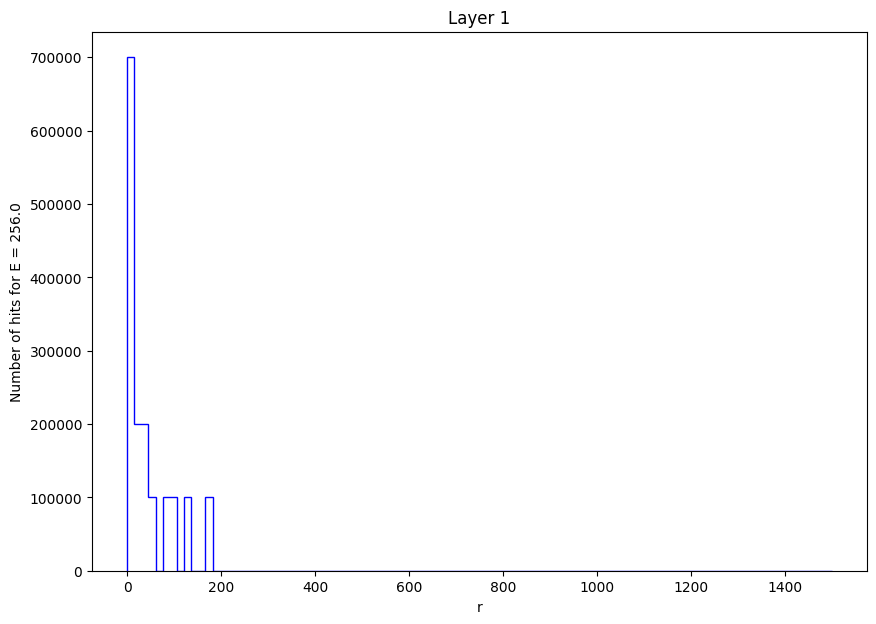

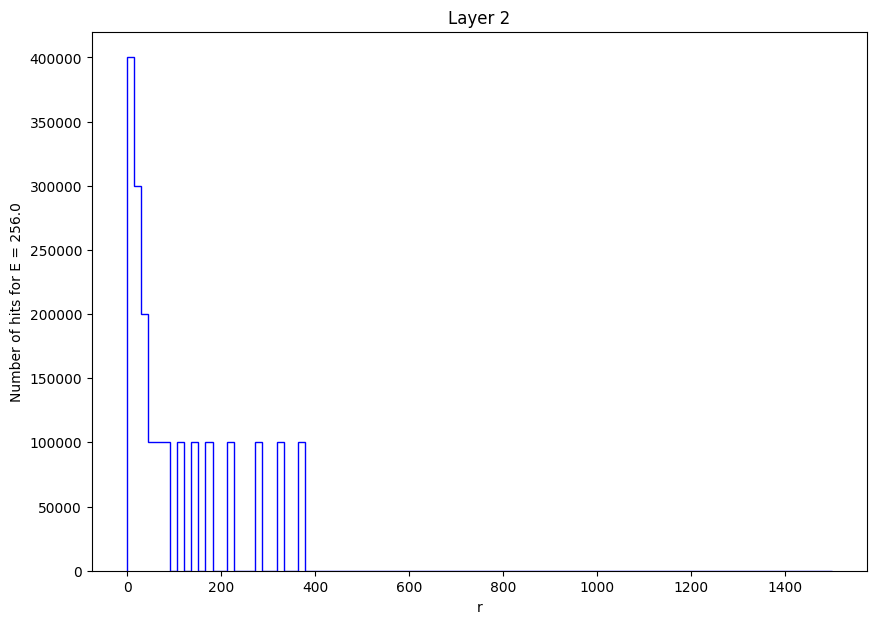

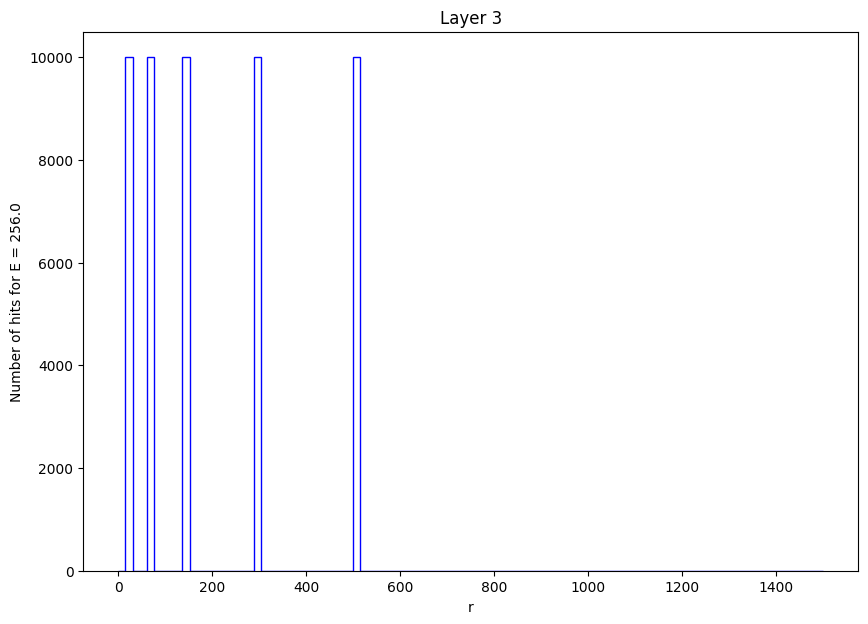

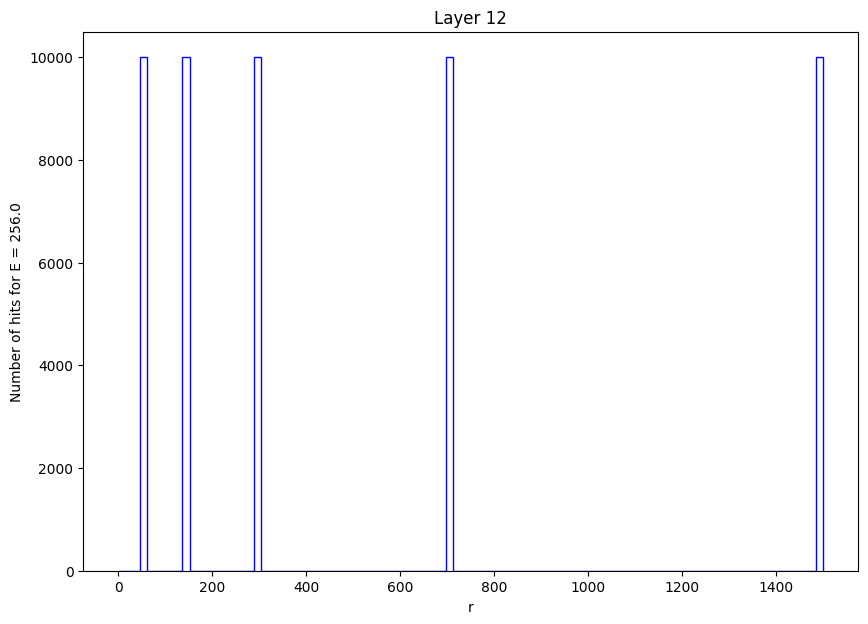

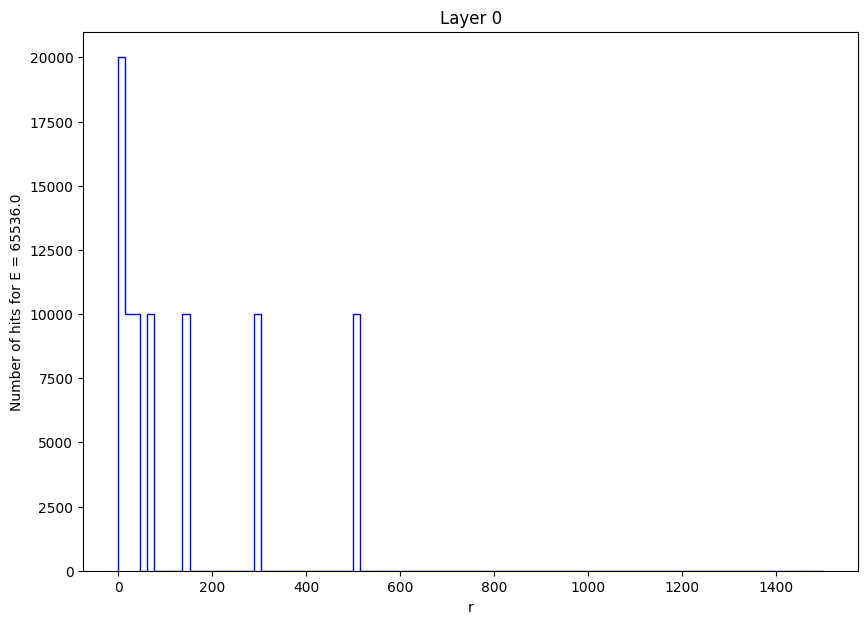

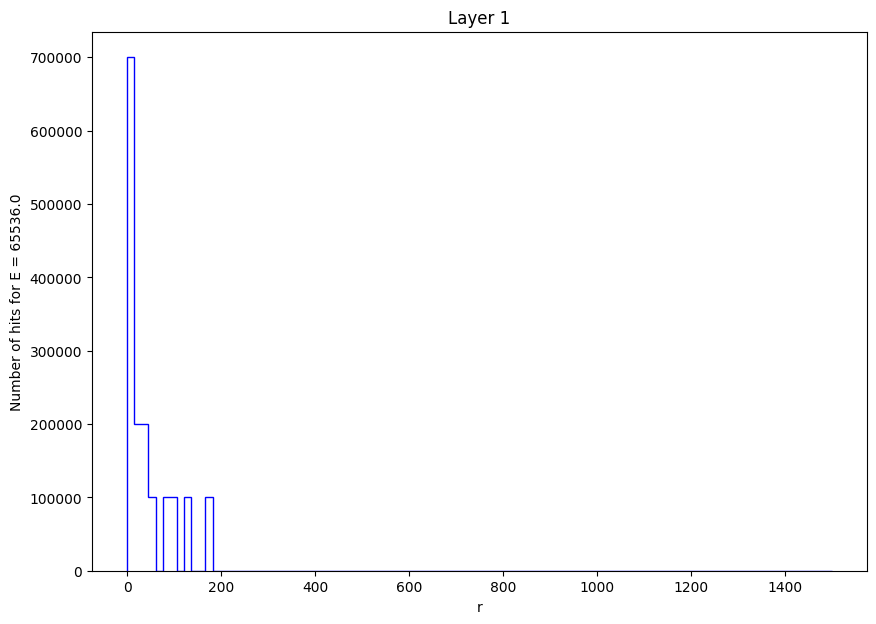

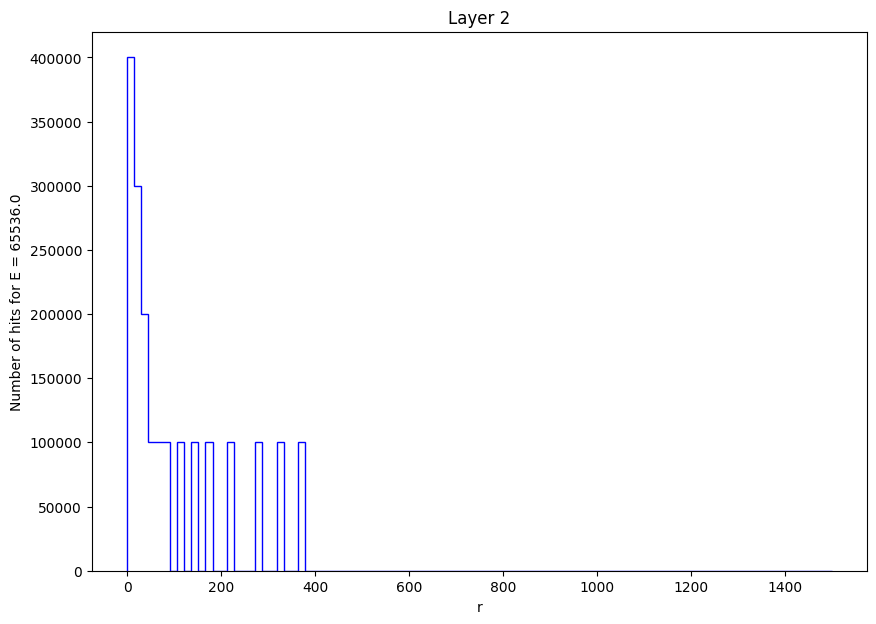

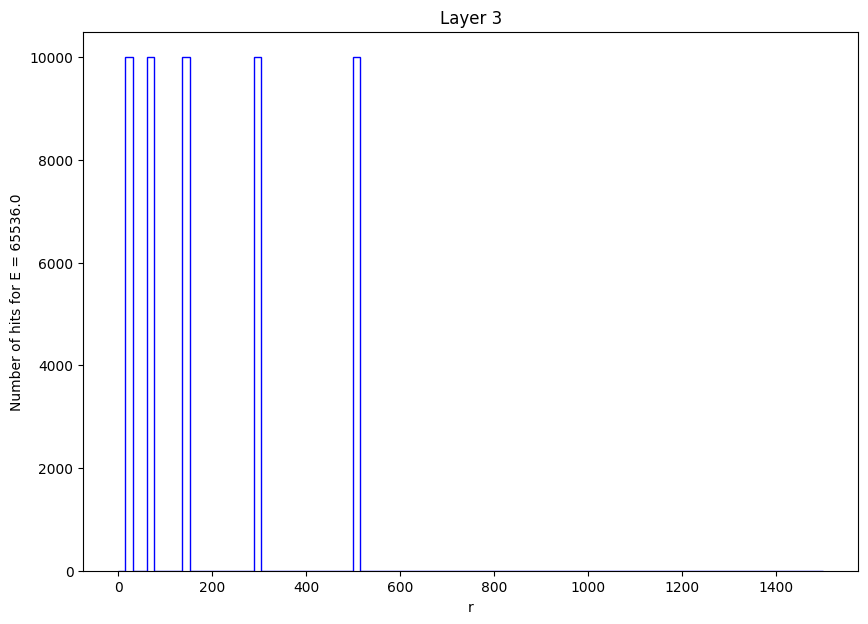

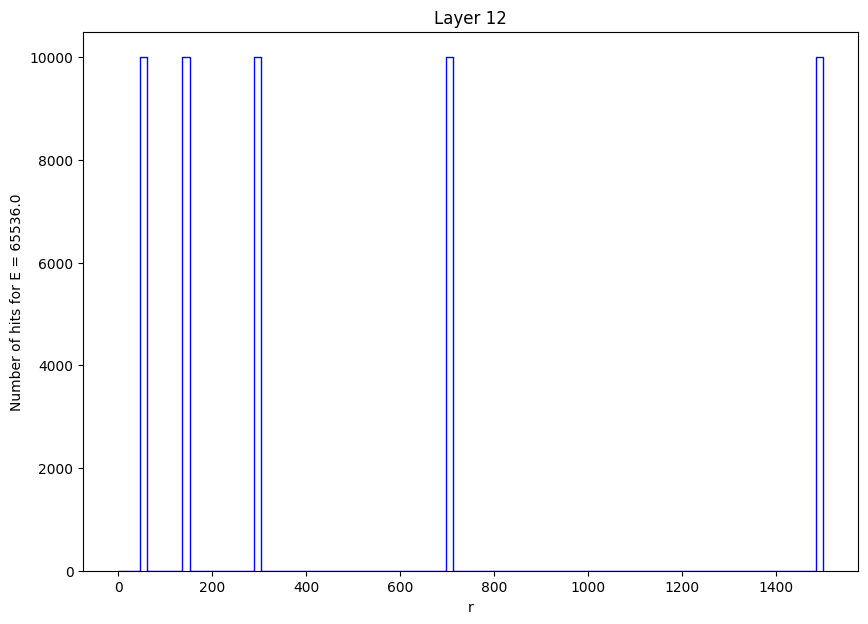

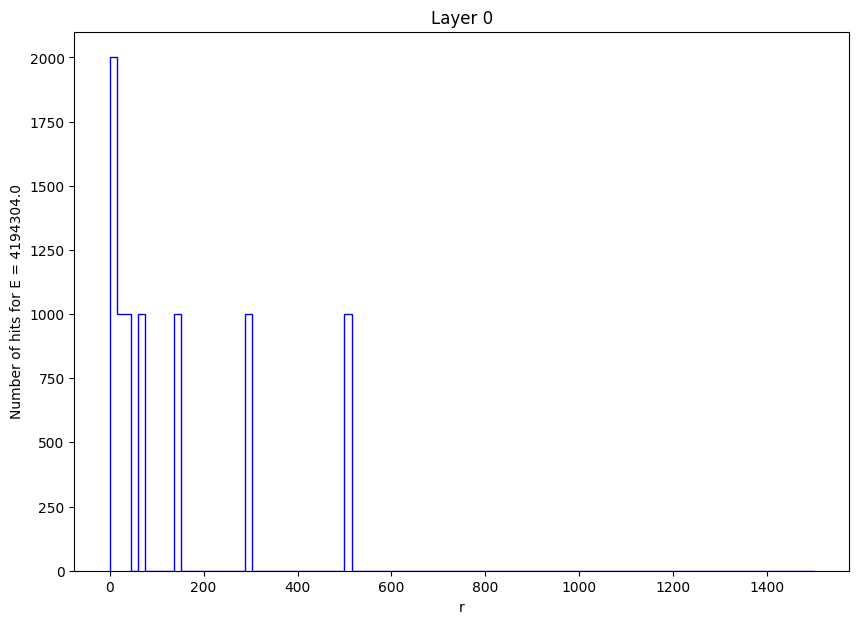

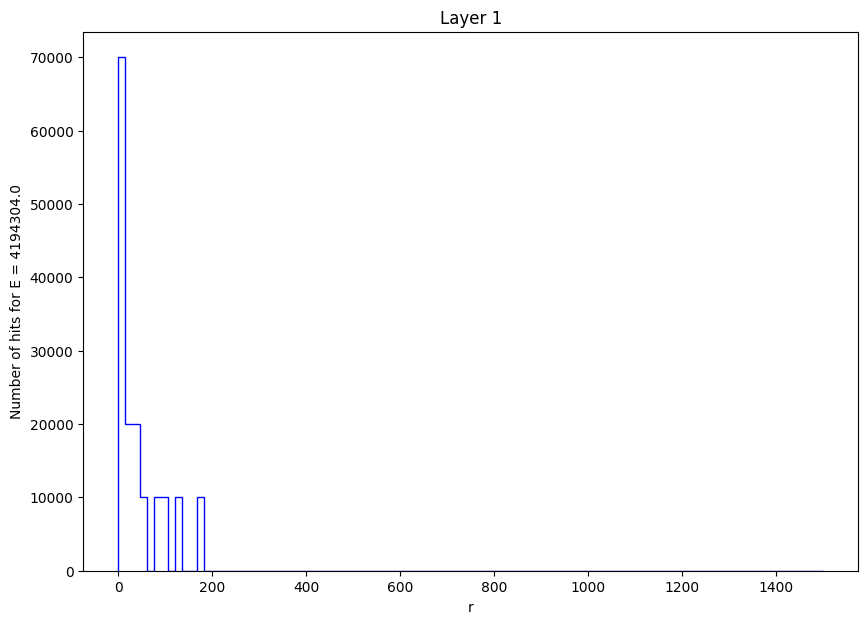

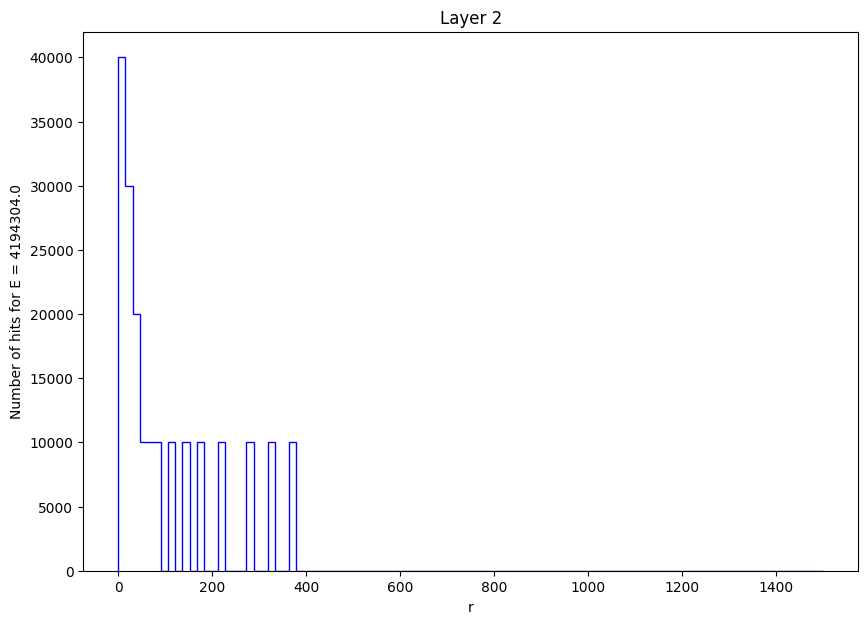

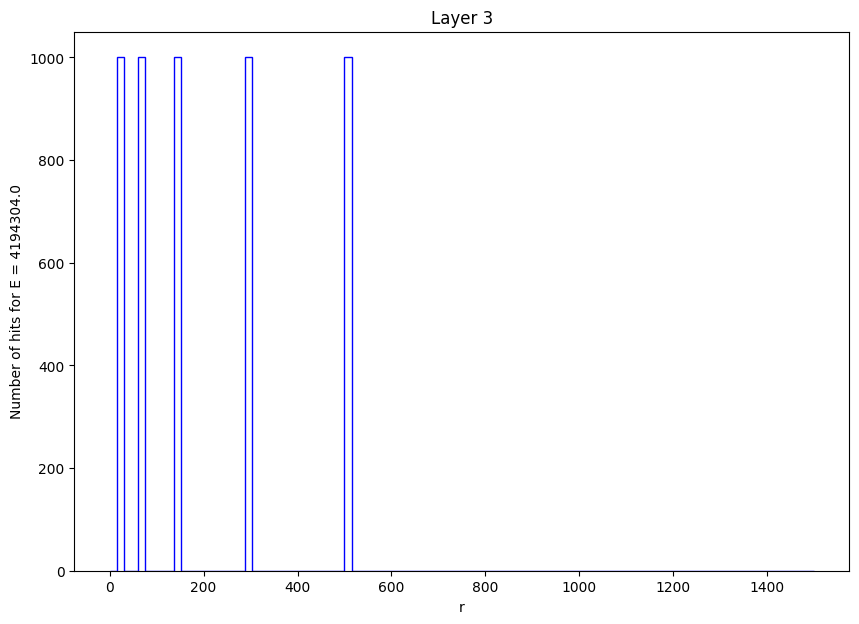

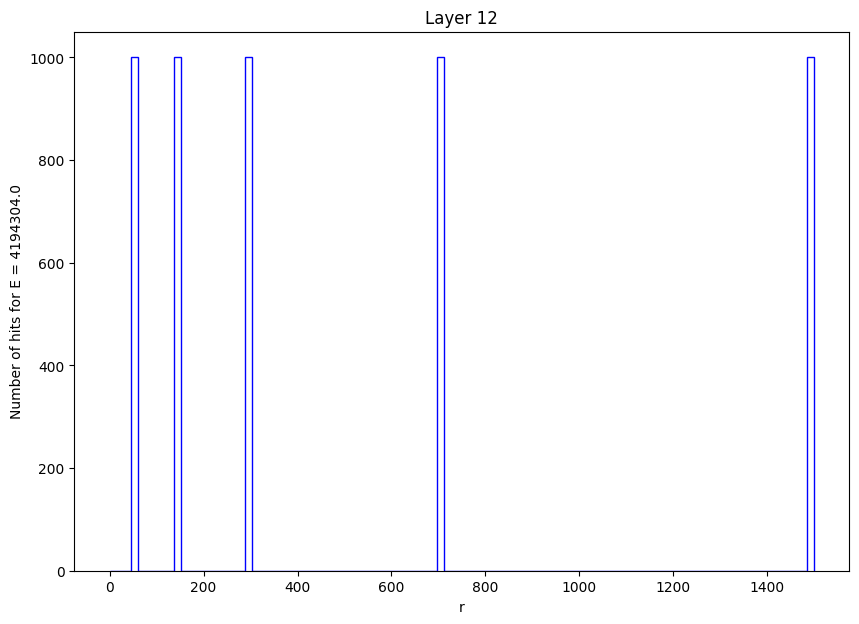

In [6]:
from evaluate_plotting_helper import plot_r_hits_for_Einc
data_inc = np.array(cl.photon_file['incident_energies'])
plot_r_hits_for_Einc(data, data_inc)

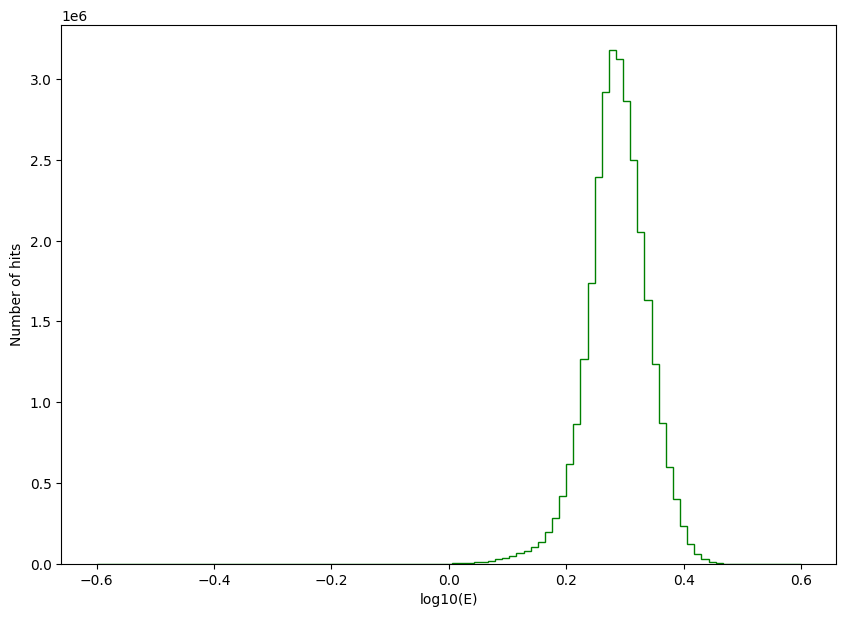

In [6]:
data = cl.photon_data.numpy()
E_hist = data[:,3]
_, ax = plt.subplots(figsize =(10, 7))
#ax.set_xscale('log', base = 10)
ax.hist(E_hist, bins = np.linspace(-0.6,0.6, num=100), density=False, histtype='step', color = 'g')
ax.set_xlabel('log10(E)')
ax.set_ylabel('Number of hits')
plt.show()

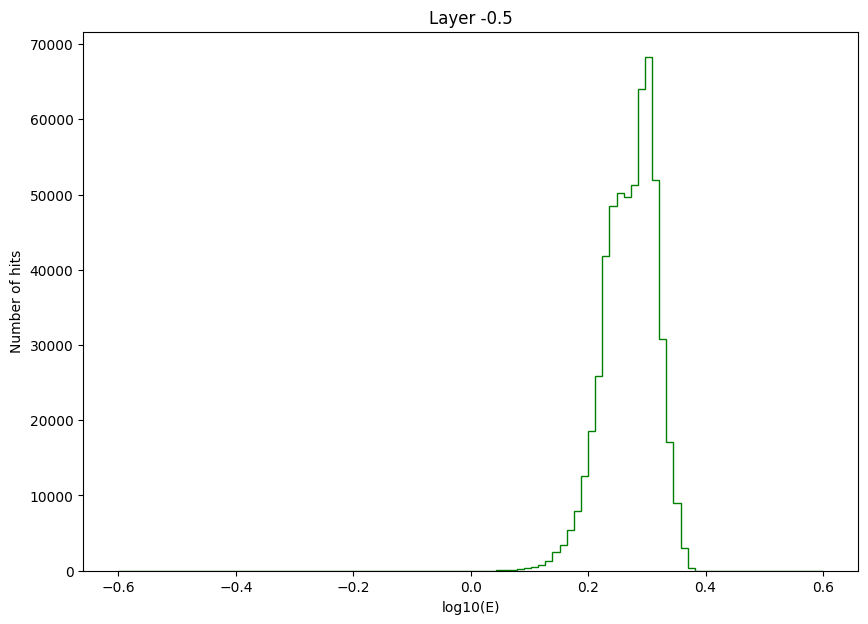

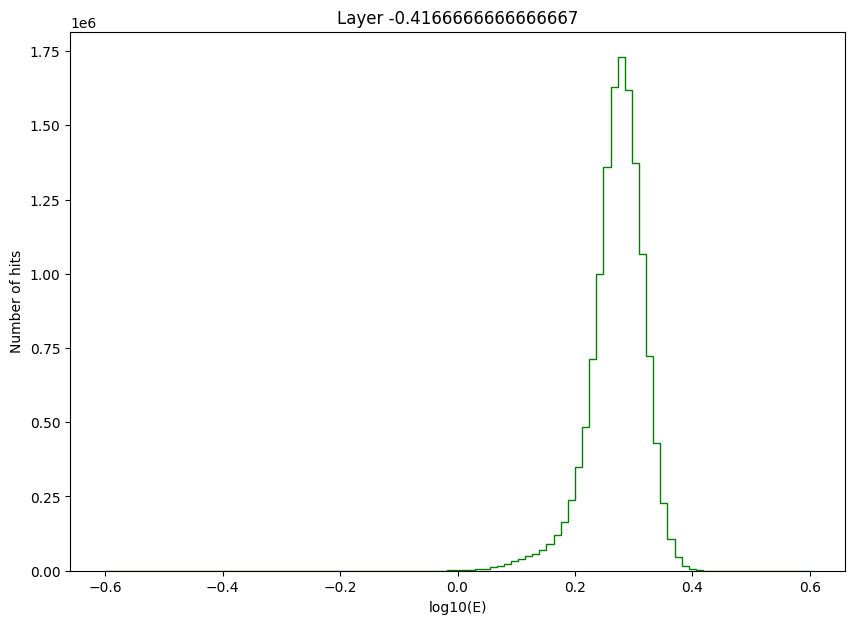

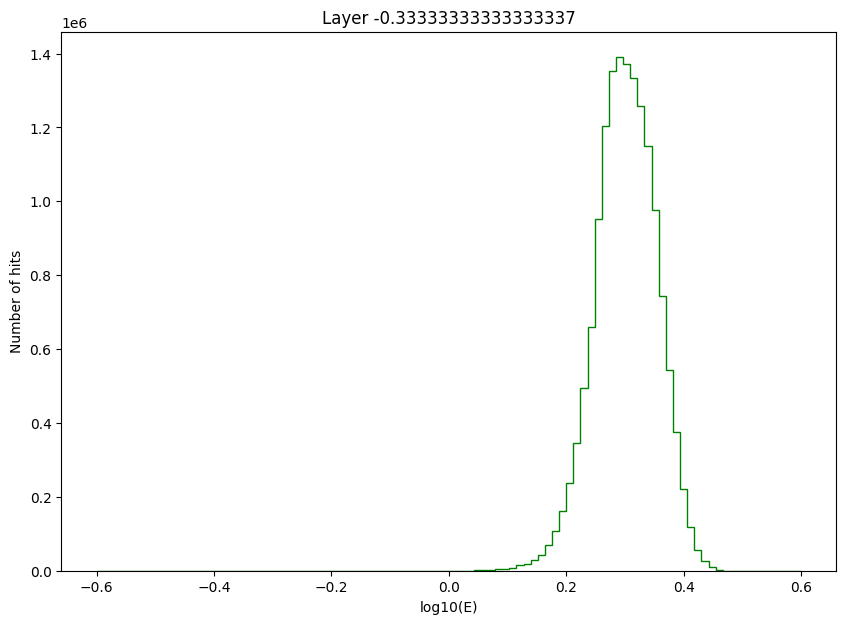

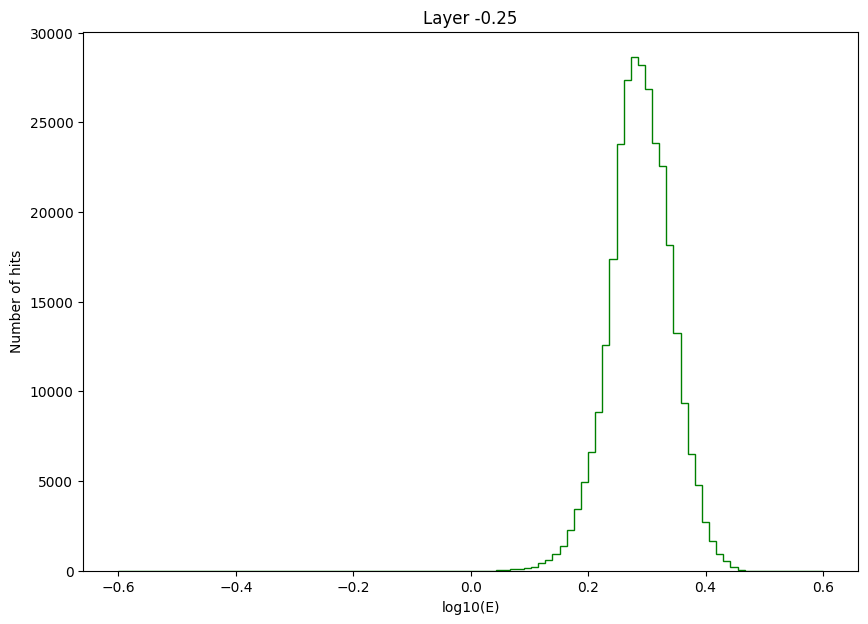

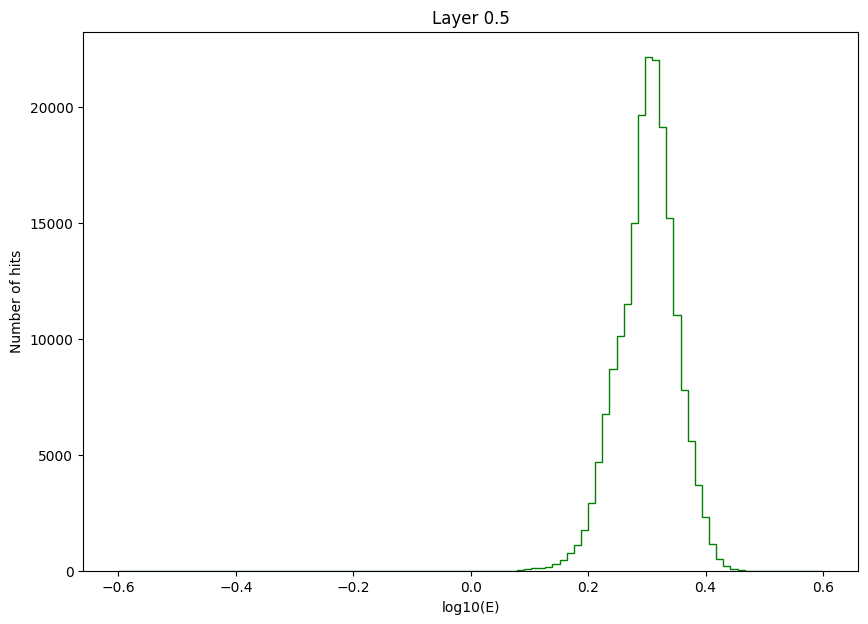

In [9]:
layers = set(data[:,0])
for layer in sorted(list(layers)):
    E_hist = data[data[:,0] == layer][:,3]
    _, ax = plt.subplots(figsize =(10, 7))
    #ax.set_xscale('log', base = 10)
    ax.hist(E_hist, bins = np.linspace(-0.6,0.6, num=100), density=False, histtype='step', color = 'g')
    ax.set_xlabel('log10(E)')
    ax.set_ylabel('Number of hits')
    ax.set_title(r'Layer {}'.format(layer))
    plt.show()

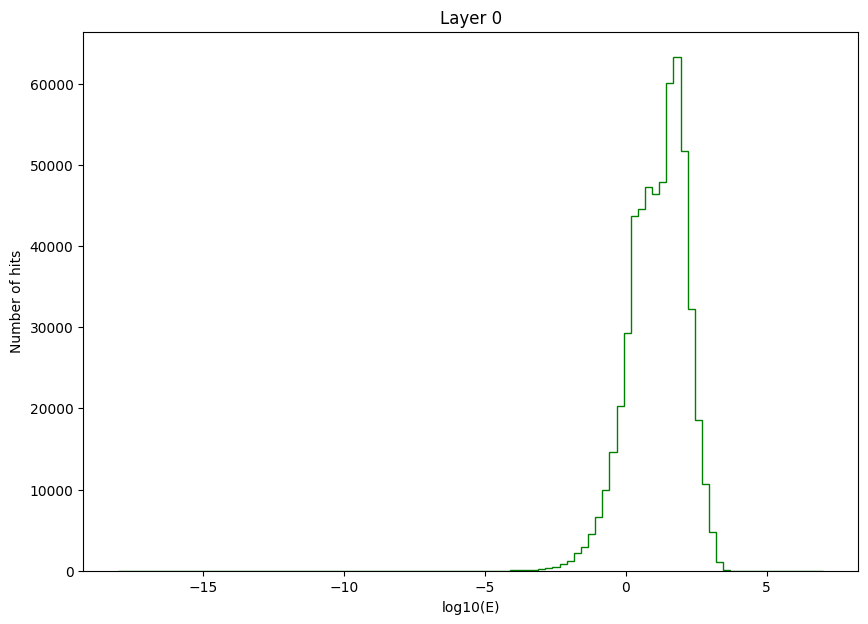

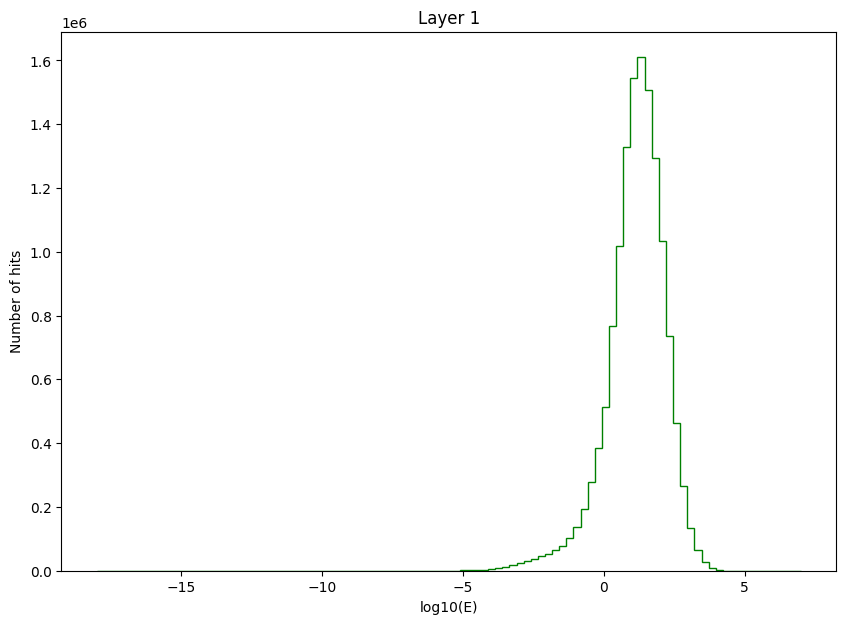

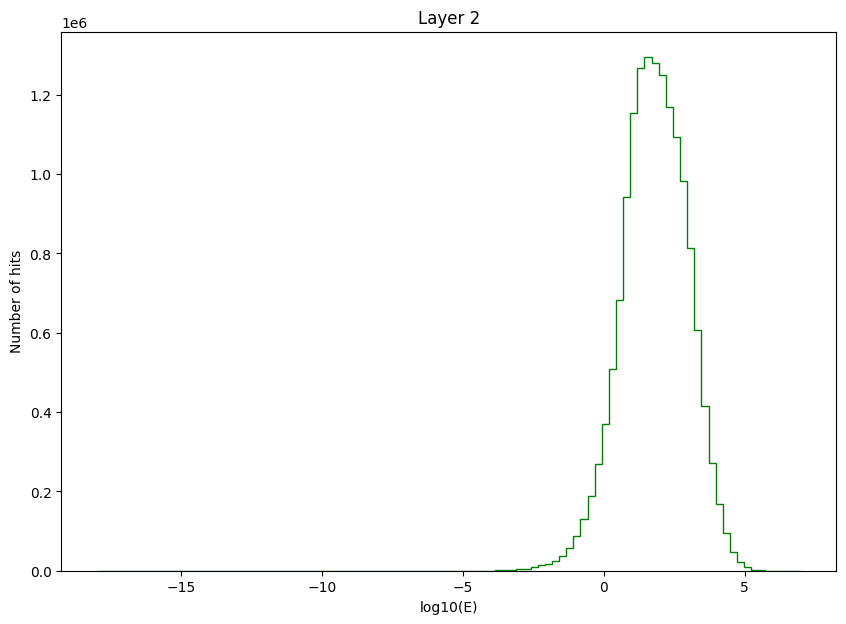

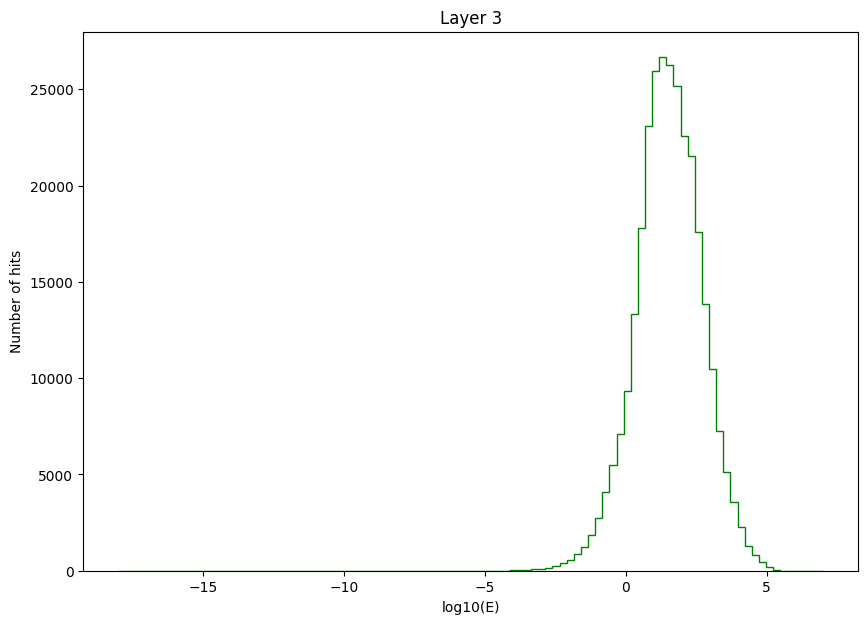

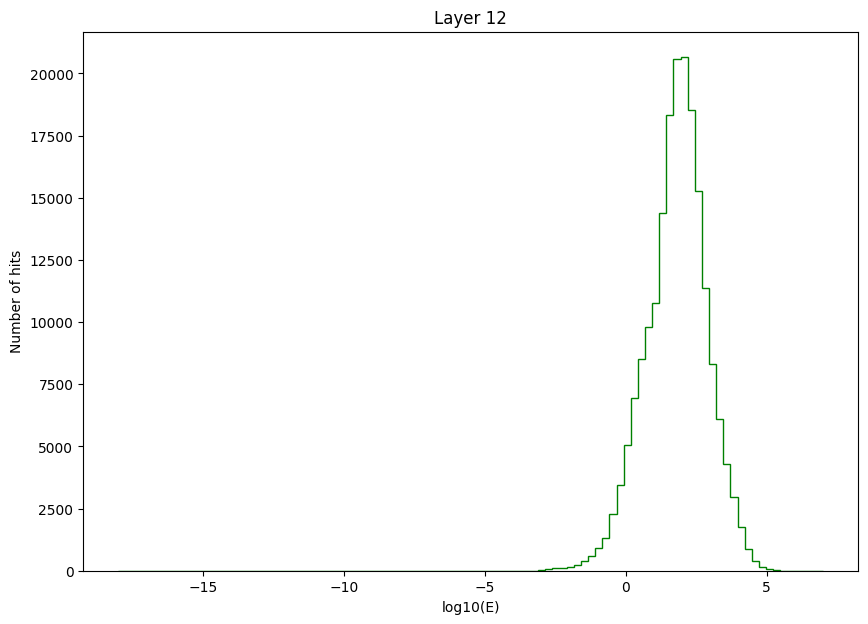

In [5]:
from evaluate_plotting_helper import plot_E_hits_per_layer
plot_E_hits_per_layer(data[:])

In [3]:
input_data = cl.photon_data.numpy()
data = input_data[:]

In [4]:
layers = set(data[0,:,0])
data = data.reshape(-1, 4)

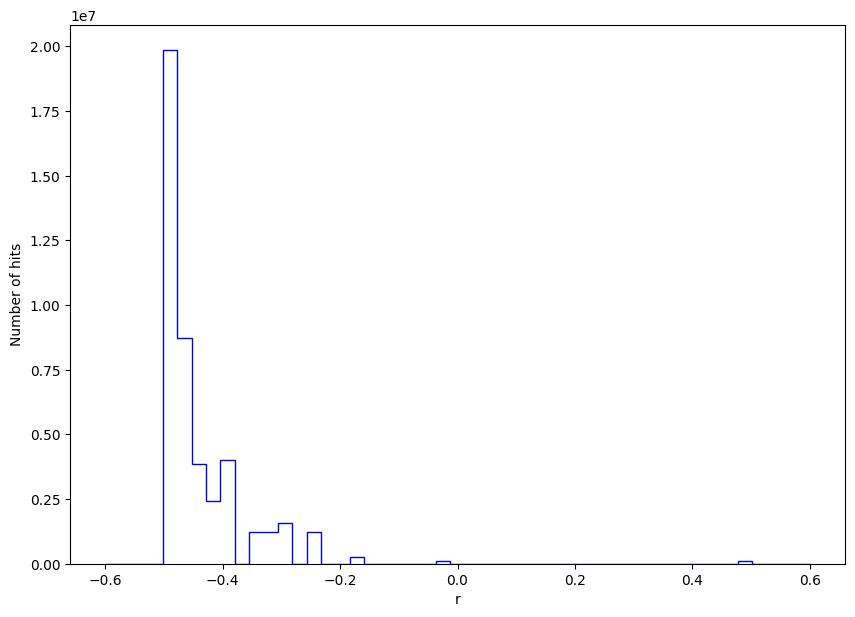

In [11]:
r_hist = data[:,2]
_, ax = plt.subplots(figsize =(10, 7))
ax.hist(r_hist, bins = np.linspace(-0.6,0.6), density=False, histtype='step', color = 'b')
ax.set_xlabel('r')
ax.set_ylabel('Number of hits')
plt.show()

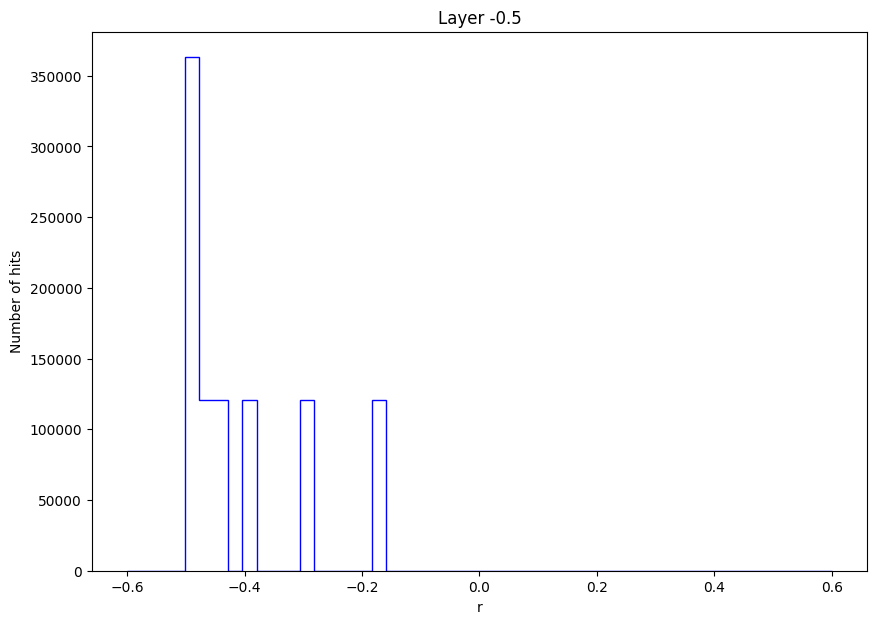

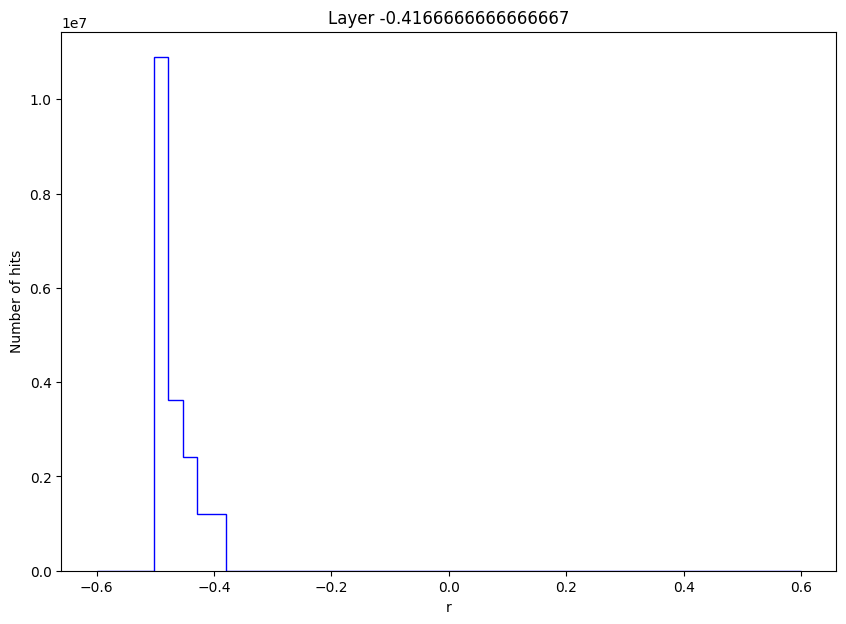

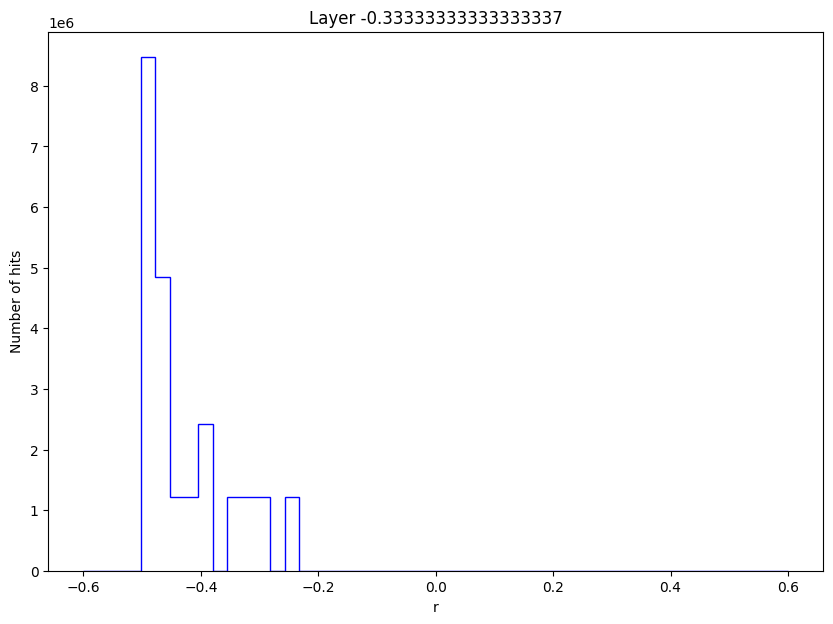

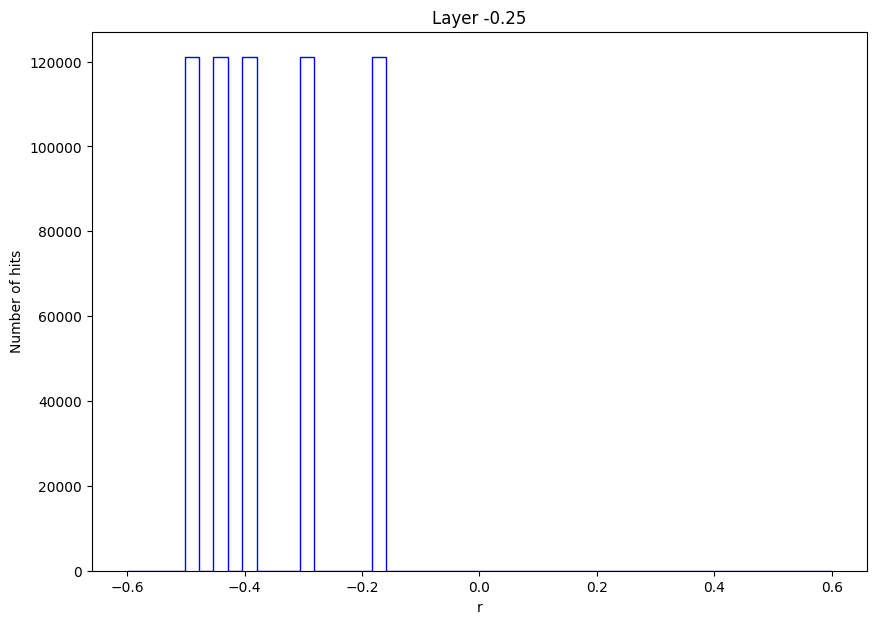

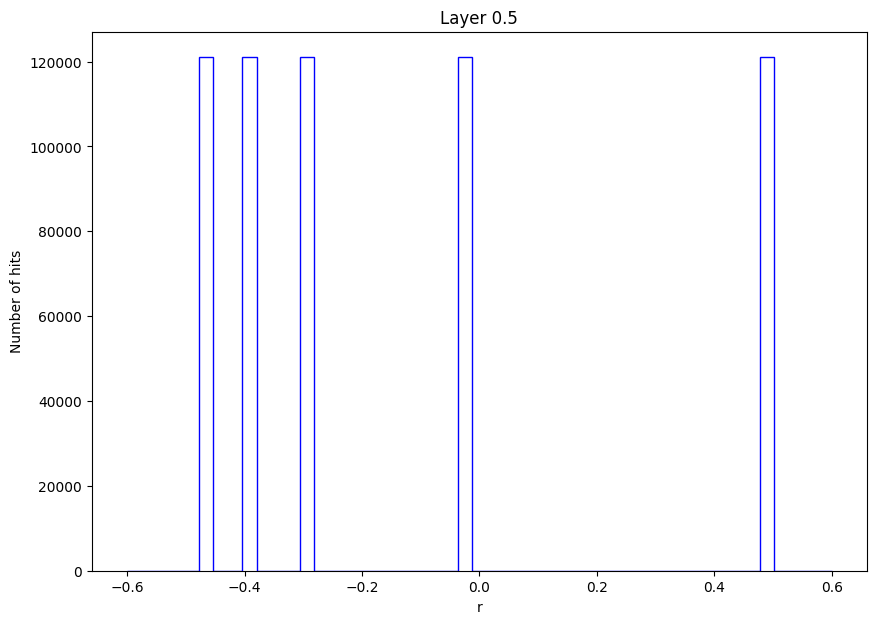

In [10]:
for layer in sorted(list(layers)):
    r_hist = data[data[:,0] == layer][:,2]
    _, ax = plt.subplots(figsize =(10, 7))
    ax.hist(r_hist, bins = np.linspace(-0.6,0.6), density=False, histtype='step', color = 'b')
    ax.set_xlabel('r')
    ax.set_ylabel('Number of hits')
    ax.set_title(r'Layer {}'.format(layer))
    plt.show()

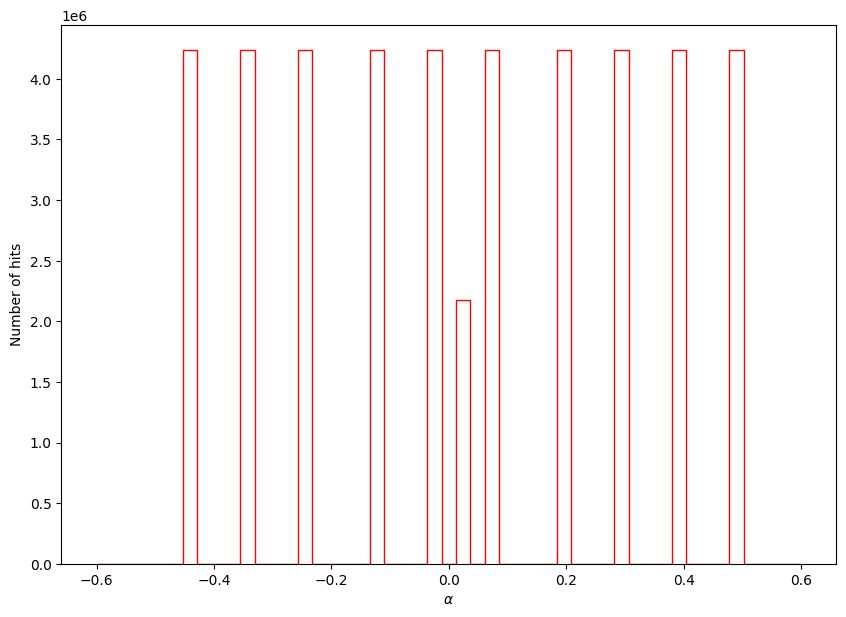

In [12]:
alpha_hist = data[:,1]
_, ax = plt.subplots(figsize =(10, 7))
ax.hist(alpha_hist, bins = np.linspace(-0.6,0.6), density=False, histtype='step', color = 'r')
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Number of hits')
plt.show()

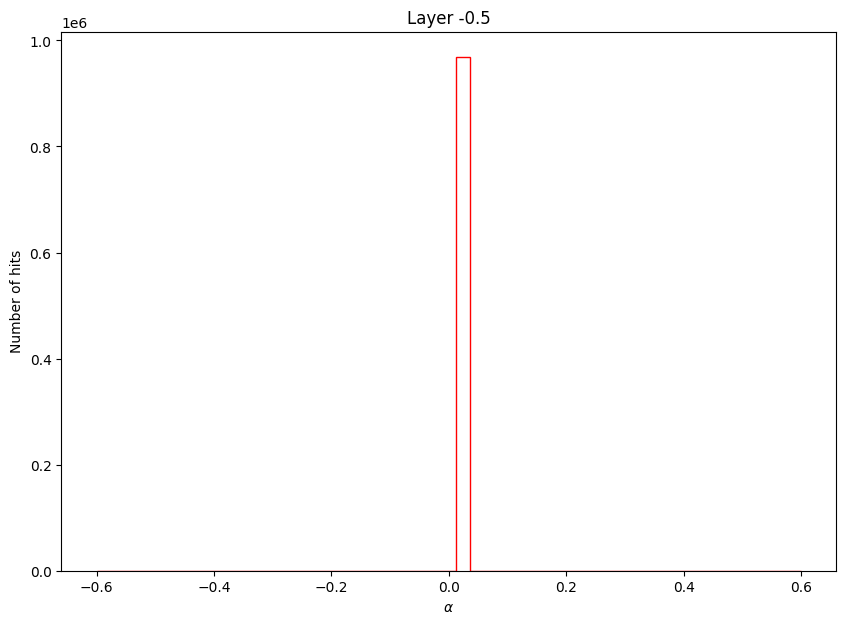

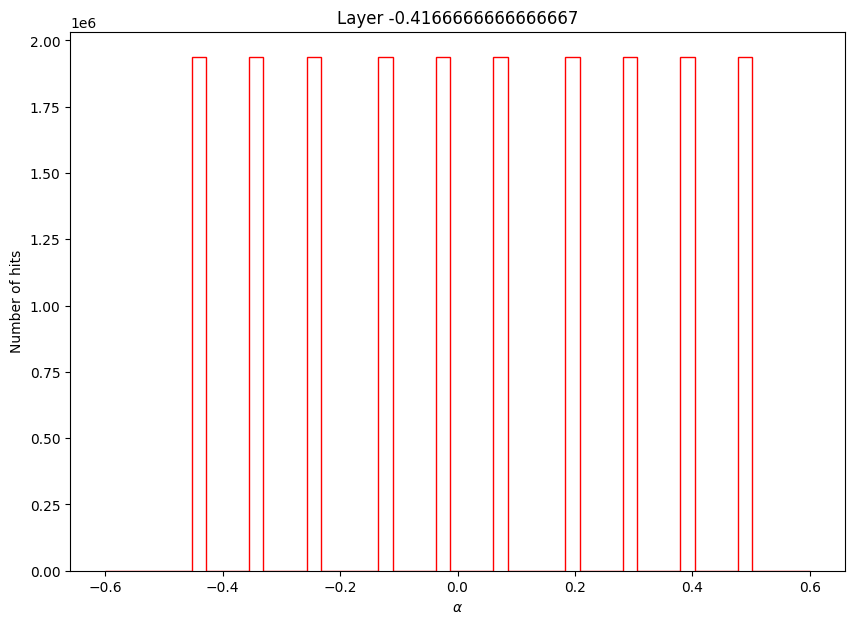

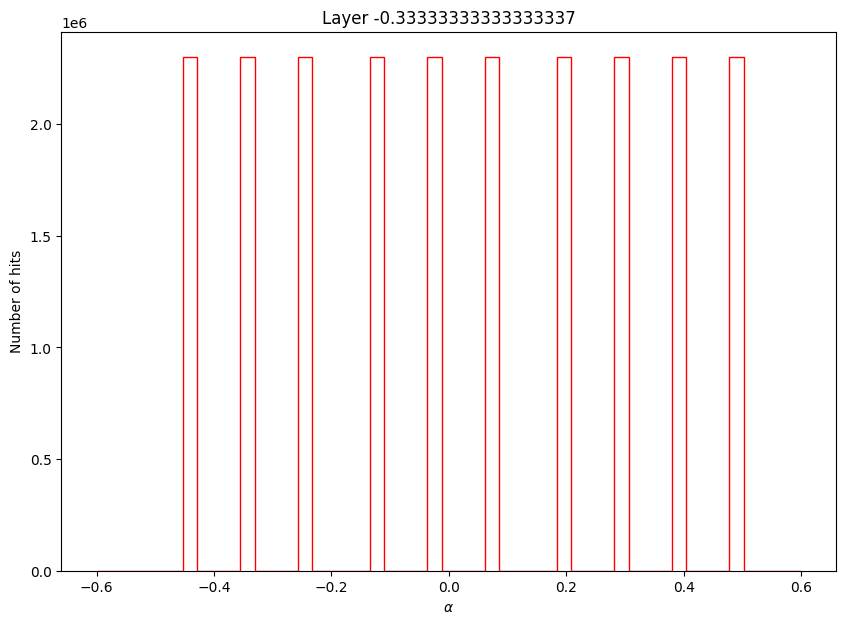

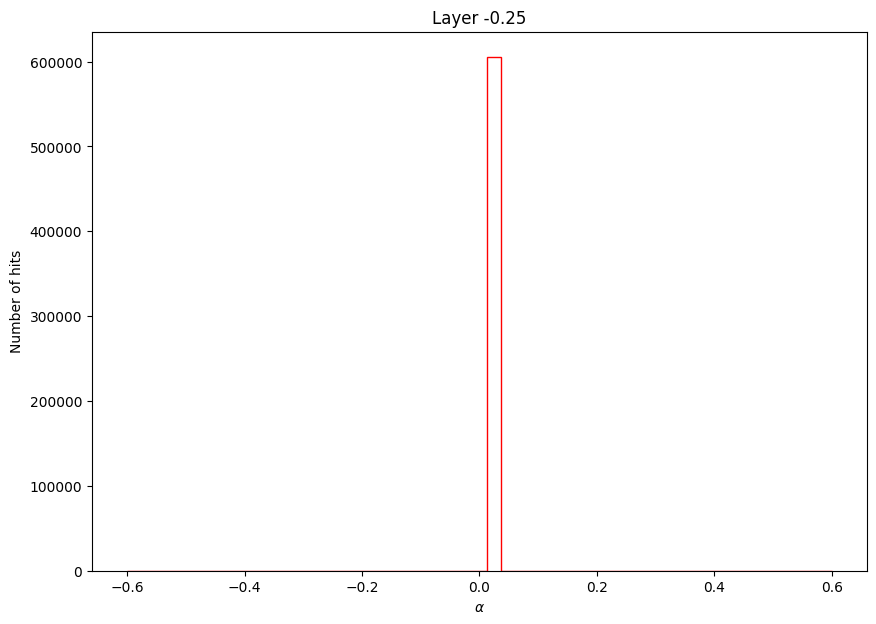

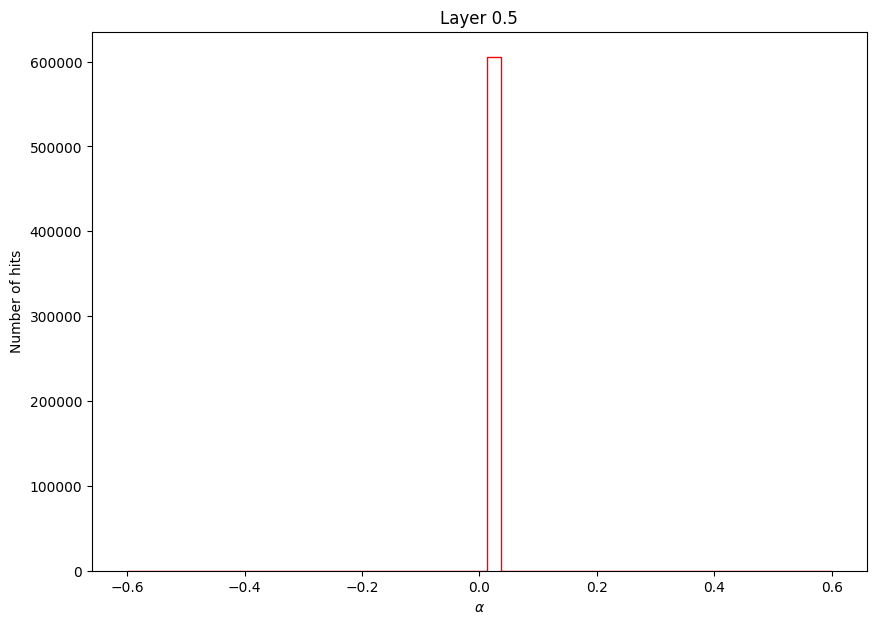

In [13]:
for layer in sorted(list(layers)):
    alpha_hist = data[data[:,0] == layer][:,1]
    _, ax = plt.subplots(figsize =(10, 7))
    ax.hist(alpha_hist, bins = np.linspace(-0.6,0.6), density=False, histtype='step', color = 'r')
    ax.set_xlabel(r'$\alpha$')
    ax.set_ylabel('Number of hits')
    ax.set_title(r'Layer {}'.format(layer))
    plt.show()

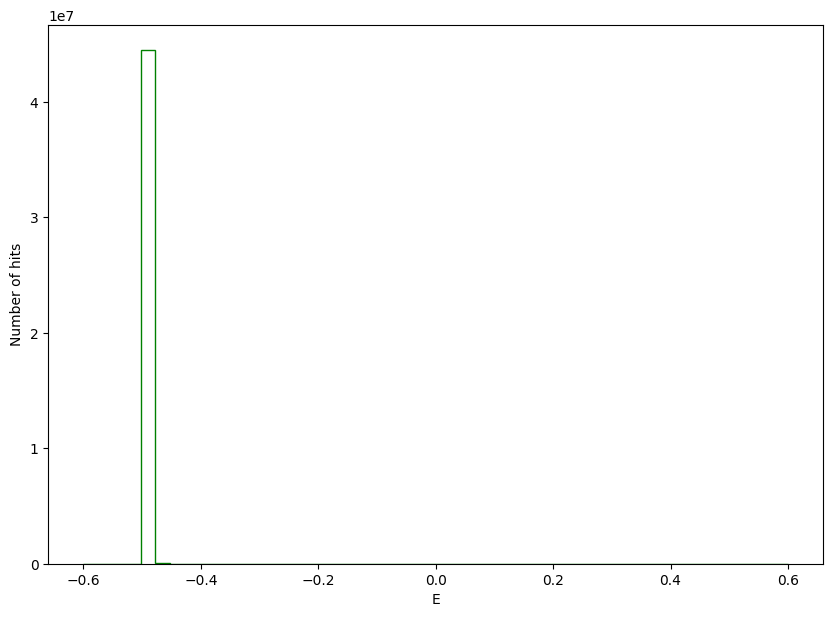

In [14]:
E_hist = data[:,3]
_, ax = plt.subplots(figsize =(10, 7))
ax.hist(E_hist, bins = np.linspace(-0.6,0.6), density=False, histtype='step', color = 'g')
ax.set_xlabel('E')
ax.set_ylabel('Number of hits')
plt.show()

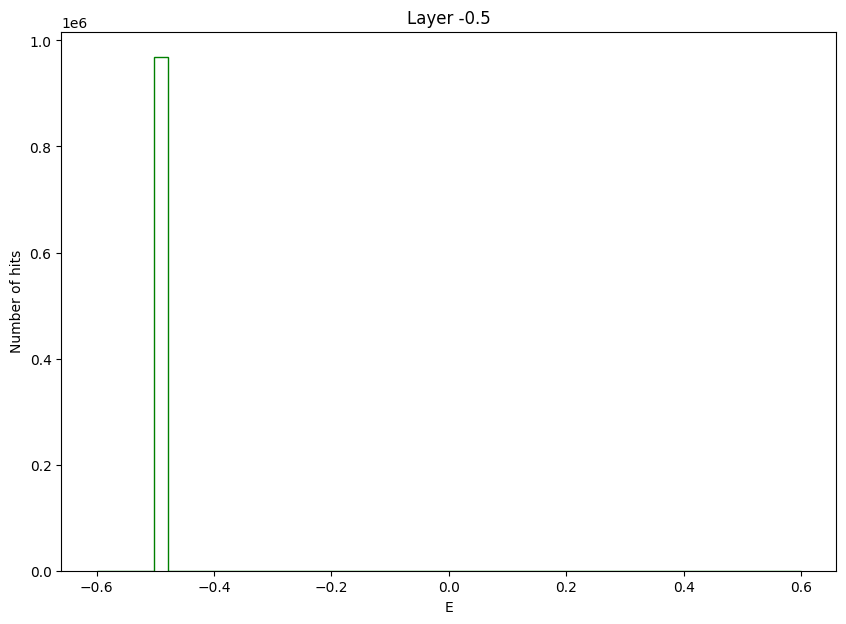

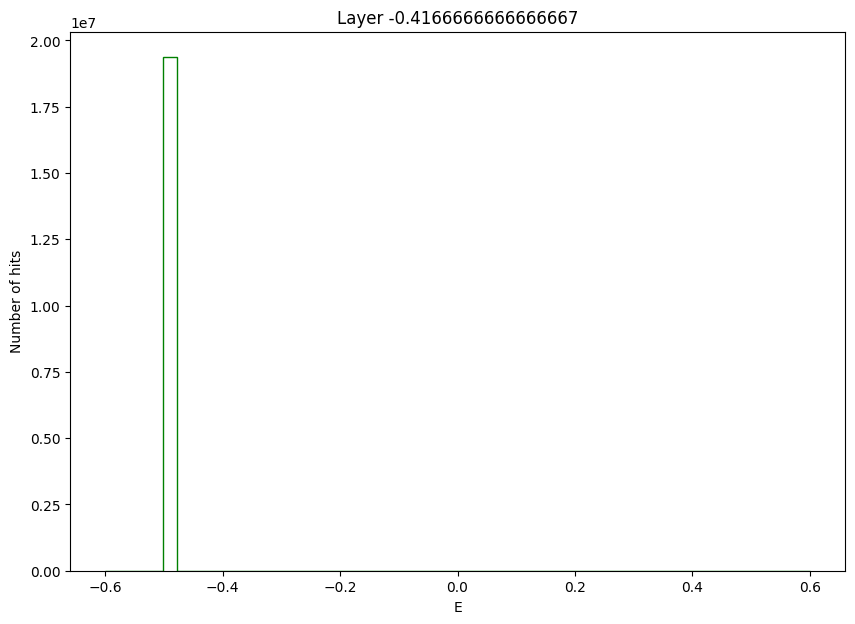

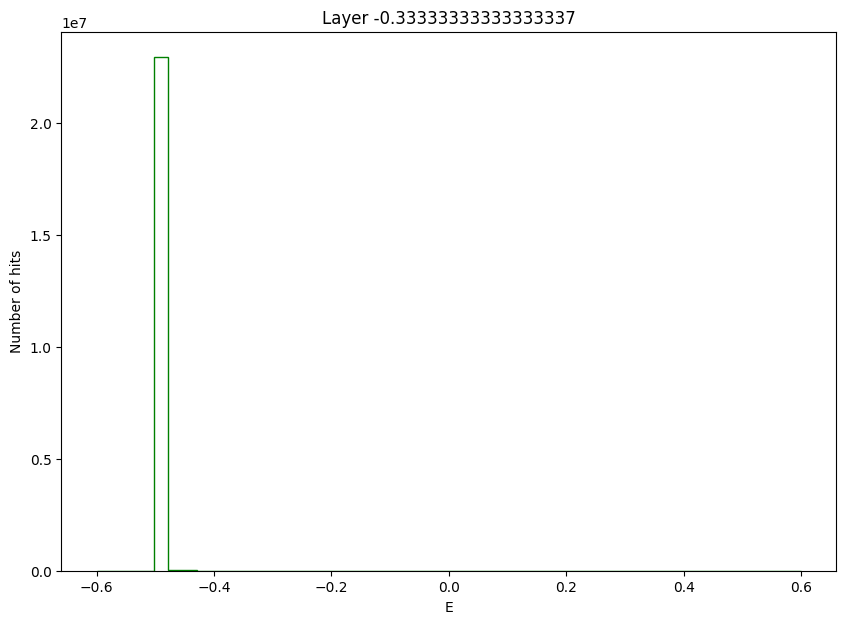

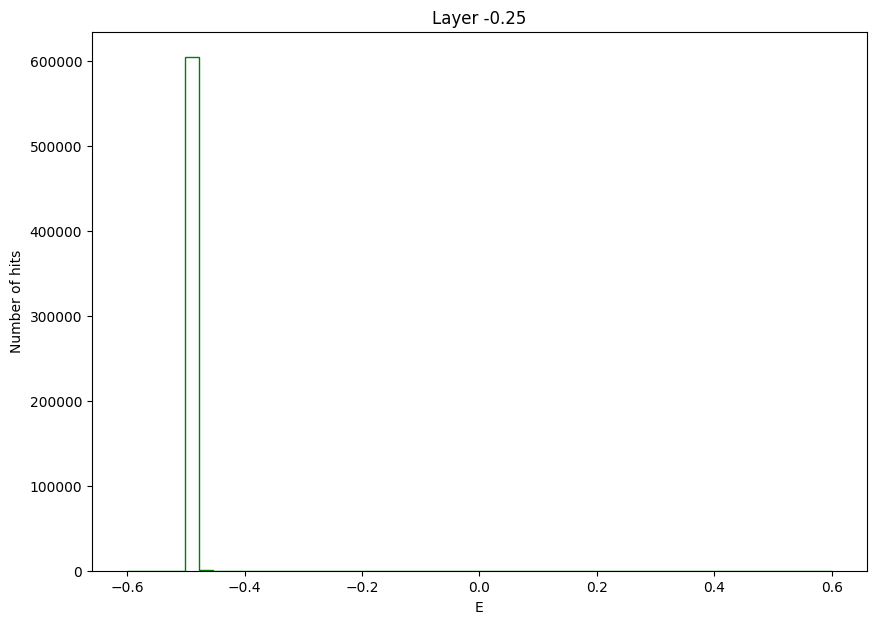

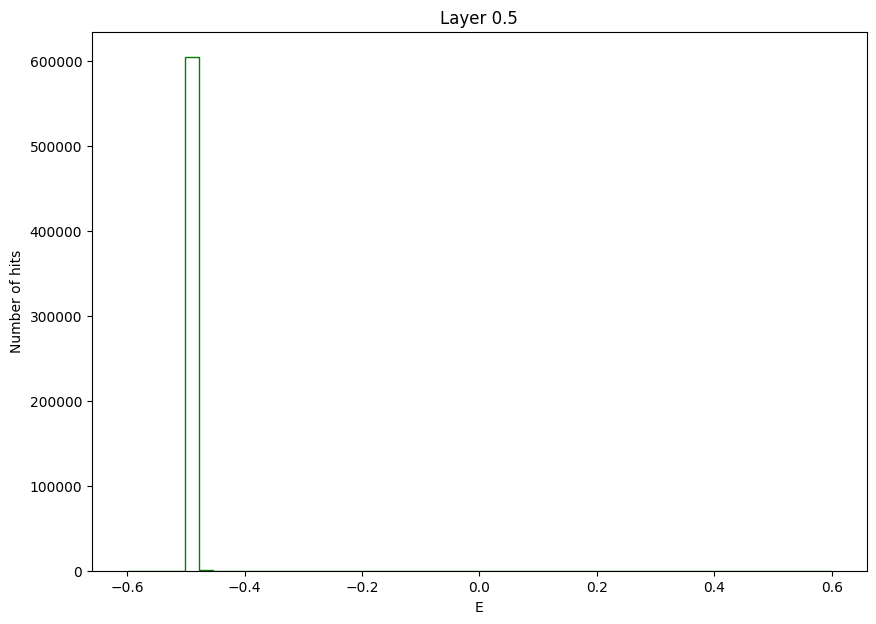

In [15]:
for layer in sorted(list(layers)):
    E_hist = data[data[:,0] == layer][:,3]
    _, ax = plt.subplots(figsize =(10, 7))
    ax.hist(E_hist, bins = np.linspace(-0.6,0.6), density=False, histtype='step', color = 'g')
    ax.set_xlabel('E')
    ax.set_ylabel('Number of hits')
    ax.set_title(r'Layer {}'.format(layer))
    plt.show()

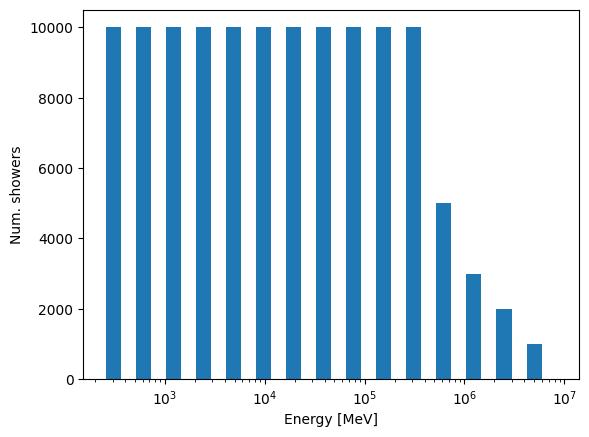

In [13]:
# incident energies are discrete, starting at 256 MeV and increasing in powers of 2. At high energies,
# there are fewer than 10k events per energy 
energies = photon_file['incident_energies'][:]

bins = np.logspace(8,23,31, base=2)
plt.hist(energies, bins=bins)
plt.xscale('log')
plt.xlabel('Energy [MeV]')
plt.ylabel('Num. showers')
plt.show()

In [25]:
np.amin(photon_file["showers"])

0.0

In [10]:
# High-level features are computed once for a given dataset by calling EvaluateFeatures(showers)
HLF_1_photons.CalculateFeatures(photon_file["showers"][:])
HLF_1_pions.CalculateFeatures(pion_file["showers"][:])

# and can then be given out like this:



print('First 10 list of voxels from the 1st event: ',photon_file["showers"][0,:10])

# total deposited energy in the shower
#print("Total energy of each photon shower: ", HLF_1_photons.GetEtot())
print("Average total energy of the pion showers: ", HLF_1_pions.GetEtot().mean())
print("Average total energy of the photon showers: ", HLF_1_photons.GetEtot().mean())

# ratio of deposited and incident energy
print("Average of deposited over incident energies: ", (HLF_1_photons.GetEtot()/photon_file['incident_energies'][:].squeeze()).mean())


# energy deposited in each layer of the geometry:
# (returns a dict with layer_number as key. Note that the ATLAS geometry has fewer relevant layer than are totally
# available, the 5th layer of the photons therefore has layer_number 12)
print("Energy deposited in each layer for each photon shower: ", HLF_1_photons.GetElayers())
print("Average energy deposited in the first layer for pion showers: ", HLF_1_pions.GetElayers()[0].mean())
print("Average energy deposited in the last layer for pion showers: ", HLF_1_pions.GetElayers()[14].mean())


# Center of energy in eta direction:
# (only available for layer with more than one alpha bin)
print("Center of energy in eta direction for each photon shower: ", HLF_1_photons.GetECEtas())
# and its width
print("Width of center of energy in eta direction for each photon shower: ", HLF_1_photons.GetWidthEtas())

# Center of energy in phi direction:
# (only available for layer with more than one alpha bin)
print("Center of energy in phi direction for each pion shower: ", HLF_1_pions.GetECPhis())
# and its width
print("Width of center of energy in phi direction for each pion shower: ", HLF_1_pions.GetWidthEtas())

First 10 list of voxels from the 1st event:  [300.014    44.5615    0.        3.67062   8.49932   9.0411   32.1163
   0.      293.051   114.436  ]
Average total energy of the pion showers:  114709.80996277733
Average total energy of the photom showers:  154970.80067222245
Average of deposited over incident energies:  0.9681129672733977
Energy deposited in each layer for each photon shower:  {0: array([397.90284 , 335.22051 , 458.715706, ...,   3.021411,  89.36487 ,
       564.82    ]), 1: array([ 6619.20246733, 29872.39803   , 27366.20037   , ...,
        4400.6388477 ,  1868.74613022, 27831.961346  ]), 2: array([  8844.038541 , 475911.127496 , 962300.9974939, ...,
        28158.736021 ,   1975.1564298,  98172.9360433]), 3: array([7.74045400e+00, 4.86087436e+03, 1.38063322e+04, ...,
       1.53001779e+02, 1.89361000e+00, 3.36691600e+02]), 12: array([0.00000000e+00, 2.58902882e+03, 8.27427600e+03, ...,
       1.64927400e+00, 0.00000000e+00, 1.82195200e+02])}
Average energy deposited in 

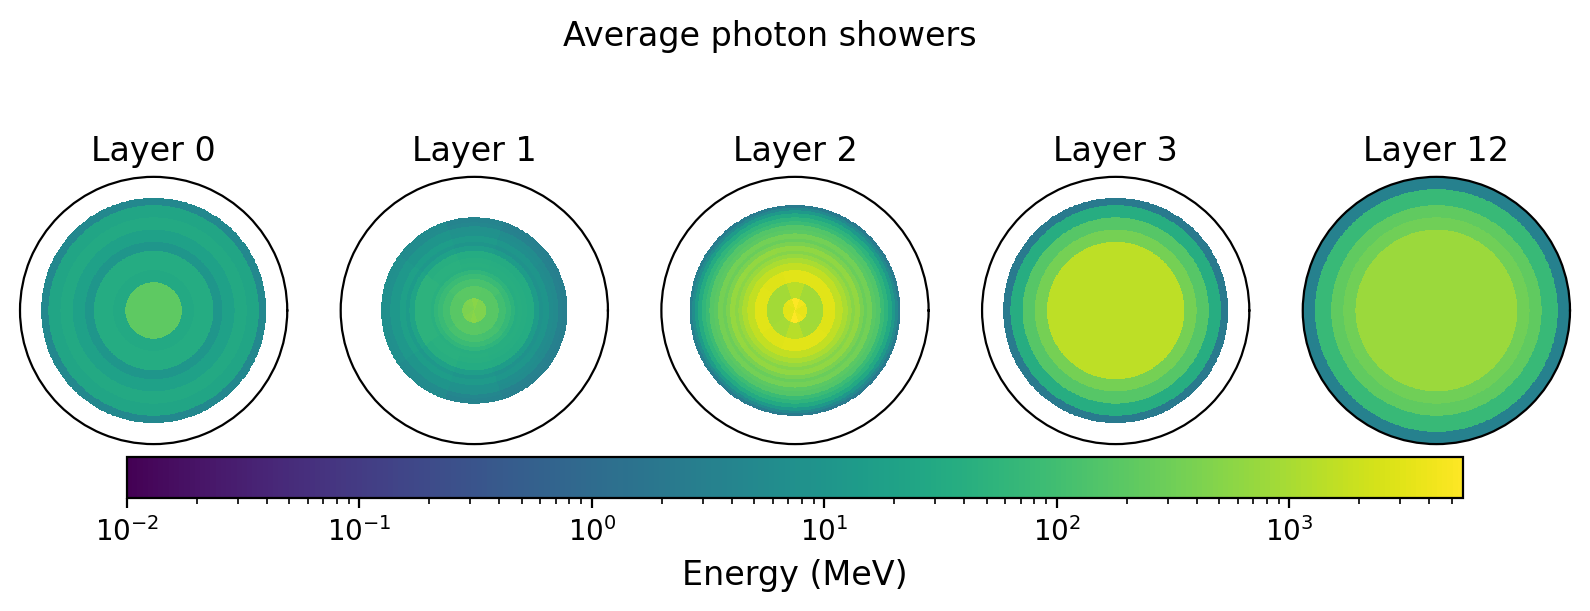

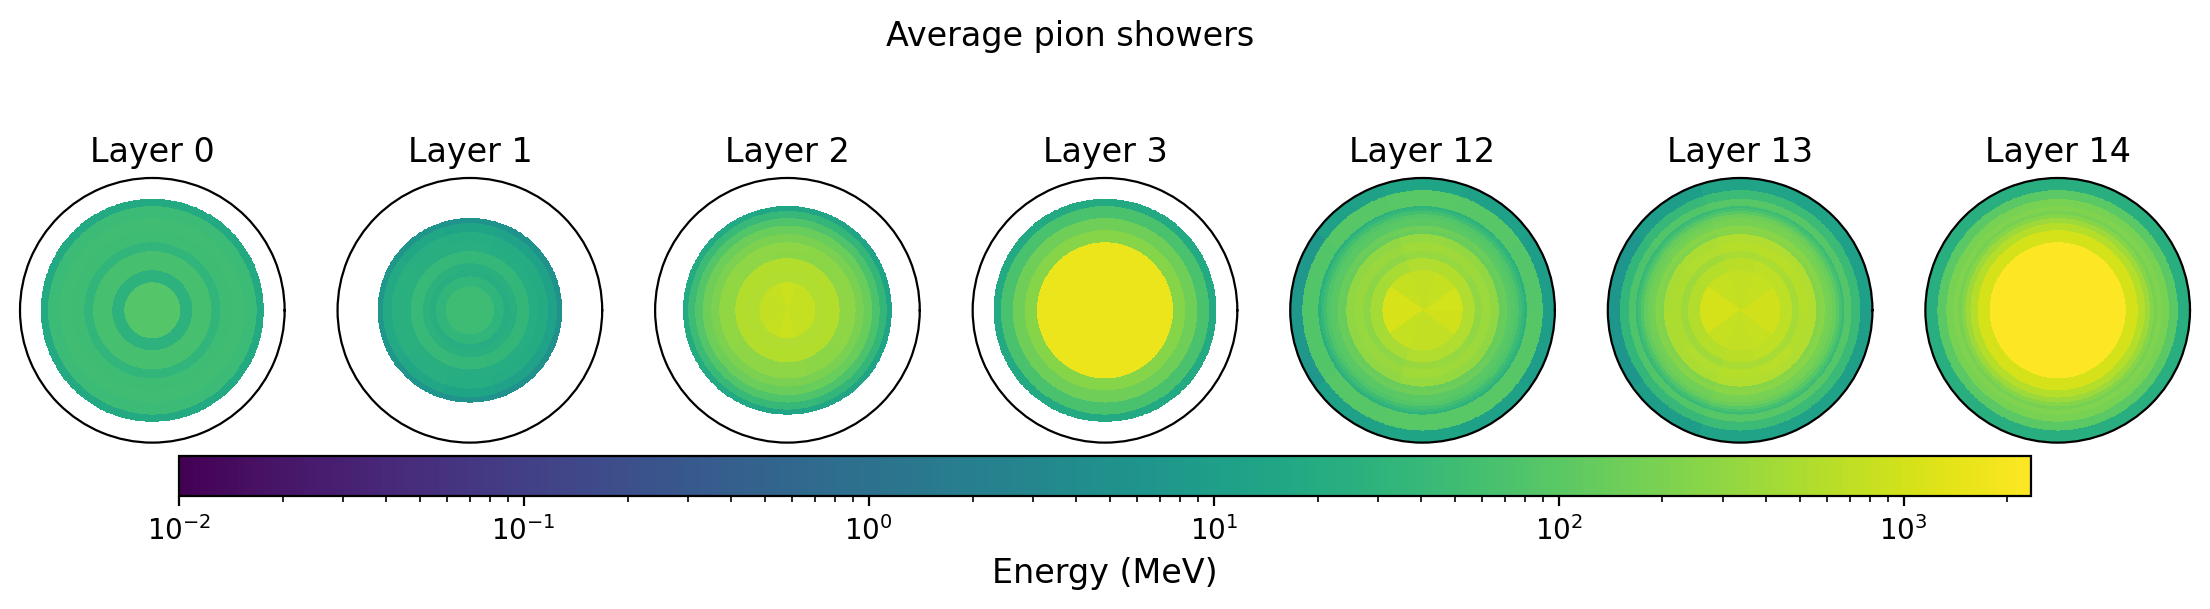

In [11]:
# looking at the average shower:
# not providing a filename or passing 'None' does not save the plot
# functions return instance of matplotlib.pyplot.figure
_ = HLF_1_photons.DrawAverageShower(photon_file['showers'][:], filename=None, title="Average photon showers")
_ = HLF_1_pions.DrawAverageShower(pion_file['showers'][:], title="Average pion showers")

Voxel dim:  368


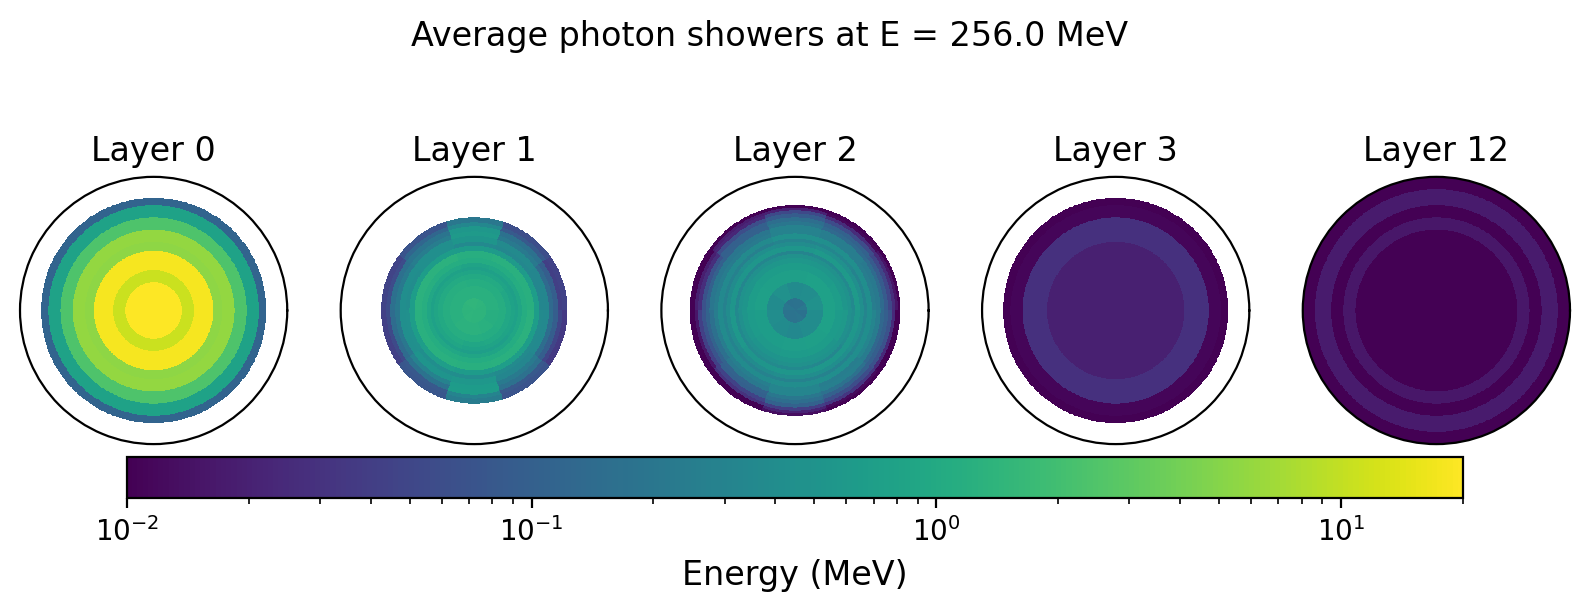

Voxel dim:  368


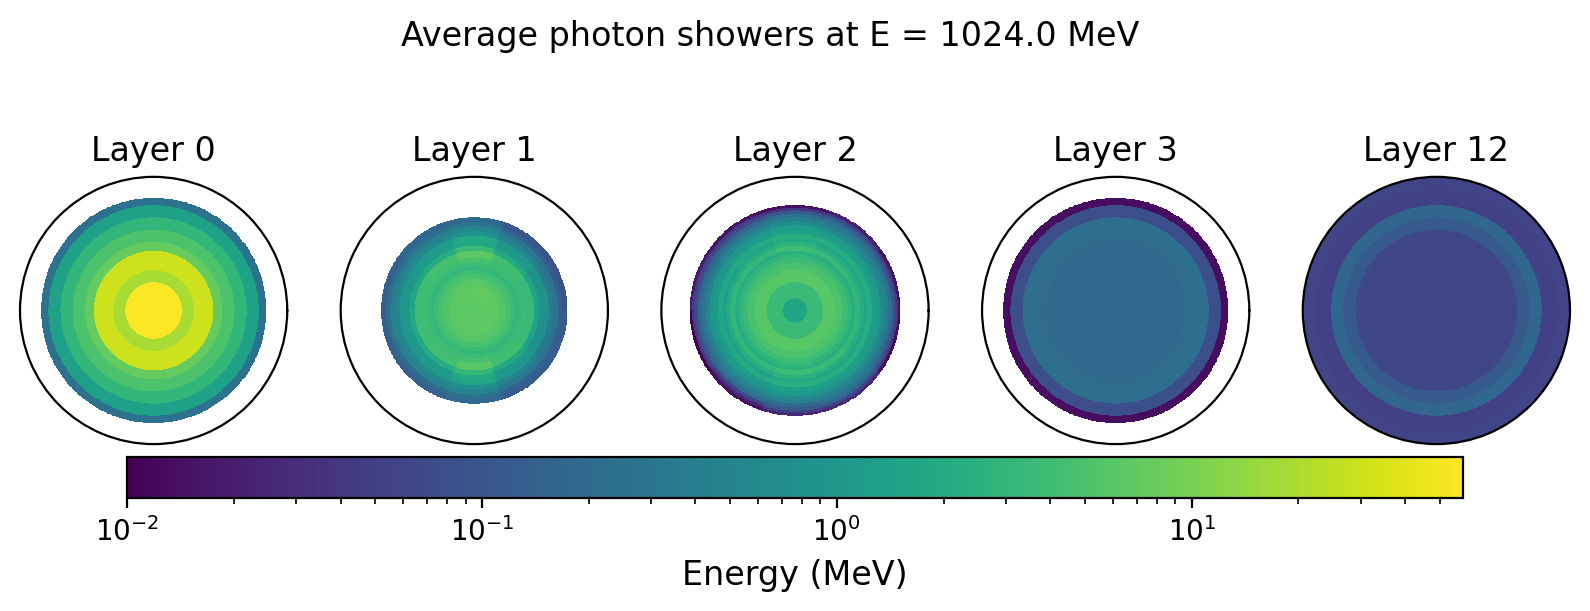

Voxel dim:  368


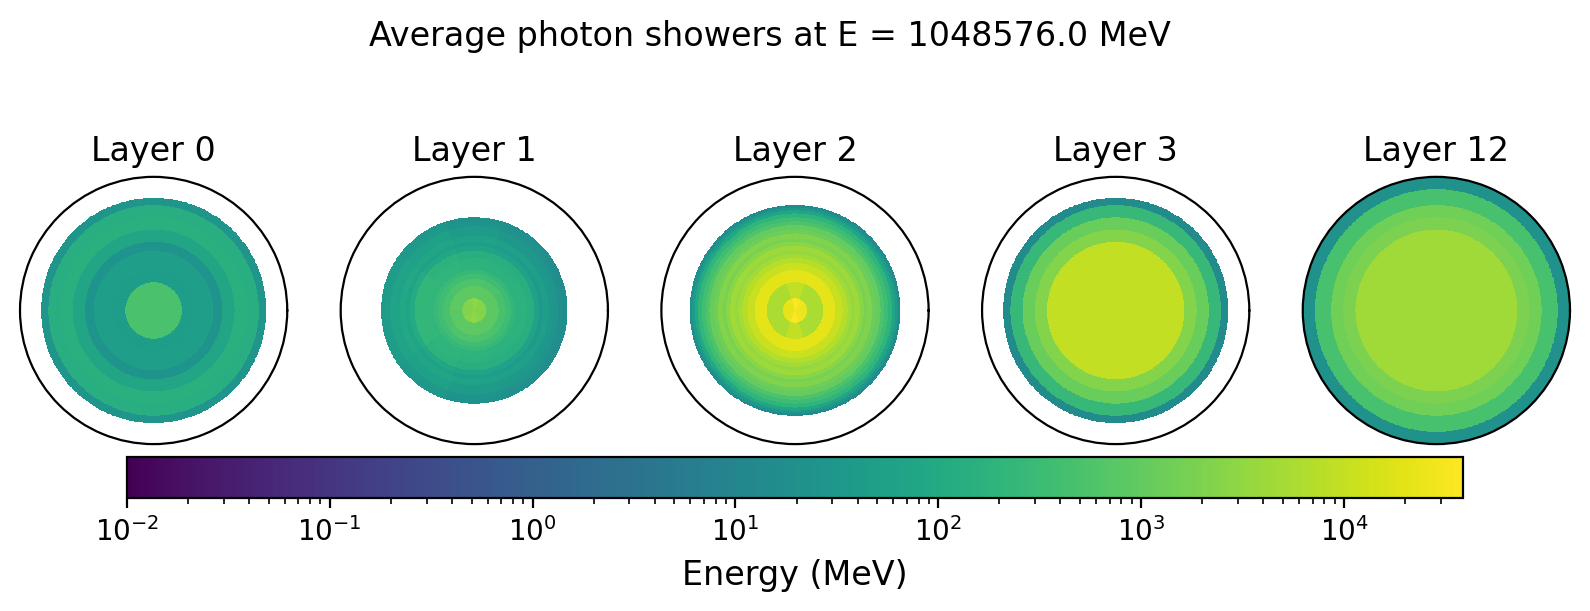

In [13]:
# averages at fixed energies:

for energy in [256., 1024., 1048576.]:
    voxel_dim = photon_file['showers'].shape[1]
    print('Voxel dim: ', voxel_dim)
    # hdf5 indexing must match the shape of the dataset:
    energy_idx = np.tile(photon_file['incident_energies'][:]==energy, voxel_dim)
    # and then be reshaped:
    _ = HLF_1_photons.DrawAverageShower(photon_file['showers'][energy_idx].reshape(-1, voxel_dim), 
                                        filename=None, title="Average photon showers at E = {} MeV".format(energy))

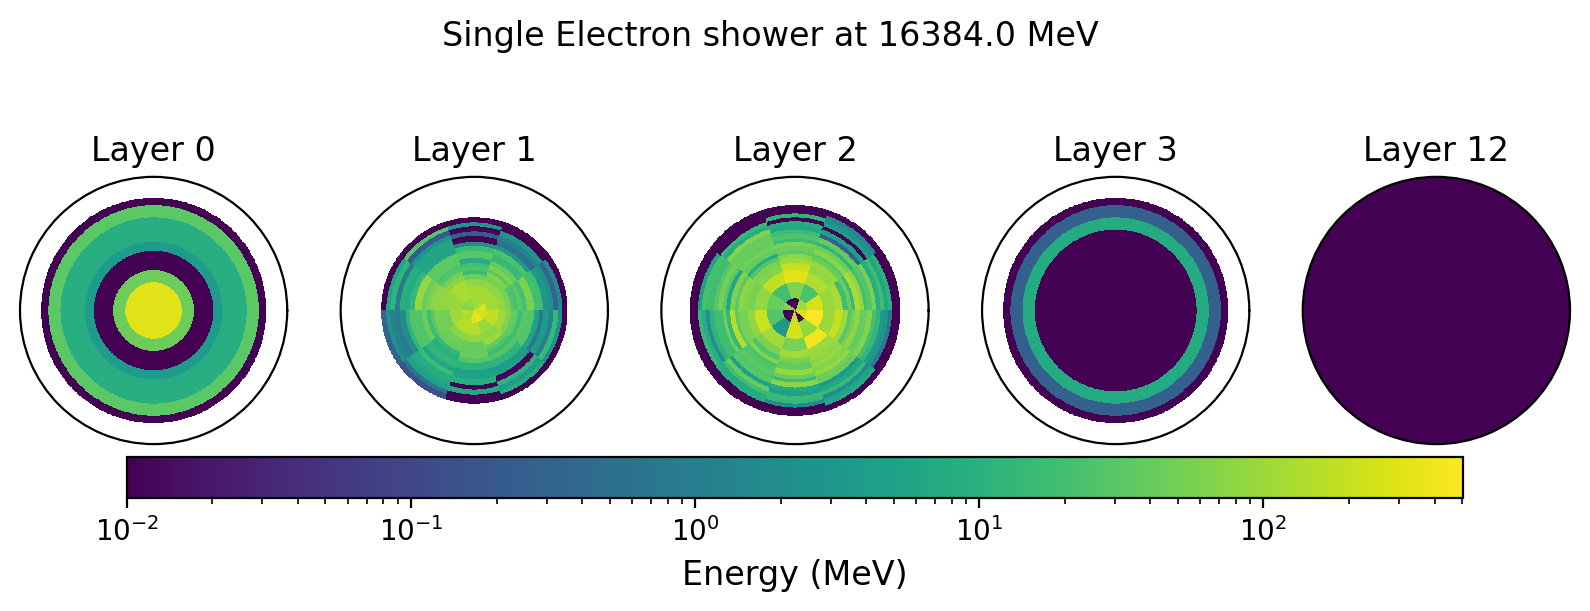

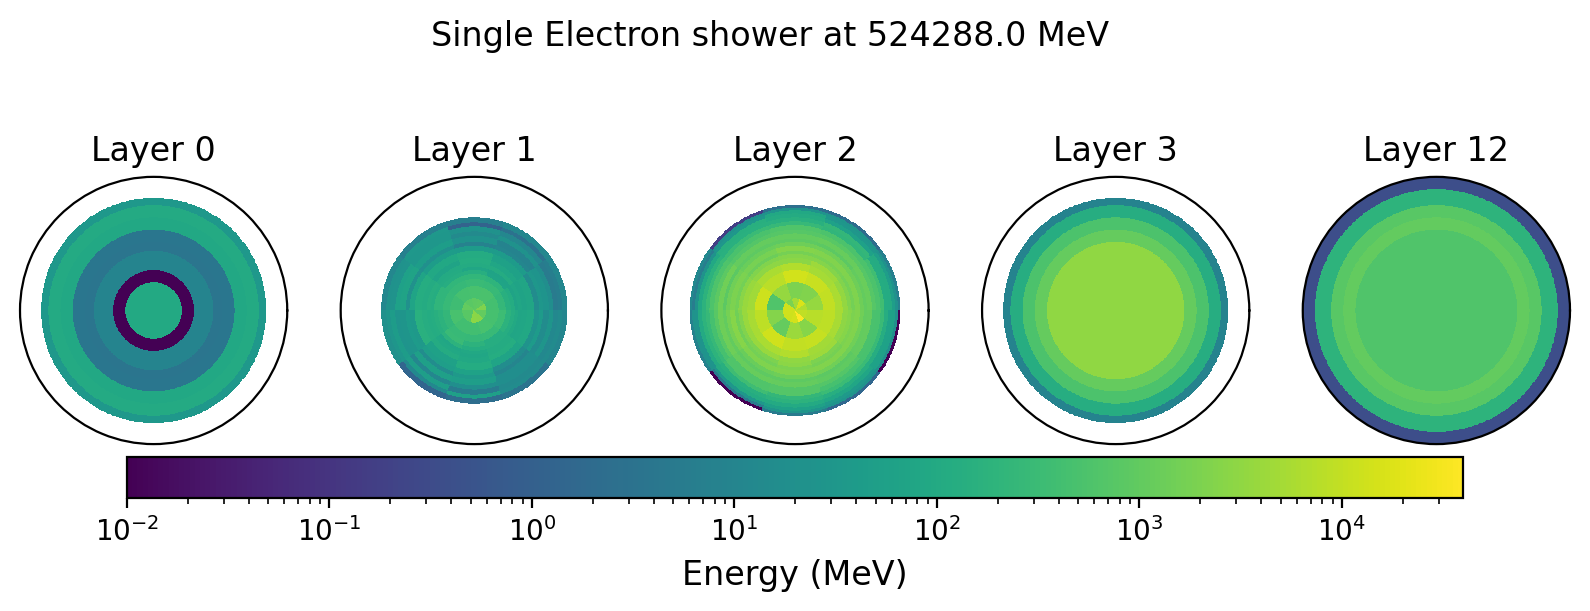

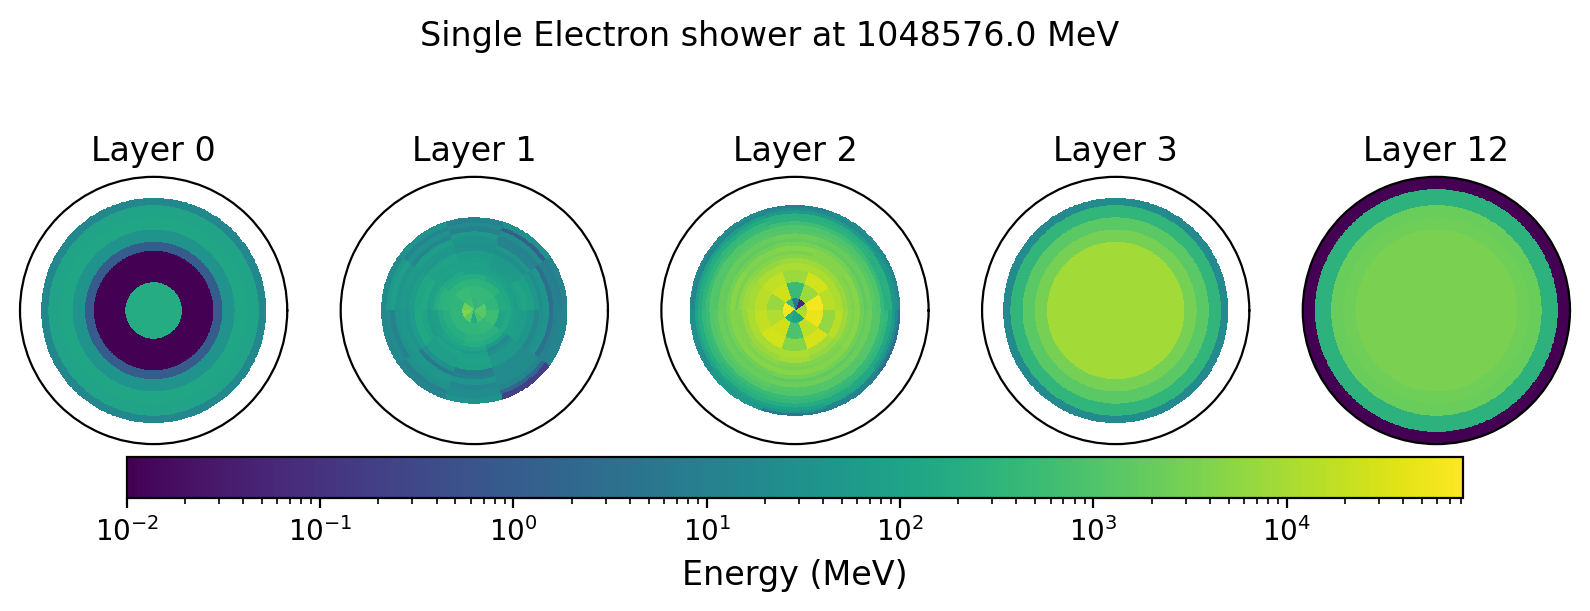

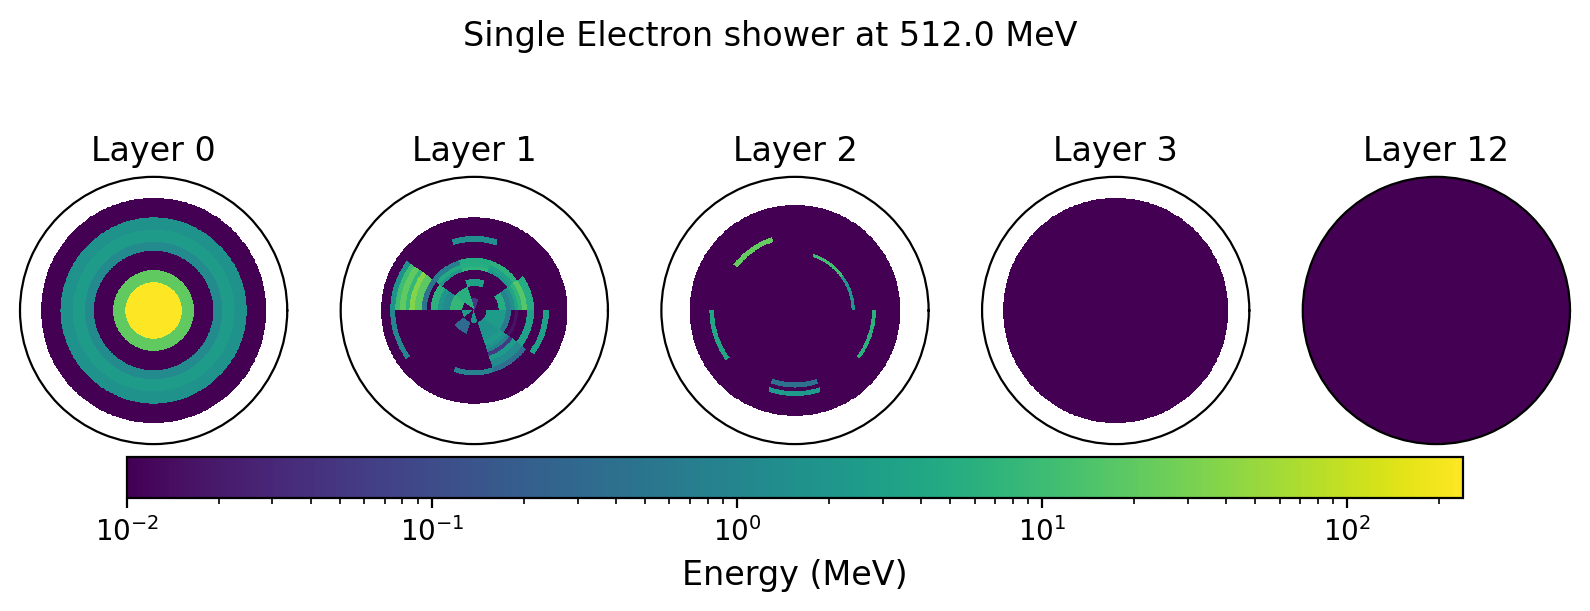

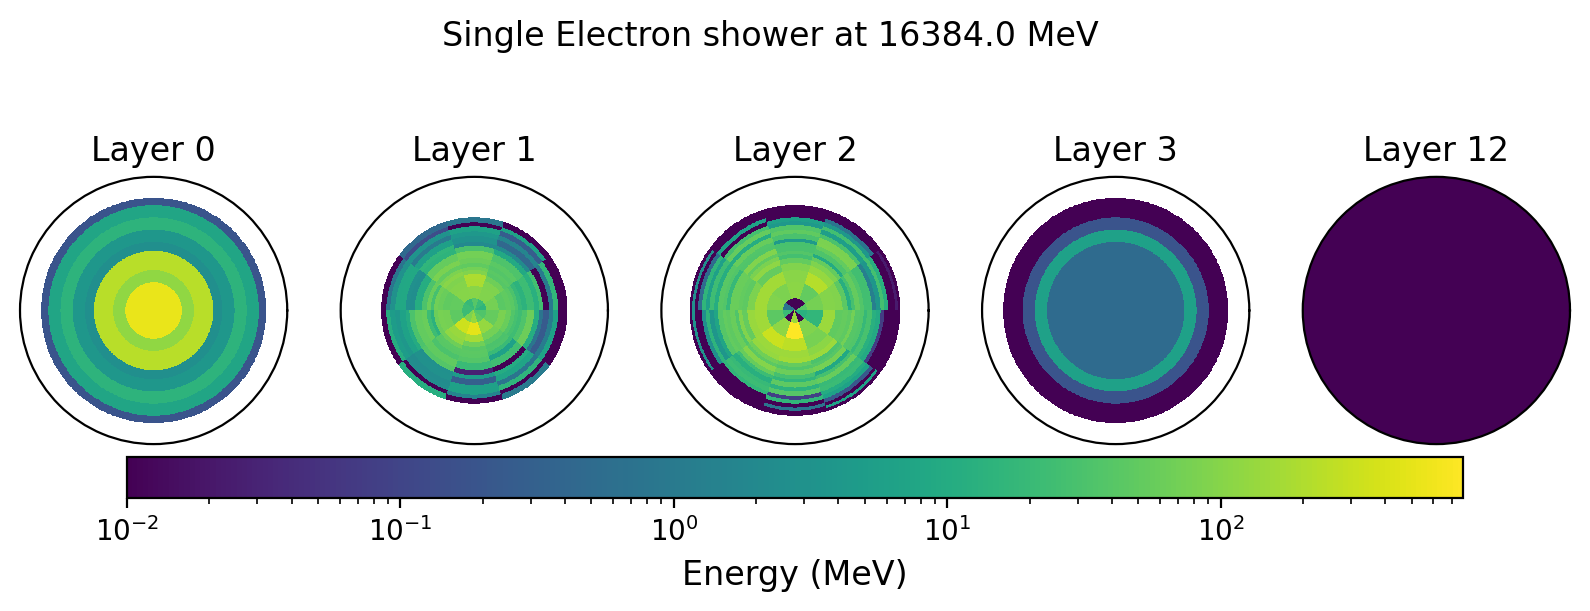

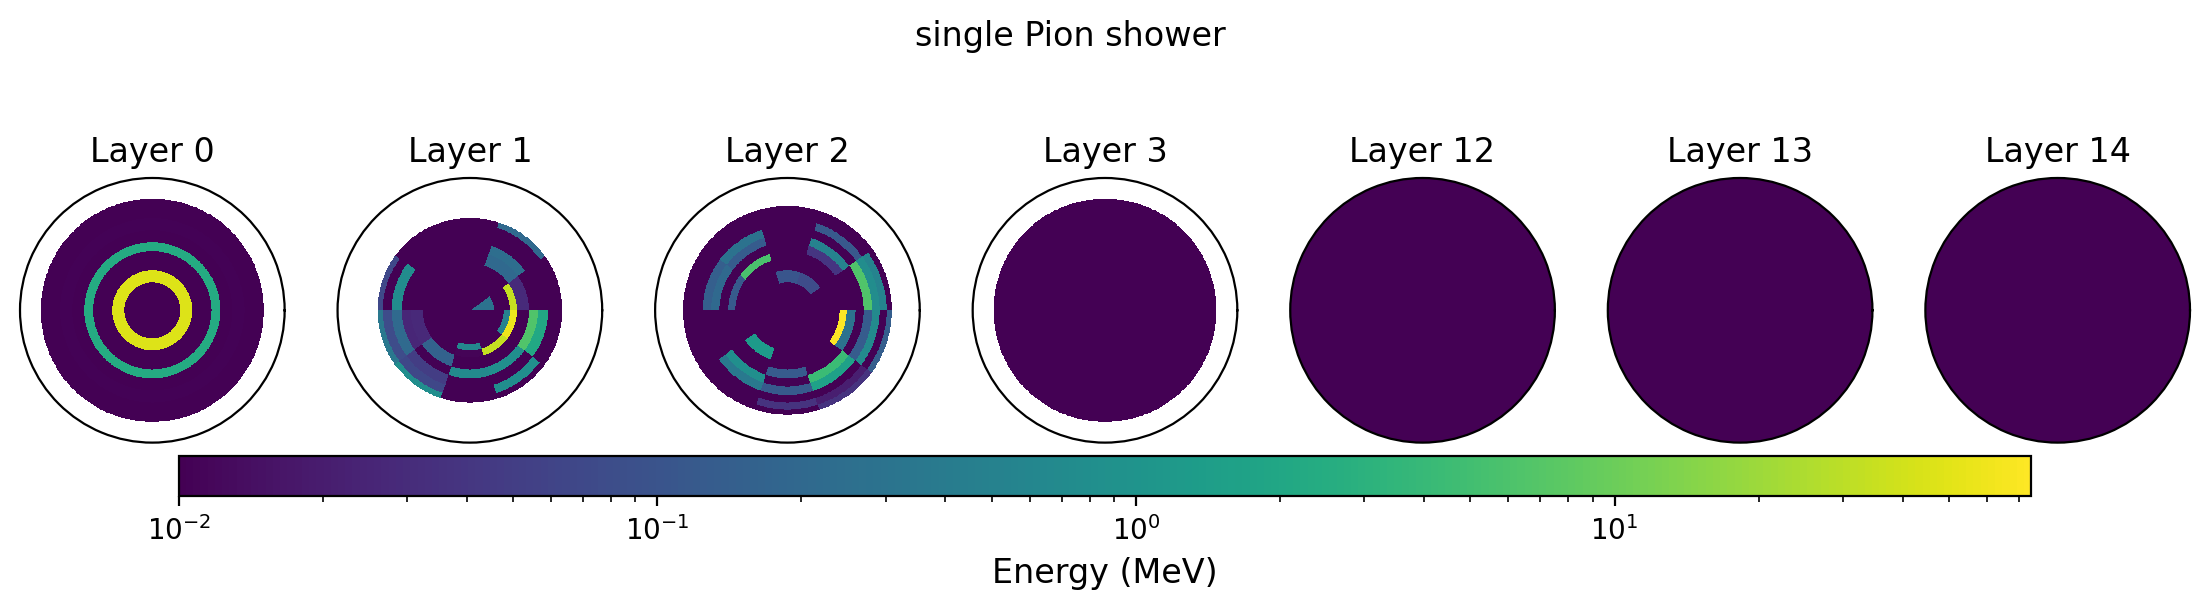

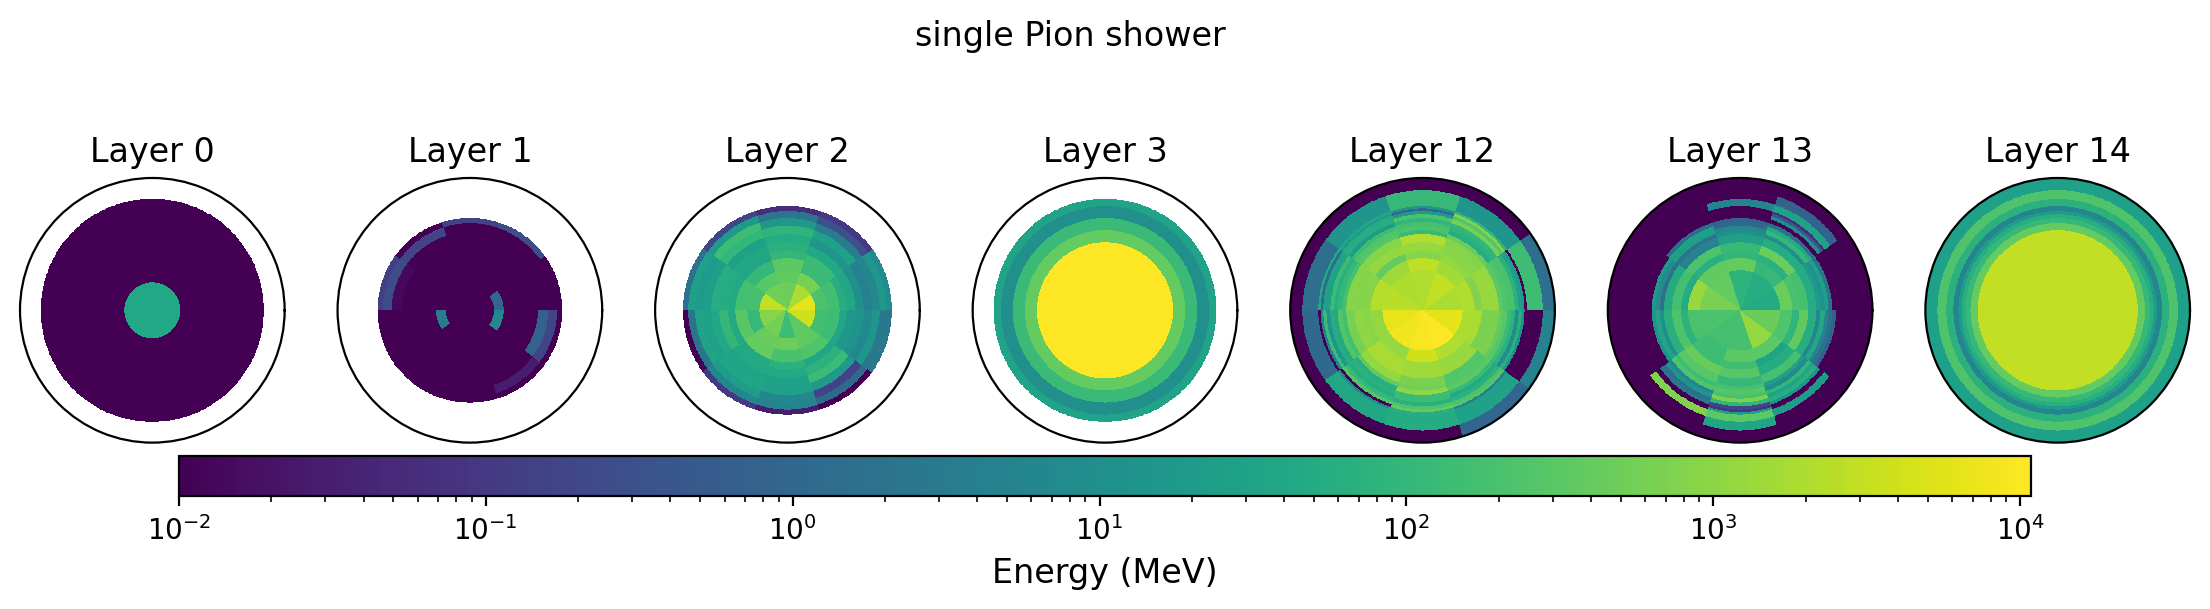

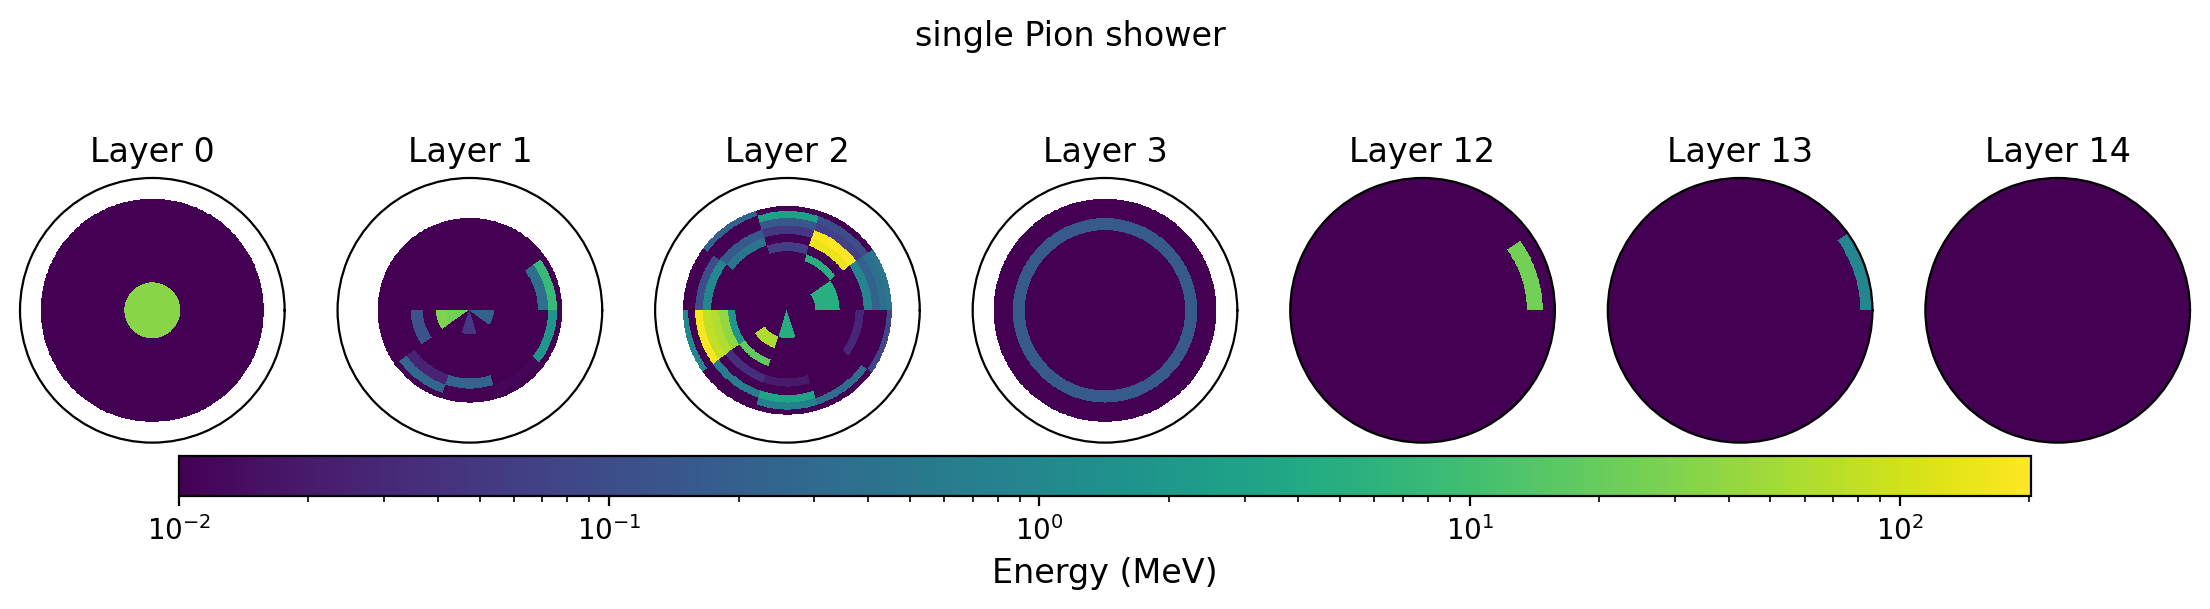

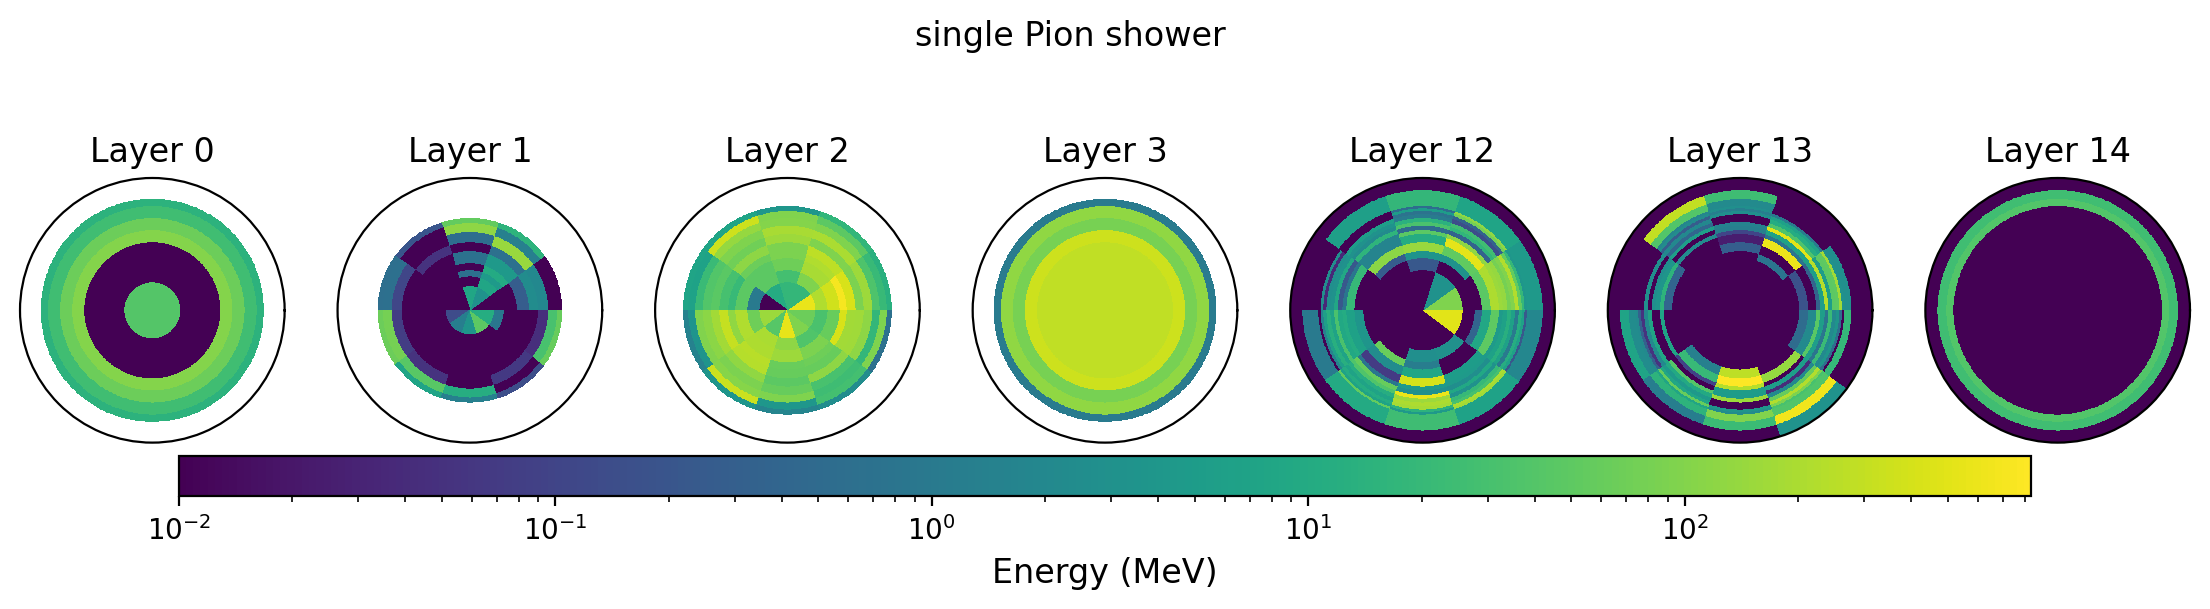

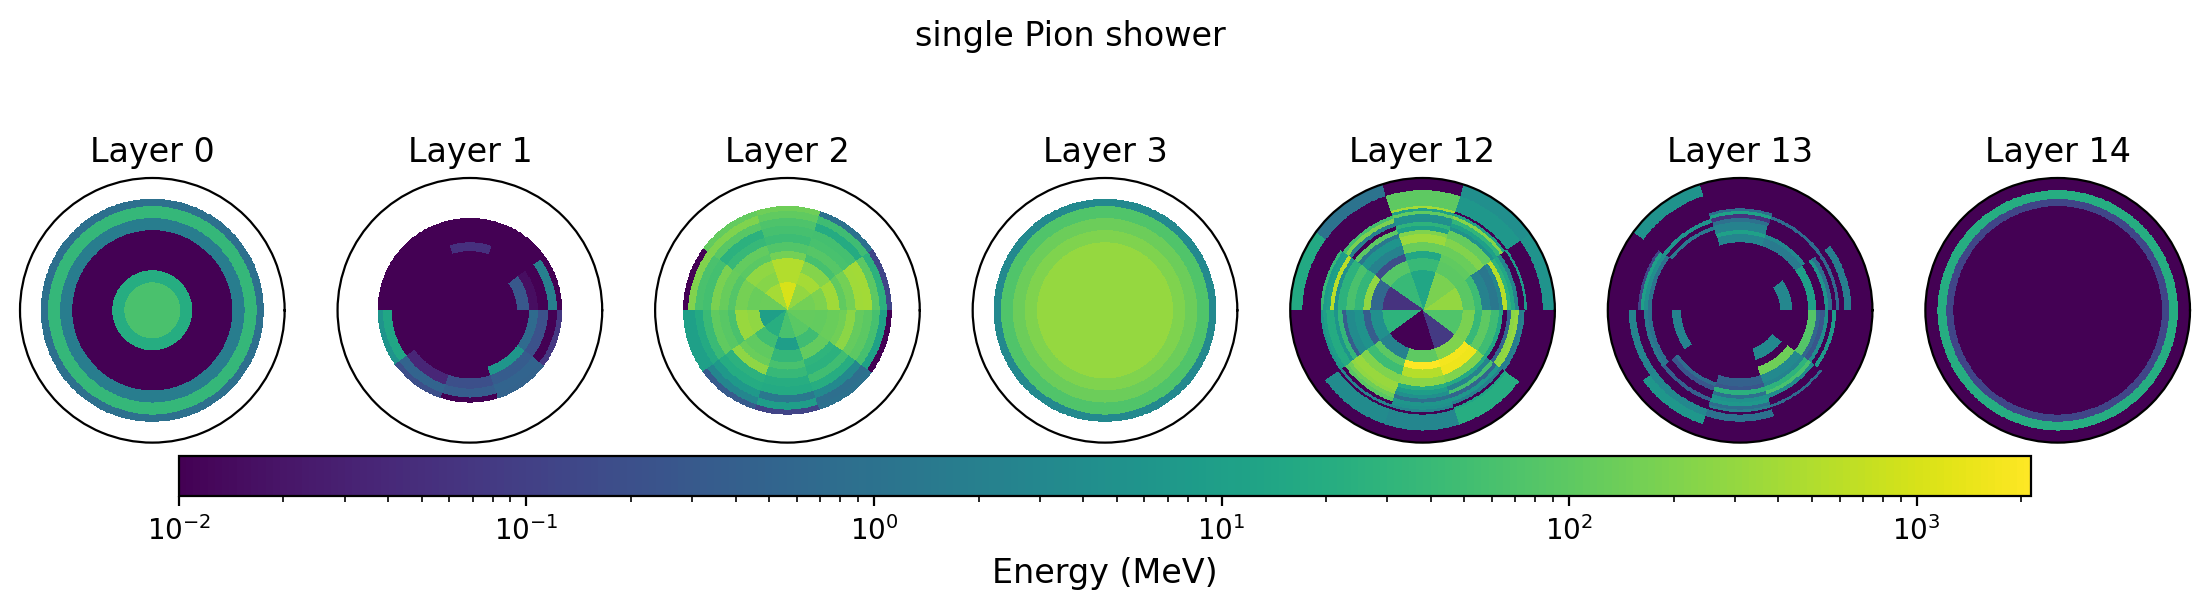

In [18]:
# looking at the first 5 showers:
# not providing a filename or passing 'None' does not save the plot
# functions return instance of matplotlib.pyplot.figure
# DrawSingleShower supports passing of multiple showers, but the will all get the same title
# passing a single shower allows individual titles
for i in range(5):
    _ = HLF_1_photons.DrawSingleShower(photon_file['showers'][i], filename=None, 
                                title="Single Electron shower at {:.1f} MeV".format(photon_file['incident_energies'][i][0]))

_ = HLF_1_pions.DrawSingleShower(pion_file['showers'][:5],
                                title="single Pion shower")

In [6]:
x = np.array([[[1,2,3],[4,5,6]]])
print(x.shape)
x[:,:,1]

(1, 2, 3)


array([[2, 5]])